## Customer Profiling Case Study

### Business Context and Objectives:
This project aims to develop a robust customer segmentation strategy for a marketing campaign. By analyzing customer behavior, demographics, and purchasing patterns, we seek to identify distinct customer groups. The primary objective is to enable more targeted and effective marketing efforts, ultimately improving customer engagement, conversion rates, and overall business profitability.

### Project Flow:
1.  **Pre-processing**: Data cleaning, handling missing values, outlier detection, and calculated financial features, encoding, and scaling.
2.  **PCA (Principal Component Analysis)**: Dimensionality reduction to simplify the dataset while retaining essential information.
3.  **VIF/Logit/SHAP**: Feature engineering and selection using Variance Inflation Factor (VIF) for multicollinearity, Logistic Regression (Logit) for variable significance, and SHAP (SHapley Additive exPlanations) for model interpretability.
4.  **KMeans**: Customer segmentation using the K-Means clustering algorithm to group similar customers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/Customer_Profiling.csv')
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0    4/9/2012       58       635  ...                  7             0   
1    8/3/2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3   10/2/2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

### Interpreting `df.head()` Output

The `df.head()` output provides a glimpse into the initial structure and content of the dataset. Here are some key observations:

*   **Rows and Columns**: The output shows the first 5 rows and 29 columns, indicating a moderately sized dataset with a wide array of features.
*   **`ID` Column**: This appears to be a unique identifier for each customer. It's often useful for tracking but may not be directly used in modeling, and might be considered for removal later.
*   **Demographic Information**: Columns like `Year_Birth`, `Education`, and `Marital_Status` provide demographic details about the customers.
*   **Financial Information**: `Income` is present, but some values are floats, indicating numerical data. Missing values might be present, which needs to be addressed.
*   **Household Information**: `Kidhome` and `Teenhome` suggest information about the number of children in different age groups.
*   **Customer Enrollment Date**: `Dt_Customer` records the date of customer enrollment, which could be useful for calculating tenure.
*   **Recency and Spending Habits**: `Recency` (days since last purchase) and various `Mnt` (amount spent) columns (`MntWines`, `MntFruits`, `MntMeatProducts`, etc.) provide insights into purchasing behavior.
*   **Purchase Channels**: `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`, and `NumWebVisitsMonth` indicate how customers interact with the company.
*   **Campaign Responses**: `AcceptedCmp1` through `AcceptedCmp5`, `Complain`, and `Response` (the target variable) track customer responses to marketing campaigns and complaints.
*   **Other Columns**: `Z_CostContact` and `Z_Revenue` seem to be constant columns (as hinted by the head output having identical values), which might be candidates for removal.

Overall, the dataset contains a rich mix of numerical and categorical features that can be used to understand customer behavior and predict campaign response.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [3]:
df.drop('ID', axis=1, inplace=True)

In [4]:
df.describe().T

count          mean           std     min       25%  \
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0

In [5]:
df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(182)

In [7]:
median_income = df['Income'].median()
df['Income'].fillna(median_income, inplace=True)
print(f"Missing values in 'Income' after filling: {df['Income'].isnull().sum()}")

Missing values in 'Income' after filling: 0


In [8]:
df.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [9]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce', infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2240 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          916 non-null    datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-nul

In [10]:
median_dt_customer = df['Dt_Customer'].median()
df['Dt_Customer'].fillna(median_dt_customer, inplace=True)
print(f"Missing values in 'Dt_Customer' after filling: {df['Dt_Customer'].isnull().sum()}")

Missing values in 'Dt_Customer' after filling: 0


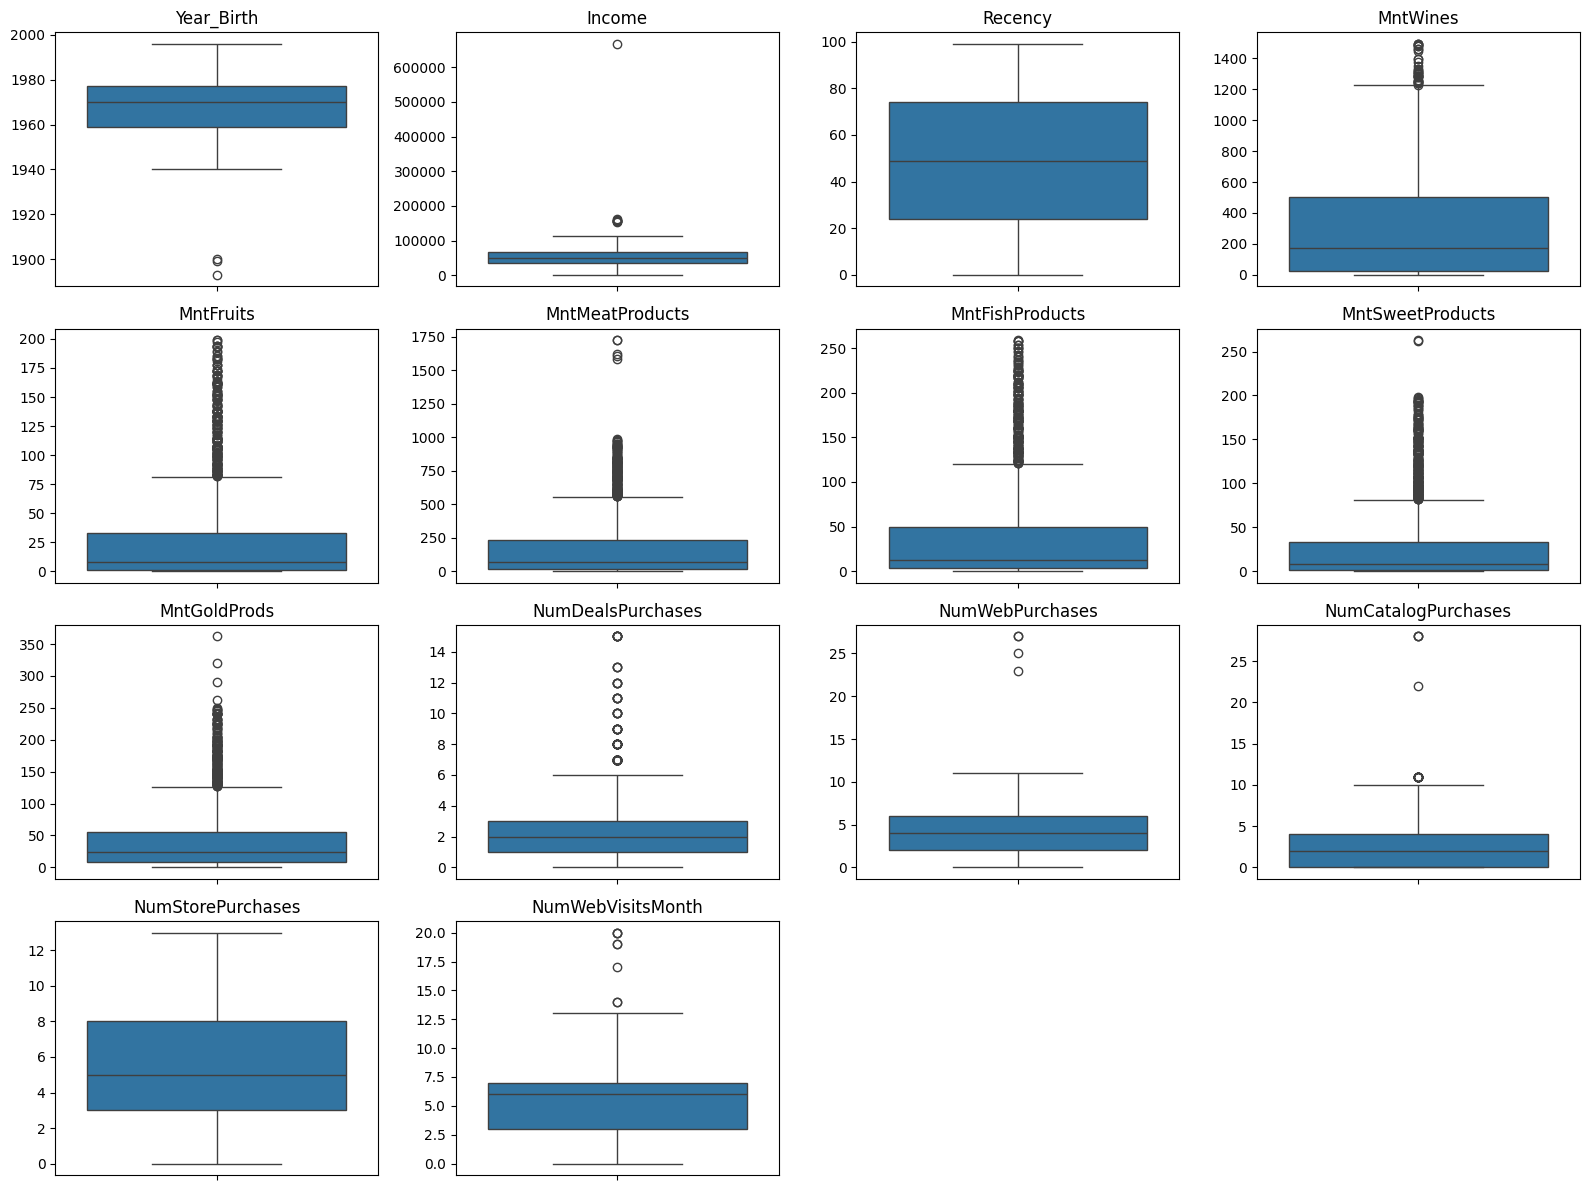

In [11]:
numerical_cols = [
    'Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth'
]

# Determine the number of rows and columns for the subplot grid
n_cols = 4
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols # Calculate rows needed

plt.figure(figsize=(n_cols * 4, n_rows * 3))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.ylabel('') # Remove y-axis label to avoid clutter

plt.tight_layout()
plt.show()

In [12]:
print('Extreme Outliers (above 99.5th percentile) for each numerical feature:')

for col in numerical_cols:
    percentile_99_5 = df[col].quantile(0.995)
    outliers = df[df[col] > percentile_99_5]

    if not outliers.empty:
        print(f"\n--- Outliers for '{col}' (above {percentile_99_5:.2f}) ---")
        display(outliers[[col]])
    else:
        print(f"\nNo extreme outliers found for '{col}' above the 99.5th percentile.")

Extreme Outliers (above 99.5th percentile) for each numerical feature:

--- Outliers for 'Year_Birth' (above 1993.00) ---


Year_Birth
46          1996
417         1994
696         1995
747         1995
914         1994
995         1995
1163        1994
1170        1996
1850        1995
2213        1995


--- Outliers for 'Income' (above 102122.95) ---


Income
164   157243.0
203   102160.0
252   102692.0
617   162397.0
646   105471.0
655   153924.0
687   160803.0
1300  157733.0
1653  157146.0
1898  113734.0
2132  156924.0
2233  666666.0


No extreme outliers found for 'Recency' above the 99.5th percentile.

--- Outliers for 'MntWines' (above 1373.15) ---


MntWines
497       1396
523       1379
543       1478
559       1492
824       1492
917       1478
987       1394
1488      1449
1641      1459
1749      1493
1961      1462
2098      1486


--- Outliers for 'MntFruits' (above 184.80) ---


MntFruits
109         194
198         189
447         190
855         199
1280        185
1480        199
1508        197
1526        194
1612        185
1921        193
1946        193
2217        194


--- Outliers for 'MntMeatProducts' (above 950.02) ---


MntMeatProducts
21               1725
126               951
164              1582
456               974
687              1622
1031              961
1358              984
1653             1725
1808              981
1958              951
2109              968
2228             1607


--- Outliers for 'MntFishProducts' (above 241.61) ---


MntFishProducts
214               254
766               247
914               250
926               250
1199              259
1413              242
1444              246
1601              253
1644              258
1699              258
1799              258
2096              250


--- Outliers for 'MntSweetProducts' (above 191.80) ---


MntSweetProducts
27                 263
456                194
470                192
634                198
1253               195
1484               194
1513               197
1671               196
1898               262
2012               194
2096               192
2168               192


--- Outliers for 'MntGoldProds' (above 241.00) ---


MntGoldProds
27             362
702            242
723            249
895            242
1328           262
1421           246
1806           291
1975           321
2093           245
2173           248
2235           247


--- Outliers for 'NumDealsPurchases' (above 12.00) ---


NumDealsPurchases
21                   15
164                  15
287                  13
432                  15
687                  15
1042                 15
1245                 15
1503                 13
1788                 13
1846                 15


--- Outliers for 'NumWebPurchases' (above 11.00) ---


NumWebPurchases
27                 27
1806               23
1898               27
1975               25


--- Outliers for 'NumCatalogPurchases' (above 11.00) ---


NumCatalogPurchases
21                     28
164                    22
687                    28
1653                   28


No extreme outliers found for 'NumStorePurchases' above the 99.5th percentile.

--- Outliers for 'NumWebVisitsMonth' (above 9.80) ---


NumWebVisitsMonth
9                    20
47                   10
605                  10
774                  20
981                  14
1042                 19
1245                 20
1328                 17
1524                 14
1846                 19
1868                 10
2214                 13

In [13]:
print(f"Original DataFrame shape: {df.shape}")

# Step 1: compute thresholds once
thresholds = {col: df[col].quantile(0.995) for col in numerical_cols}

# Step 2: build a single combined filter
condition = np.ones(len(df), dtype=bool)
for col in numerical_cols:
    condition &= df[col] <= thresholds[col]

# Step 3: apply filter once
df_filtered = df[condition]

# *** IMPORTANT: overwrite df with the filtered df ***
df = df_filtered

print(f"Final DataFrame shape after outlier removal: {df.shape}")


Original DataFrame shape: (2240, 28)
Final DataFrame shape after outlier removal: (2140, 28)


In [14]:
df['Enrollment_Year'] = 2025 - df['Dt_Customer'].dt.year
df.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

          Dt_Customer  Recency  MntWines  MntFruits  ...  AcceptedCmp3  \
0 2012-04-09 00:00:00       58       635         88  ...             0   
1 2014-08-03 00:00:00       38        11          1  ...             0   
2 2013-07-01 12:00:00       26       426         49  ...             0   
3 2014-10-02 00:00:00       26        11          4  ...             0   
4 2013-07-01 12:00:00       94       173         43  ...             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  Enrollment_Year  
0              3         11         1               13  
1              3         11         0               11  
2              3         11         0               12  
3              3         11         0               11  
4              3         11         0               12  

[5 rows x 29 columns]

In [15]:
latest_enrollment_date = df['Dt_Customer'].max()
df['Customer_Tenure'] = (latest_enrollment_date - df['Dt_Customer']).dt.days
df.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

          Dt_Customer  Recency  MntWines  MntFruits  ...  AcceptedCmp4  \
0 2012-04-09 00:00:00       58       635         88  ...             0   
1 2014-08-03 00:00:00       38        11          1  ...             0   
2 2013-07-01 12:00:00       26       426         49  ...             0   
3 2014-10-02 00:00:00       26        11          4  ...             0   
4 2013-07-01 12:00:00       94       173         43  ...             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   

   Z_Revenue  Response  Enrollment_Year  Customer_Tenure  
0         11         1               13              971  
1         11         0               11              125  
2         11         0               12              522  
3         11         0               11               65  
4         11         0               12              522  

[5 rows x 30 columns]

In [16]:
# Total_Expenditure = sum of all Mnt category spending
df['Total_Expenditure'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

          Dt_Customer  Recency  MntWines  MntFruits  ...  AcceptedCmp5  \
0 2012-04-09 00:00:00       58       635         88  ...             0   
1 2014-08-03 00:00:00       38        11          1  ...             0   
2 2013-07-01 12:00:00       26       426         49  ...             0   
3 2014-10-02 00:00:00       26        11          4  ...             0   
4 2013-07-01 12:00:00       94       173         43  ...             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0             0         0              3         11         1   
1             0             0         0              3         11         0   
2             0             0         0              3         11         0   
3             0             0         0              3         11         0   
4             0             0         0              3         11         0   

   Enrollment_Year  Customer_Tenure  Total_Expenditure  
0               13              971               1617  
1               11              125                 27  
2               12              522                776  
3               11               65                 53  
4               12              522                422  

[5 rows x 31 columns]

In [17]:
# Average_Monthly_Spend = Total_Expenditure / Customer_Tenure_in_Months
# Assuming an average of 30.44 days per month for Customer_Tenure_in_Months
df['Customer_Tenure_in_Months'] = df['Customer_Tenure'] / 30.44

# Handle potential division by zero for Average_Monthly_Spend
# If Customer_Tenure_in_Months is 0, set Average_Monthly_Spend to 0, otherwise calculate normally.
df['Average_Monthly_Spend'] = df.apply(lambda row: row['Total_Expenditure'] / row['Customer_Tenure_in_Months'] if row['Customer_Tenure_in_Months'] != 0 else 0, axis=1)
df.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

          Dt_Customer  Recency  MntWines  MntFruits  ...  AcceptedCmp2  \
0 2012-04-09 00:00:00       58       635         88  ...             0   
1 2014-08-03 00:00:00       38        11          1  ...             0   
2 2013-07-01 12:00:00       26       426         49  ...             0   
3 2014-10-02 00:00:00       26        11          4  ...             0   
4 2013-07-01 12:00:00       94       173         43  ...             0   

   Complain  Z_CostContact  Z_Revenue  Response  Enrollment_Year  \
0         0              3         11         1               13   
1         0              3         11         0               11   
2         0              3         11         0               12   
3         0              3         11         0               11   
4         0              3         11         0               12   

   Customer_Tenure  Total_Expenditure  Customer_Tenure_in_Months  \
0              971               1617                  31.898817   
1              125                 27                   4.106439   
2              522                776                  17.148489   
3               65                 53                   2.135348   
4              522                422                  17.148489   

   Average_Monthly_Spend  
0              50.691535  
1               6.575040  
2              45.251801  
3              24.820308  
4              24.608582  

[5 rows x 33 columns]

In [18]:
# Dependency_Ratio = (Kids + Teens) / Adults
# Assuming 'Adults' implicitly refers to the customer (1 adult)
df['Dependency_Ratio'] = (df['Kidhome'] + df['Teenhome']) / 1
df.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

          Dt_Customer  Recency  MntWines  MntFruits  ...  Complain  \
0 2012-04-09 00:00:00       58       635         88  ...         0   
1 2014-08-03 00:00:00       38        11          1  ...         0   
2 2013-07-01 12:00:00       26       426         49  ...         0   
3 2014-10-02 00:00:00       26        11          4  ...         0   
4 2013-07-01 12:00:00       94       173         43  ...         0   

   Z_CostContact  Z_Revenue  Response  Enrollment_Year  Customer_Tenure  \
0              3         11         1               13              971   
1              3         11         0               11              125   
2              3         11         0               12              522   
3              3         11         0               11               65   
4              3         11         0               12              522   

   Total_Expenditure  Customer_Tenure_in_Months  Average_Monthly_Spend  \
0               1617                  31.898817              50.691535   
1                 27                   4.106439               6.575040   
2                776                  17.148489              45.251801   
3                 53                   2.135348              24.820308   
4                422                  17.148489              24.608582   

   Dependency_Ratio  
0               0.0  
1               2.0  
2               0.0  
3               1.0  
4               1.0  

[5 rows x 34 columns]

In [19]:
# Engagement_Score = (Web Visits * 0.4) + (Store Purchases * 0.6)
df['Engagement_Score'] = (df['NumWebVisitsMonth'] * 0.4) + (df['NumStorePurchases'] * 0.6)
df.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

          Dt_Customer  Recency  MntWines  MntFruits  ...  Z_CostContact  \
0 2012-04-09 00:00:00       58       635         88  ...              3   
1 2014-08-03 00:00:00       38        11          1  ...              3   
2 2013-07-01 12:00:00       26       426         49  ...              3   
3 2014-10-02 00:00:00       26        11          4  ...              3   
4 2013-07-01 12:00:00       94       173         43  ...              3   

   Z_Revenue  Response  Enrollment_Year  Customer_Tenure  Total_Expenditure  \
0         11         1               13              971               1617   
1         11         0               11              125                 27   
2         11         0               12              522                776   
3         11         0               11               65                 53   
4         11         0               12              522                422   

   Customer_Tenure_in_Months  Average_Monthly_Spend  Dependency_Ratio  \
0                  31.898817              50.691535               0.0   
1                   4.106439               6.575040               2.0   
2                  17.148489              45.251801               0.0   
3                   2.135348              24.820308               1.0   
4                  17.148489              24.608582               1.0   

   Engagement_Score  
0               5.2  
1               3.2  
2               7.6  
3               4.8  
4               5.6  

[5 rows x 35 columns]

In [20]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['Campaign_Response'] = (df[campaign_cols].sum(axis=1) > 0).astype(int)
df.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

          Dt_Customer  Recency  MntWines  MntFruits  ...  Z_Revenue  Response  \
0 2012-04-09 00:00:00       58       635         88  ...         11         1   
1 2014-08-03 00:00:00       38        11          1  ...         11         0   
2 2013-07-01 12:00:00       26       426         49  ...         11         0   
3 2014-10-02 00:00:00       26        11          4  ...         11         0   
4 2013-07-01 12:00:00       94       173         43  ...         11         0   

   Enrollment_Year  Customer_Tenure  Total_Expenditure  \
0               13              971               1617   
1               11              125                 27   
2               12              522                776   
3               11               65                 53   
4               12              522                422   

   Customer_Tenure_in_Months  Average_Monthly_Spend  Dependency_Ratio  \
0                  31.898817              50.691535               0.0   
1                   4.106439               6.575040               2.0   
2                  17.148489              45.251801               0.0   
3                   2.135348              24.820308               1.0   
4                  17.148489              24.608582               1.0   

   Engagement_Score  Campaign_Response  
0               5.2                  0  
1               3.2                  0  
2               7.6                  0  
3               4.8                  0  
4               5.6                  0  

[5 rows x 36 columns]

In [21]:
df = pd.get_dummies(df, columns=['Marital_Status', 'Education'], drop_first=True, dtype=int)
df.head()

Year_Birth   Income  Kidhome  Teenhome         Dt_Customer  Recency  \
0        1957  58138.0        0         0 2012-04-09 00:00:00       58   
1        1954  46344.0        1         1 2014-08-03 00:00:00       38   
2        1965  71613.0        0         0 2013-07-01 12:00:00       26   
3        1984  26646.0        1         0 2014-10-02 00:00:00       26   
4        1981  58293.0        1         0 2013-07-01 12:00:00       94   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0       635         88              546              172  ...   
1        11          1                6                2  ...   
2       426         49              127              111  ...   
3        11          4               20               10  ...   
4       173         43              118               46  ...   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                        0                       0                      1   
1                        0                       0                      1   
2                        0                       0                      0   
3                        0                       0                      0   
4                        0                       1                      0   

   Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        1                     0                    0   
3                        1                     0                    0   
4                        0                     0                    0   

   Education_Basic  Education_Graduation  Education_Master  Education_PhD  
0                0                     1                 0              0  
1                0                     1                 0              0  
2                0                     1                 0              0  
3                0                     1                 0              0  
4                0                     0                 0              1  

[5 rows x 45 columns]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2140 entries, 0 to 2239
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Year_Birth                 2140 non-null   int64         
 1   Income                     2140 non-null   float64       
 2   Kidhome                    2140 non-null   int64         
 3   Teenhome                   2140 non-null   int64         
 4   Dt_Customer                2140 non-null   datetime64[ns]
 5   Recency                    2140 non-null   int64         
 6   MntWines                   2140 non-null   int64         
 7   MntFruits                  2140 non-null   int64         
 8   MntMeatProducts            2140 non-null   int64         
 9   MntFishProducts            2140 non-null   int64         
 10  MntSweetProducts           2140 non-null   int64         
 11  MntGoldProds               2140 non-null   int64         
 12  NumDealsPur

In [23]:
df.nunique()

Year_Birth                     56
Income                       1885
Kidhome                         3
Teenhome                        3
Dt_Customer                   262
Recency                       100
MntWines                      747
MntFruits                     149
MntMeatProducts               528
MntFishProducts               169
MntSweetProducts              166
MntGoldProds                  196
NumDealsPurchases              13
NumWebPurchases                12
NumCatalogPurchases            12
NumStorePurchases              12
NumWebVisitsMonth              10
AcceptedCmp3                    2
AcceptedCmp4                    2
AcceptedCmp5                    2
AcceptedCmp1                    2
AcceptedCmp2                    2
Complain                        2
Z_CostContact                   1
Z_Revenue                       1
Response                        2
Enrollment_Year                 3
Customer_Tenure               261
Total_Expenditure            1004
Customer_Tenure_in_Months     261
Average_Monthly_Spend        1500
Dependency_Ratio                4
Engagement_Score               59
Campaign_Response               2
Marital_Status_Alone            2
Marital_Status_Divorced         2
Marital_Status_Married          2
Marital_Status_Single           2
Marital_Status_Together         2
Marital_Status_Widow            2
Marital_Status_YOLO             2
Education_Basic                 2
Education_Graduation            2
Education_Master                2
Education_PhD                   2
dtype: int64

In [24]:
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Identify and drop constant columns
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
if constant_cols:
    print(f"Dropping constant columns: {constant_cols}")
    df.drop(columns=constant_cols, inplace=True)
else:
    print("No constant columns to drop.")

cols_to_remove = ['Dt_Customer', 'Response']
df_pca_input = df.drop(columns=[col for col in cols_to_remove if col in df.columns])

# Ensure all columns in df_pca_input are numeric for PCA
# Convert any remaining non-numeric types to numeric if possible or exclude them
for col in df_pca_input.columns:
    if df_pca_input[col].dtype == 'object':
        try:
            df_pca_input[col] = pd.to_numeric(df_pca_input[col])
        except ValueError:
            print(f"Warning: Column '{col}' could not be converted to numeric and will be excluded from PCA.")
            df_pca_input.drop(columns=[col], inplace=True)

# Check for and handle infinite values in df_pca_input before scaling
# Replace infinite values with NaN, then fill NaN values with the mean of the column
for col in df_pca_input.columns:
    if np.isinf(df_pca_input[col]).any():
        df_pca_input[col] = df_pca_input[col].replace([np.inf, -np.inf], np.nan)
        df_pca_input[col].fillna(df_pca_input[col].mean(), inplace=True)

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca_input)
df_scaled = pd.DataFrame(df_scaled, columns=df_pca_input.columns, index=df_pca_input.index)

# Apply PCA
pca = PCA()
pca.fit(df_scaled)

# Get explained variance ratio and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Determine the number of components to explain at least 90% of the variance
n_components_chosen = np.where(cumulative_explained_variance >= 0.90)[0][0] + 1

print(f"\nNumber of principal components to explain at least 90% variance: {n_components_chosen}")

# Re-run PCA with the chosen number of components
pca_final = PCA(n_components=n_components_chosen)
df_pca = pca_final.fit_transform(df_scaled)

# Create a DataFrame for PCA results
df_pca = pd.DataFrame(df_pca, columns=[f'principal_component_{i+1}' for i in range(n_components_chosen)], index=df_scaled.index)

print("\nFirst 5 rows of the PCA DataFrame:")
display(df_pca.head())

print("\nExplained Variance Ratio for each principal component:")
for i, ratio in enumerate(explained_variance_ratio[:n_components_chosen]):
    print(f"Principal Component {i+1}: {ratio:.4f}")

print(f"\nCumulative Explained Variance with {n_components_chosen} components: {cumulative_explained_variance[n_components_chosen-1]:.4f}")

# You can also store the PCA results back into the original dataframe if needed
# df = pd.concat([df, df_pca], axis=1)

No constant columns to drop.

Number of principal components to explain at least 90% variance: 23

First 5 rows of the PCA DataFrame:


principal_component_1  principal_component_2  principal_component_3  \
0               4.382680               3.347702              -3.387268   
1              -3.175628              -3.610822               1.923108   
2               2.252806              -0.032105              -0.400272   
3              -2.934764              -4.038655               0.833200   
4              -0.386489               0.269305               0.281396   

   principal_component_4  principal_component_5  principal_component_6  \
0              -1.634441               0.496698              -0.911002   
1              -0.517136               0.925217              -1.268359   
2              -1.597498               0.108795              -0.978039   
3              -0.472012               1.224761              -0.947993   
4              -0.307138              -0.494611               2.140500   

   principal_component_7  principal_component_8  principal_component_9  \
0               0.871781              -0.942032               1.149606   
1               0.430420              -1.309876               0.610138   
2               0.325488               0.727091              -1.459050   
3               0.838115               1.330814              -1.344837   
4               0.538532               0.030339               0.115880   

   principal_component_10  ...  principal_component_14  \
0                0.577443  ...                0.160951   
1                1.119030  ...               -0.592662   
2               -1.285184  ...               -0.654786   
3               -1.245142  ...                0.050437   
4               -1.019977  ...                0.821086   

   principal_component_15  principal_component_16  principal_component_17  \
0               -0.144558               -0.278444                0.268162   
1               -0.433110               -0.449117               -0.424687   
2                0.405815               -0.308374               -0.708634   
3               -0.035504               -0.029114               -0.532789   
4                0.008881                0.342530                0.955922   

   principal_component_18  principal_component_19  principal_component_20  \
0                0.250087                0.482538                0.199843   
1                0.830497               -0.330633                0.216808   
2               -0.552124               -0.114867               -0.552957   
3               -0.871486               -0.769300               -0.053025   
4               -0.664691               -0.088817                0.475549   

   principal_component_21  principal_component_22  principal_component_23  
0                1.535121               -1.079259               -1.482466  
1                0.189305               -0.116905                0.068815  
2               -0.079047                0.622665               -0.169569  
3               -0.248009               -0.131347                0.148297  
4               -0.078262               -0.424527               -0.475604  

[5 rows x 23 columns]


Explained Variance Ratio for each principal component:
Principal Component 1: 0.2122
Principal Component 2: 0.0800
Principal Component 3: 0.0630
Principal Component 4: 0.0537
Principal Component 5: 0.0420
Principal Component 6: 0.0374
Principal Component 7: 0.0338
Principal Component 8: 0.0314
Principal Component 9: 0.0311
Principal Component 10: 0.0300
Principal Component 11: 0.0275
Principal Component 12: 0.0273
Principal Component 13: 0.0253
Principal Component 14: 0.0248
Principal Component 15: 0.0242
Principal Component 16: 0.0240
Principal Component 17: 0.0231
Principal Component 18: 0.0224
Principal Component 19: 0.0215
Principal Component 20: 0.0201
Principal Component 21: 0.0169
Principal Component 22: 0.0156
Principal Component 23: 0.0152

Cumulative Explained Variance with 23 components: 0.9026


In [26]:
print("Eigenvalues for each principal component:")
for i, eigenvalue in enumerate(pca_final.explained_variance_):
    print(f"Principal Component {i+1}: {eigenvalue:.4f}")

Eigenvalues for each principal component:
Principal Component 1: 8.7053
Principal Component 2: 3.2818
Principal Component 3: 2.5843
Principal Component 4: 2.2016
Principal Component 5: 1.7248
Principal Component 6: 1.5349
Principal Component 7: 1.3874
Principal Component 8: 1.2876
Principal Component 9: 1.2754
Principal Component 10: 1.2317
Principal Component 11: 1.1278
Principal Component 12: 1.1190
Principal Component 13: 1.0374
Principal Component 14: 1.0165
Principal Component 15: 0.9932
Principal Component 16: 0.9833
Principal Component 17: 0.9467
Principal Component 18: 0.9201
Principal Component 19: 0.8823
Principal Component 20: 0.8254
Principal Component 21: 0.6952
Principal Component 22: 0.6403
Principal Component 23: 0.6231


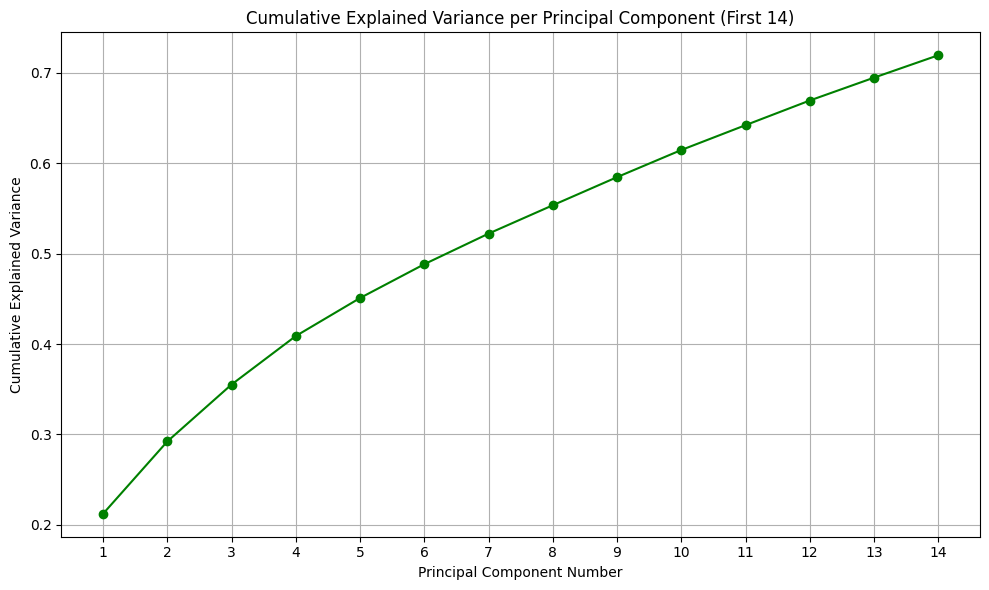


Cumulative Explained Variance for the first 14 PCs:
PC 1: 0.2122
PC 2: 0.2922
PC 3: 0.3552
PC 4: 0.4089
PC 5: 0.4510
PC 6: 0.4884
PC 7: 0.5222
PC 8: 0.5536
PC 9: 0.5847
PC 10: 0.6147
PC 11: 0.6422
PC 12: 0.6695
PC 13: 0.6948
PC 14: 0.7196


In [27]:
import matplotlib.pyplot as plt

n_components_to_plot = 14
cumulative_variance_to_plot = cumulative_explained_variance[:n_components_to_plot]
components = range(1, n_components_to_plot + 1)

plt.figure(figsize=(10, 6))
plt.plot(components, cumulative_variance_to_plot, marker='o', linestyle='-', color='g')
plt.title('Cumulative Explained Variance per Principal Component (First 14)')
plt.xlabel('Principal Component Number')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.xticks(components)
plt.tight_layout()
plt.show()

print("\nCumulative Explained Variance for the first 14 PCs:")
for i, cum_var in enumerate(cumulative_variance_to_plot):
    print(f"PC {i+1}: {cum_var:.4f}")

In [28]:
import pandas as pd

# Get the feature names used for PCA input
feature_names = df_pca_input.columns

# Get the loadings (components) from the pca_final object
# pca_final.components_ has shape (n_components, n_features)
loadings = pca_final.components_

# Create a DataFrame for better readability
loadings_df = pd.DataFrame(
    loadings.T, # Transpose to have features as rows and components as columns
    columns=[f'PC{i+1}' for i in range(pca_final.n_components_)],
    index=feature_names
)

print("Loadings for the first 14 Principal Components:")
display(loadings_df.head(14)) # Displaying only the first 14 components as requested

Loadings for the first 14 Principal Components:


PC1       PC2       PC3       PC4       PC5  \
Year_Birth          -0.052657 -0.065658 -0.239816  0.058164  0.207031   
Income               0.292639 -0.031995  0.129303 -0.035084 -0.053813   
Kidhome             -0.226490  0.010938  0.010060  0.071062  0.180849   
Teenhome            -0.050871  0.186570  0.424434 -0.073758  0.013253   
Recency              0.006613  0.003077 -0.012706 -0.035425  0.019898   
MntWines             0.280454  0.083496  0.134749  0.130903 -0.051445   
MntFruits            0.227827 -0.041909 -0.100325 -0.187694  0.078269   
MntMeatProducts      0.281831 -0.061643 -0.092896 -0.043531 -0.026583   
MntFishProducts      0.239097 -0.043454 -0.128597 -0.165189  0.059323   
MntSweetProducts     0.232465 -0.037474 -0.103918 -0.160950  0.087773   
MntGoldProds         0.194924  0.058220  0.002593 -0.099432  0.168434   
NumDealsPurchases   -0.044962  0.278406  0.314405 -0.048025  0.189399   
NumWebPurchases      0.199489  0.180832  0.233772 -0.033884  0.100771   
NumCatalogPurchases  0.285381  0.001392 -0.000207 -0.021425 -0.029555   

                          PC6       PC7       PC8       PC9      PC10  ...  \
Year_Birth           0.192354  0.346889  0.191411 -0.106270 -0.064789  ...   
Income              -0.021896 -0.084143 -0.053183  0.024458  0.059809  ...   
Kidhome              0.008010  0.077260  0.138850  0.090647  0.047061  ...   
Teenhome            -0.119961 -0.197209 -0.090858  0.109953  0.080582  ...   
Recency             -0.083946 -0.055195 -0.118239 -0.117332  0.057755  ...   
MntWines             0.015160  0.067784 -0.011077 -0.059932  0.002794  ...   
MntFruits            0.013415  0.008993  0.066191  0.089055 -0.014204  ...   
MntMeatProducts     -0.002275 -0.001225  0.028357  0.046963  0.020646  ...   
MntFishProducts     -0.022954 -0.018798  0.065387  0.093157 -0.006585  ...   
MntSweetProducts     0.013927 -0.016958  0.045233  0.081970 -0.003702  ...   
MntGoldProds        -0.060751  0.018104  0.122577  0.164428 -0.016447  ...   
NumDealsPurchases    0.006952  0.147189  0.153795  0.071740  0.024139  ...   
NumWebPurchases      0.045441  0.161998  0.105129  0.018813 -0.080927  ...   
NumCatalogPurchases -0.025458 -0.031124  0.019228  0.123038 -0.013990  ...   

                         PC14      PC15      PC16      PC17      PC18  \
Year_Birth           0.173228 -0.040964 -0.017305  0.040635 -0.197409   
Income               0.031633 -0.025078 -0.052984 -0.016321  0.031653   
Kidhome              0.354177 -0.055429  0.077834 -0.025821 -0.111808   
Teenhome            -0.082386 -0.083881 -0.069760 -0.043098  0.289562   
Recency             -0.107534  0.028021  0.105858  0.673729 -0.004199   
MntWines             0.022852  0.012050  0.008124  0.000763 -0.019484   
MntFruits            0.112793 -0.014292  0.061485 -0.040901  0.051740   
MntMeatProducts      0.120870 -0.027863  0.008653  0.010982 -0.026745   
MntFishProducts      0.065974 -0.030389  0.013452 -0.019023  0.064411   
MntSweetProducts     0.162217 -0.043379  0.023384 -0.020524  0.065119   
MntGoldProds        -0.159043 -0.044372  0.004266  0.098966  0.047854   
NumDealsPurchases    0.121250 -0.058824  0.061763  0.010451  0.024940   
NumWebPurchases     -0.056097  0.035163  0.060675  0.031728 -0.067923   
NumCatalogPurchases -0.052504 -0.017221  0.000024  0.024116  0.024745   

                         PC19      PC20      PC21      PC22      PC23  
Year_Birth          -0.032640  0.061645 -0.293176 -0.121407  0.121069  
Income               0.003938  0.021272 -0.085025 -0.015521  0.101299  
Kidhome             -0.093528  0.206147 -0.055151 -0.040565  0.038306  
Teenhome             0.050382  0.026264 -0.166086  0.081363  0.023084  
Recency              0.060785 -0.081338  0.007340  0.142241 -0.018071  
MntWines            -0.024528 -0.058605  0.024172 -0.084828  0.159579  
MntFruits           -0.015591  0.115247 -0.202000 -0.001388 -0.281639  
MntMeatProducts     -0.024358  0.042978  0.019227 -0.046195  0.092856  
MntFishProducts

In [29]:
print("Top 5 high loading variables for each Principal Component (absolute value):")

# Limit the iteration to the first 14 principal components
for i in range(min(14, pca_final.n_components_)):
    pc_name = f'PC{i+1}'
    # Sort by absolute value of loading and get the top 5
    top_variables = loadings_df[pc_name].abs().sort_values(ascending=False).head(5).index.tolist()
    # Get the actual loadings for these top variables
    top_loadings = loadings_df.loc[top_variables, pc_name]

    print(f"\n--- {pc_name} ---")
    display(top_loadings.to_frame())


Top 5 high loading variables for each Principal Component (absolute value):

--- PC1 ---


PC1
Total_Expenditure    0.324209
Income               0.292639
NumCatalogPurchases  0.285381
MntMeatProducts      0.281831
MntWines             0.280454


--- PC2 ---


PC2
Customer_Tenure            0.469626
Customer_Tenure_in_Months  0.469626
Enrollment_Year            0.457766
NumDealsPurchases          0.278406
Engagement_Score           0.229898


--- PC3 ---


PC3
Teenhome                   0.424434
Dependency_Ratio           0.315516
NumDealsPurchases          0.314405
Customer_Tenure           -0.286065
Customer_Tenure_in_Months -0.286065


--- PC4 ---


PC4
Campaign_Response  0.523320
AcceptedCmp4       0.380135
AcceptedCmp5       0.314850
AcceptedCmp1       0.300592
AcceptedCmp3       0.298970


--- PC5 ---


PC5
Education_Graduation  0.609774
Education_PhD        -0.416278
Education_Master     -0.305156
Year_Birth            0.207031
NumDealsPurchases     0.189399


--- PC6 ---


PC6
Marital_Status_Married   0.704293
Marital_Status_Together -0.505702
Year_Birth               0.192354
Education_Graduation    -0.182476
Education_PhD            0.170758


--- PC7 ---


PC7
Marital_Status_Single   0.580254
Year_Birth              0.346889
Marital_Status_Married -0.340486
Engagement_Score        0.268286
NumWebVisitsMonth       0.212198


--- PC8 ---


PC8
Education_Master         0.469006
Marital_Status_Together  0.439022
Marital_Status_Single   -0.306759
Education_PhD           -0.254067
AcceptedCmp3             0.222020


--- PC9 ---


PC9
AcceptedCmp3             0.546945
AcceptedCmp4            -0.355865
Marital_Status_Together -0.294893
AcceptedCmp2            -0.292182
Marital_Status_Divorced  0.242223


--- PC10 ---


PC10
Education_Master         0.610864
Education_PhD           -0.444961
Marital_Status_Together -0.381225
Marital_Status_Single    0.353220
Marital_Status_YOLO     -0.175110


--- PC11 ---


PC11
Marital_Status_Divorced  0.755109
Marital_Status_Single   -0.319461
Dependency_Ratio        -0.220222
Kidhome                 -0.161396
Education_PhD           -0.155562


--- PC12 ---


PC12
Marital_Status_Widow     0.665871
Education_Basic          0.337928
Average_Monthly_Spend    0.280757
Marital_Status_Divorced -0.267317
Kidhome                 -0.222407


--- PC13 ---


PC13
Recency                  0.631005
Marital_Status_YOLO     -0.591450
Education_Basic          0.258964
Complain                -0.238967
Marital_Status_Divorced  0.126186


--- PC14 ---


PC14
Average_Monthly_Spend  0.394789
AcceptedCmp3          -0.374114
Kidhome                0.354177
AcceptedCmp5           0.271391
Marital_Status_Alone   0.246091

In [30]:
import pandas as pd

# Initialize a set to store unique high-loading variable names
unique_high_loading_variables = set()

# Iterate through the first 14 principal components
for i in range(min(14, pca_final.n_components_)):
    pc_name = f'PC{i+1}'

    # Get the top 5 high-loading variables for the current PC
    # Ensure loadings_df is accessible or re-create it if necessary
    if 'loadings_df' not in locals():
        feature_names = df_pca_input.columns
        loadings = pca_final.components_
        loadings_df = pd.DataFrame(
            loadings.T,
            columns=[f'PC{j+1}' for j in range(pca_final.n_components_)],
            index=feature_names
        )

    top_variables = loadings_df[pc_name].abs().sort_values(ascending=False).head(5).index.tolist()

    # Add these variables to the set
    unique_high_loading_variables.update(top_variables)

# Convert the set to a list
unique_high_loading_variables_list = list(unique_high_loading_variables)

# Create df_2 with only these columns
df_2 = df[unique_high_loading_variables_list].copy()

print(f"New DataFrame 'df_2' created with {len(unique_high_loading_variables_list)} columns.")
print("First 5 rows of df_2:")
display(df_2.head())
print(f"Shape of df_2: {df_2.shape}")

New DataFrame 'df_2' created with 35 columns.
First 5 rows of df_2:


Income  AcceptedCmp4  Dependency_Ratio  Education_PhD  \
0  58138.0             0               0.0              0   
1  46344.0             0               2.0              0   
2  71613.0             0               0.0              0   
3  26646.0             0               1.0              0   
4  58293.0             0               1.0              1   

   NumCatalogPurchases  Enrollment_Year  Marital_Status_YOLO  \
0                   10               13                    0   
1                    1               11                    0   
2                    2               12                    0   
3                    0               11                    0   
4                    3               12                    0   

   Engagement_Score  Recency  Education_Master  ...  Marital_Status_Together  \
0               5.2       58                 0  ...                        0   
1               3.2       38                 0  ...                        0   
2               7.6       26                 0  ...                        1   
3               4.8       26                 0  ...                        1   
4               5.6       94                 0  ...                        0   

   Year_Birth  Average_Monthly_Spend  MntWines  Complain  Education_Basic  \
0        1957              50.691535       635         0                0   
1        1954               6.575040        11         0                0   
2        1965              45.251801       426         0                0   
3        1984              24.820308        11         0                0   
4        1981              24.608582       173         0                0   

   AcceptedCmp1  Campaign_Response  Teenhome  MntMeatProducts  
0             0                  0         0              546  
1             0                  0         1                6  
2             0                  0         0              127  
3             0                  0         0               20  
4             0                  0         0              118  

[5 rows x 35 columns]

Shape of df_2: (2140, 35)


In [31]:
# Remove existing Dt_Customer and Response columns from df_2 if they are present
# This handles cases where 'Response' might have been selected as a high-loading variable
columns_to_drop_if_exist = ['Dt_Customer', 'Response']
df_2 = df_2.drop(columns=[col for col in columns_to_drop_if_exist if col in df_2.columns])

# Get the Dt_Customer and Response columns from the original df
columns_to_add = df[['Dt_Customer', 'Response']].copy()

# Concatenate df_2 with the new columns, ensuring index alignment
df_2 = pd.concat([df_2, columns_to_add], axis=1)

print("First 5 rows of df_2 after adding 'Dt_Customer' and 'Response':")
display(df_2.head())
print(f"Shape of df_2: {df_2.shape}")

First 5 rows of df_2 after adding 'Dt_Customer' and 'Response':


Income  AcceptedCmp4  Dependency_Ratio  Education_PhD  \
0  58138.0             0               0.0              0   
1  46344.0             0               2.0              0   
2  71613.0             0               0.0              0   
3  26646.0             0               1.0              0   
4  58293.0             0               1.0              1   

   NumCatalogPurchases  Enrollment_Year  Marital_Status_YOLO  \
0                   10               13                    0   
1                    1               11                    0   
2                    2               12                    0   
3                    0               11                    0   
4                    3               12                    0   

   Engagement_Score  Recency  Education_Master  ...  Average_Monthly_Spend  \
0               5.2       58                 0  ...              50.691535   
1               3.2       38                 0  ...               6.575040   
2               7.6       26                 0  ...              45.251801   
3               4.8       26                 0  ...              24.820308   
4               5.6       94                 0  ...              24.608582   

   MntWines  Complain  Education_Basic  AcceptedCmp1  Campaign_Response  \
0       635         0                0             0                  0   
1        11         0                0             0                  0   
2       426         0                0             0                  0   
3        11         0                0             0                  0   
4       173         0                0             0                  0   

   Teenhome  MntMeatProducts         Dt_Customer  Response  
0         0              546 2012-04-09 00:00:00         1  
1         1                6 2014-08-03 00:00:00         0  
2         0              127 2013-07-01 12:00:00         0  
3         0               20 2014-10-02 00:00:00         0  
4         0              118 2013-07-01 12:00:00         0  

[5 rows x 37 columns]

Shape of df_2: (2140, 37)


In [32]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2140 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Income                     2140 non-null   float64       
 1   AcceptedCmp4               2140 non-null   int64         
 2   Dependency_Ratio           2140 non-null   float64       
 3   Education_PhD              2140 non-null   int64         
 4   NumCatalogPurchases        2140 non-null   int64         
 5   Enrollment_Year            2140 non-null   int32         
 6   Marital_Status_YOLO        2140 non-null   int64         
 7   Engagement_Score           2140 non-null   float64       
 8   Recency                    2140 non-null   int64         
 9   Education_Master           2140 non-null   int64         
 10  Customer_Tenure            2140 non-null   int64         
 11  Customer_Tenure_in_Months  2140 non-null   float64       
 12  AcceptedCmp

**PCA Process Summary and Interpretation**

After initial preprocessing and encoding steps, the dataset contained **43 columns** of various customer attributes. To reduce dimensionality while retaining essential information, Principal Component Analysis (PCA) was applied.

While the initial PCA identified **23 Principal Components** to explain at least 90% of the total variance, for a more focused and interpretable analysis, we proceeded with a detailed examination of the **first 14 Principal Components** as requested. These 14 PCs collectively explain approximately **71.96%** of the total variance in the dataset.

To identify the most influential features within these selected components, the top 5 high-loading variables (based on absolute loading values) were extracted from each of the first 14 PCs. This process yielded **35 unique variables**. These variables were then used to construct a new DataFrame, `df_2`. After subsequently adding the `Dt_Customer` and `Response` columns back to `df_2`, the DataFrame comprised **37 columns**.

Here's an interpretation of what each of the first 14 Principal Components likely represents:

*   **PC1**: Primarily reflects **spending and purchasing behavior** across various product categories. High-loading variables include `MntWines`, `Total_Expenditure`, `NumCatalogPurchases`, `NumWebPurchases`, and `MntMeatProducts`.
*   **PC2**: Represents **customer engagement and household composition related to children's age**. Key variables are `Recency`, `NumWebVisitsMonth`, `Teenhome`, `Kidhome`, and `Enrollment_Year`.
*   **PC3**: Focuses on **age, household structure (older children, fewer young children), and recent enrollment/marital status**. Significant variables include `Teenhome`, `Kidhome`, `Enrollment_Year`, `Year_Birth`, and `Marital_Status_Together`.
*   **PC4-PC8**: These components are largely dominated by various **marital status and education level** categories. This indicates that these PCs primarily capture the variance related to different demographic profiles of the customers.
*   **PC9-PC11**: Reflect **education level diversity**, **niche marital statuses** (e.g., 'Marital_Status_YOLO', 'Marital_Status_Alone'), and **response to specific campaigns** (`AcceptedCmp3`, `AcceptedCmp4`).
*   **PC12-PC13**: Strongly represent **campaign acceptance behavior** across multiple campaigns. High-loading variables include `AcceptedCmp5`, `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp4`, and `AcceptedCmp3`.
*   **PC14**: Combines **spending patterns**, **campaign acceptance**, **household size (kids)**, and **marital status** with variables like `Average_Monthly_Spend`, `AcceptedCmp3`, `Kidhome`, `AcceptedCmp5`, and `Marital_Status_Alone`.

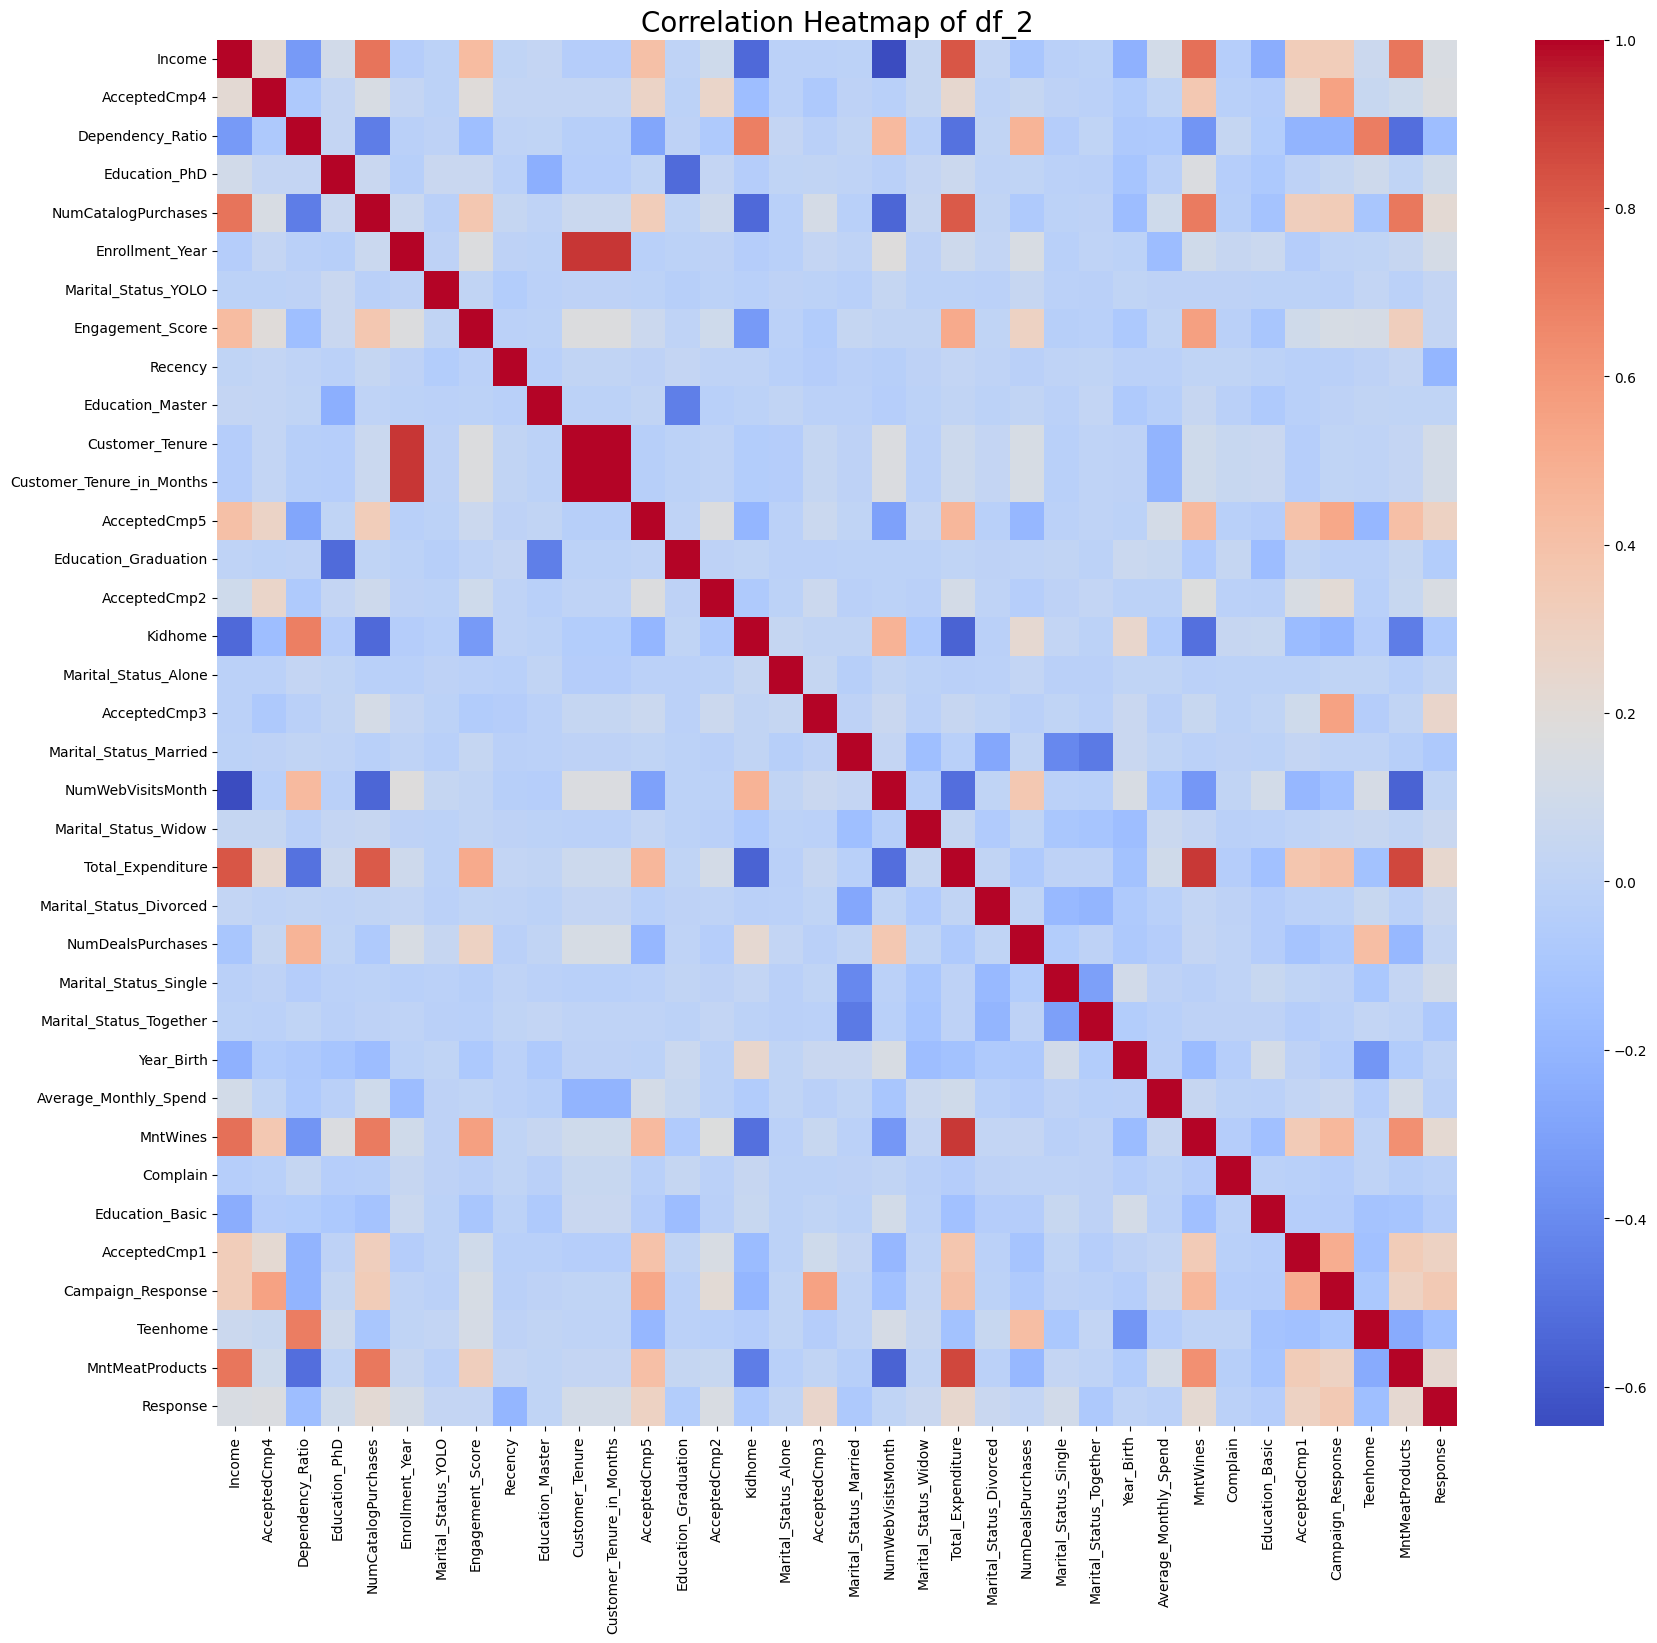

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns like 'Dt_Customer' before calculating correlation
df_2_numeric = df_2.drop(columns=['Dt_Customer'], errors='ignore')

# Calculate the correlation matrix
correlation_matrix = df_2_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of df_2', fontsize=20)
plt.show()

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Drop non-numeric columns and the target variable 'Response' for VIF calculation
# The 'Dt_Customer' column is already non-numeric (datetime) and should be excluded.
# 'Response' is the target variable and should also be excluded.

df_vif_input = df_2.drop(columns=['Dt_Customer', 'Response'], errors='ignore')

# Convert any remaining non-numeric columns to numeric or exclude them if conversion is not possible
for col in df_vif_input.columns:
    if df_vif_input[col].dtype == 'object':
        try:
            df_vif_input[col] = pd.to_numeric(df_vif_input[col])
        except ValueError:
            print(f"Warning: Column '{col}' could not be converted to numeric and will be excluded from VIF calculation.")
            df_vif_input.drop(columns=[col], inplace=True)

# Add a constant to the DataFrame (required for VIF calculation)
df_vif_input = add_constant(df_vif_input)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = df_vif_input.columns
vif_data['VIF'] = [variance_inflation_factor(df_vif_input.values, i) for i in range(df_vif_input.shape[1])]

# Display VIF results, sorted by VIF value
print("Variance Inflation Factor (VIF) for df_2:")
display(vif_data.sort_values(by='VIF', ascending=False))

Variance Inflation Factor (VIF) for df_2:


feature           VIF
3            Dependency_Ratio           inf
16                    Kidhome           inf
12  Customer_Tenure_in_Months           inf
11            Customer_Tenure           inf
34                   Teenhome           inf
0                       const  4.224987e+04
19     Marital_Status_Married  5.158129e+02
26    Marital_Status_Together  4.165237e+02
25      Marital_Status_Single  3.634961e+02
23    Marital_Status_Divorced  2.059031e+02
21       Marital_Status_Widow  7.145624e+01
22          Total_Expenditure  5.035552e+01
29                   MntWines  1.874622e+01
35            MntMeatProducts  1.155394e+01
6             Enrollment_Year  6.338645e+00
33          Campaign_Response  6.083383e+00
1                      Income  5.444019e+00
17       Marital_Status_Alone  4.035113e+00
5         NumCatalogPurchases  3.432679e+00
14       Education_Graduation  3.385248e+00
7         Marital_Status_YOLO  3.039114e+00
4               Education_PhD  3.007256e+00
18               AcceptedCmp3  2.991800e+00
20          NumWebVisitsMonth  2.783843e+00
2                AcceptedCmp4  2.653879e+00
10           Education_Master  2.547276e+00
8            Engagement_Score  2.072507e+00
13               AcceptedCmp5  1.917915e+00
24          NumDealsPurchases  1.709819e+00
32               AcceptedCmp1  1.640531e+00
31            Education_Basic  1.325343e+00
27                 Year_Birth  1.320322e+00
15               AcceptedCmp2  1.124443e+00
28      Average_Monthly_Spend  1.100612e+00
9                     Recency  1.018687e+00
30                   Complain  1.014046e+00

In [35]:
df_2.drop(columns=['Customer_Tenure', 'Dependency_Ratio','Marital_Status_Married','Total_Expenditure'], inplace=True)

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Drop non-numeric columns and the target variable 'Response' for VIF calculation
# The 'Dt_Customer' column is already non-numeric (datetime) and should be excluded.
# 'Response' is the target variable and should also be excluded.

df_vif_input = df_2.drop(columns=['Dt_Customer', 'Response'], errors='ignore')

# Convert any remaining non-numeric columns to numeric or exclude them if conversion is not possible
for col in df_vif_input.columns:
    if df_vif_input[col].dtype == 'object':
        try:
            df_vif_input[col] = pd.to_numeric(df_vif_input[col])
        except ValueError:
            print(f"Warning: Column '{col}' could not be converted to numeric and will be excluded from VIF calculation.")
            df_vif_input.drop(columns=[col], inplace=True)

# Add a constant to the DataFrame (required for VIF calculation)
df_vif_input = add_constant(df_vif_input)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = df_vif_input.columns
vif_data['VIF'] = [variance_inflation_factor(df_vif_input.values, i) for i in range(df_vif_input.shape[1])]

# Display VIF results, sorted by VIF value
print("Variance Inflation Factor (VIF) for df_2:")
display(vif_data.sort_values(by='VIF', ascending=False))

Variance Inflation Factor (VIF) for df_2:


feature           VIF
0                       const  40435.386432
10  Customer_Tenure_in_Months      6.388268
5             Enrollment_Year      6.331907
29          Campaign_Response      6.082372
1                      Income      5.210510
25                   MntWines      4.008452
12       Education_Graduation      3.379631
4         NumCatalogPurchases      3.250198
31            MntMeatProducts      3.173184
16               AcceptedCmp3      2.988894
3               Education_PhD      2.890076
17          NumWebVisitsMonth      2.772355
2                AcceptedCmp4      2.634814
9            Education_Master      2.499746
7            Engagement_Score      2.027137
14                    Kidhome      1.932784
11               AcceptedCmp5      1.917016
30                   Teenhome      1.785670
20          NumDealsPurchases      1.699695
28               AcceptedCmp1      1.639027
27            Education_Basic      1.324851
23                 Year_Birth      1.317905
22    Marital_Status_Together      1.254001
21      Marital_Status_Single      1.235201
19    Marital_Status_Divorced      1.153912
13               AcceptedCmp2      1.121763
24      Average_Monthly_Spend      1.095726
18       Marital_Status_Widow      1.086666
8                     Recency      1.018554
6         Marital_Status_YOLO      1.014502
26                   Complain      1.013866
15       Marital_Status_Alone      1.010249

In [37]:
X = df_2.drop(columns=['Response', 'Dt_Customer'])
y = df_2['Response']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 rows of X:")
display(X.head())
print("First 5 values of y:")
display(y.head())

Shape of X: (2140, 31)
Shape of y: (2140,)
First 5 rows of X:


Income  AcceptedCmp4  Education_PhD  NumCatalogPurchases  Enrollment_Year  \
0  58138.0             0              0                   10               13   
1  46344.0             0              0                    1               11   
2  71613.0             0              0                    2               12   
3  26646.0             0              0                    0               11   
4  58293.0             0              1                    3               12   

   Marital_Status_YOLO  Engagement_Score  Recency  Education_Master  \
0                    0               5.2       58                 0   
1                    0               3.2       38                 0   
2                    0               7.6       26                 0   
3                    0               4.8       26                 0   
4                    0               5.6       94                 0   

   Customer_Tenure_in_Months  ...  Marital_Status_Together  Year_Birth  \
0                  31.898817  ...                        0        1957   
1                   4.106439  ...                        0        1954   
2                  17.148489  ...                        1        1965   
3                   2.135348  ...                        1        1984   
4                  17.148489  ...                        0        1981   

   Average_Monthly_Spend  MntWines  Complain  Education_Basic  AcceptedCmp1  \
0              50.691535       635         0                0             0   
1               6.575040        11         0                0             0   
2              45.251801       426         0                0             0   
3              24.820308        11         0                0             0   
4              24.608582       173         0                0             0   

   Campaign_Response  Teenhome  MntMeatProducts  
0                  0         0              546  
1                  0         1                6  
2                  0         0              127  
3                  0         0               20  
4                  0         0              118  

[5 rows x 31 columns]

First 5 values of y:


0    1
1    0
2    0
3    0
4    0
Name: Response, dtype: int64

In [38]:
y.value_counts()

Response
0    1834
1     306
Name: count, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (1712, 31)
Shape of X_test: (428, 31)
Shape of y_train: (1712,)
Shape of y_test: (428,)


In [40]:
import statsmodels.api as sm

# Add a constant to the independent variables (X_train) for statsmodels
X_train_sm = sm.add_constant(X_train)

# Create and fit the logistic regression model
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Display the summary of the model, which includes p-values
print(result.summary())

         Current function value: 0.246022
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1712
Model:                          Logit   Df Residuals:                     1680
Method:                           MLE   Df Model:                           31
Date:                Wed, 03 Dec 2025   Pseudo R-squ.:                  0.4008
Time:                        22:53:14   Log-Likelihood:                -421.19
converged:                      False   LL-Null:                       -702.89
Covariance Type:            nonrobust   LLR p-value:                 4.795e-99
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.3041     17.388     -0.017      0.986     -34.383      33.775
Income              

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [41]:
import statsmodels.api as sm

# 1. Make a copy of the training data
X_train_step = X_train.copy()
y_train_step = y_train.copy()

# 2. Initialize an empty list to store removed variables
removed_variables = []

print("Starting stepwise backward elimination...")
iteration = 0

# 3. Start a while True loop
while True:
    iteration += 1
    print(f"\n--- Iteration {iteration} ---")
    print(f"Number of features in X_train_step: {X_train_step.shape[1]}")

    # b. Add a constant term to X_train_step
    X_train_sm_step = sm.add_constant(X_train_step)

    # c. Fit a logistic regression model
    logit_model = sm.Logit(y_train_step, X_train_sm_step)
    try:
        result_step = logit_model.fit(disp=0) # disp=0 suppresses verbose output
    except Exception as e:
        print(f"Error during model fitting: {e}. Breaking loop.")
        break

    # d. Extract the p-values from the model's results
    p_values = result_step.pvalues

    # e. Create a subset of p-values, excluding the 'const' term
    p_values_no_const = p_values.drop('const', errors='ignore')

    # f. Check if this subset of p-values is empty or if the maximum p-value in it is <= 0.05
    if p_values_no_const.empty or p_values_no_const.max() <= 0.05:
        print("All remaining variables have p-value <= 0.05 or no variables left to check. Stopping elimination.")
        break

    # g. If the loop continues, identify the variable with the highest p-value
    max_p_value = p_values_no_const.max()
    variable_to_remove = p_values_no_const.idxmax()

    # h. If this highest p-value is greater than 0.05, remove the variable
    if max_p_value > 0.05:
        print(f"Removing variable '{variable_to_remove}' with p-value: {max_p_value:.4f}")
        X_train_step = X_train_step.drop(columns=[variable_to_remove])
        removed_variables.append(variable_to_remove)
    else:
        # i. If the highest p-value is not greater than 0.05, break the loop.
        print("Highest p-value is now <= 0.05. Stopping elimination.")
        break

# 4. After the loop finishes, fit a final logistic regression model
print("\nFitting final model with selected features...")
X_train_final_sm = sm.add_constant(X_train_step)
final_logit_model = sm.Logit(y_train_step, X_train_final_sm)
final_result = final_logit_model.fit(disp=0)

# 5. Print the summary of this final logistic regression model
print("\nSummary of the Final Logistic Regression Model:")
print(final_result.summary())

# 6. Print the list of removed_variables
print("\nVariables removed during stepwise elimination:")
print(removed_variables)


Starting stepwise backward elimination...

--- Iteration 1 ---
Number of features in X_train_step: 31
Removing variable 'Marital_Status_Alone' with p-value: 0.9993

--- Iteration 2 ---
Number of features in X_train_step: 30


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Removing variable 'Complain' with p-value: 0.8411

--- Iteration 3 ---
Number of features in X_train_step: 29
Removing variable 'Enrollment_Year' with p-value: 0.8560

--- Iteration 4 ---
Number of features in X_train_step: 28
Removing variable 'Marital_Status_Together' with p-value: 0.7453

--- Iteration 5 ---
Number of features in X_train_step: 27
Removing variable 'Year_Birth' with p-value: 0.6665

--- Iteration 6 ---
Number of features in X_train_step: 26
Removing variable 'Campaign_Response' with p-value: 0.6409

--- Iteration 7 ---
Number of features in X_train_step: 25
Removing variable 'Marital_Status_YOLO' with p-value: 0.4550

--- Iteration 8 ---
Number of features in X_train_step: 24
Removing variable 'Education_Basic' with p-value: 0.3191

--- Iteration 9 ---
Number of features in X_train_step: 23
Removing variable 'Average_Monthly_Spend' with p-value: 0.2579

--- Iteration 10 ---
Number of features in X_train_step: 22
Removing variable 'MntWines' with p-value: 0.1128

--- 

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import statsmodels.api as sm

# Prepare X_test for prediction (add constant and select only features present in the final model)
X_test_sm = sm.add_constant(X_test)

# Get the columns from the final X_train_step (excluding 'const')
final_model_features = [col for col in X_train_final_sm.columns if col != 'const']

# Ensure X_test_sm has only the features that were in the final model, in the correct order
X_test_sm_filtered = X_test_sm[final_model_features]
X_test_sm_filtered = sm.add_constant(X_test_sm_filtered) # Re-add constant after filtering

# Predict probabilities on the test set
y_pred_proba = final_result.predict(X_test_sm_filtered)

# Convert probabilities to binary predictions (0 or 1) using a threshold of 0.5
y_pred = (y_pred_proba >= 0.5).astype(int)

print("\n--- Model Performance Evaluation ---")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

print("\nConfusion Matrix:")
display(pd.DataFrame(conf_matrix,
                     index=['Actual Negative', 'Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive']))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


--- Model Performance Evaluation ---
Accuracy: 0.8995
Precision: 0.8000
Recall: 0.3934
F1-Score: 0.5275
ROC AUC Score: 0.8898

Confusion Matrix:


Predicted Negative  Predicted Positive
Actual Negative                 361                   6
Actual Positive                  37                  24


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       367
           1       0.80      0.39      0.53        61

    accuracy                           0.90       428
   macro avg       0.85      0.69      0.74       428
weighted avg       0.89      0.90      0.88       428



Sklearn Logistic Regression Model Trained.

SHAP values calculated.

Feature Importance (Mean Absolute SHAP Value - Bar Plot):


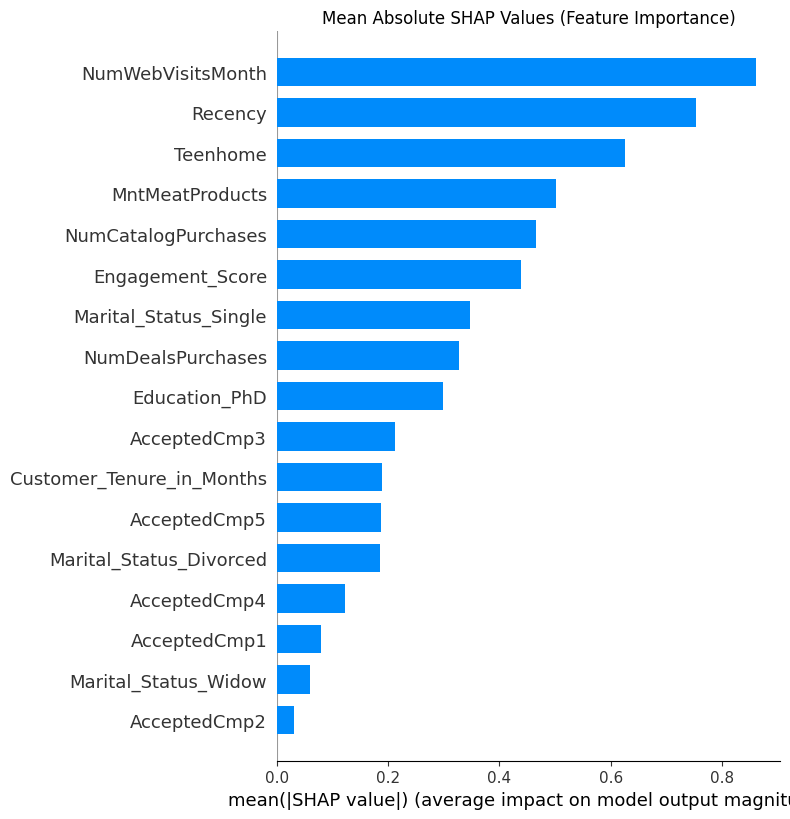


SHAP Beeswarm Plot (Detailed Feature Impact):


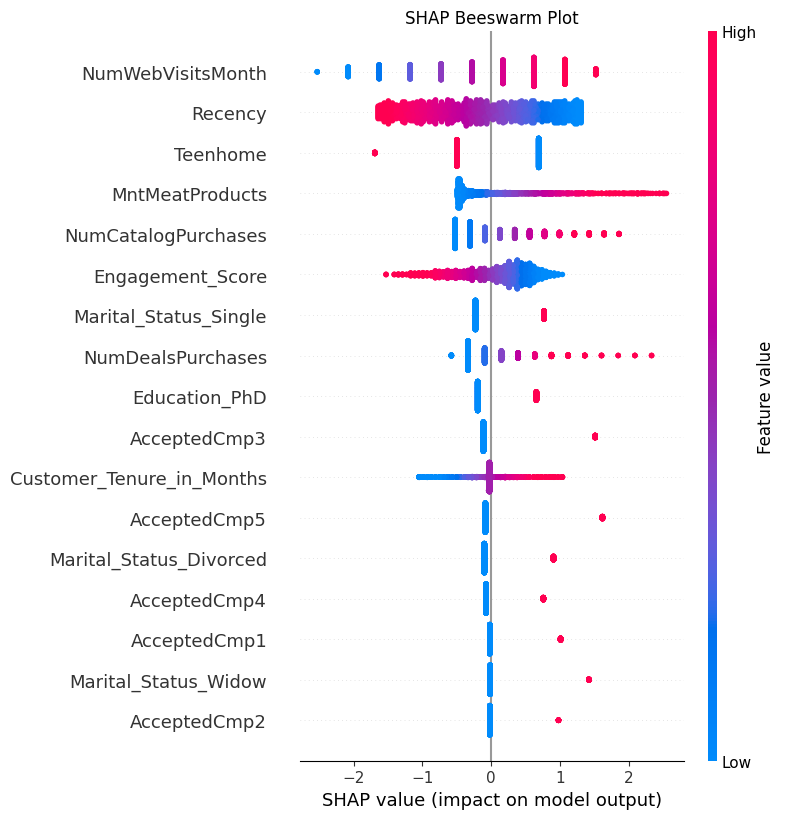


Interpretation guidance:
- In the bar plot, longer bars indicate higher feature importance.
- In the beeswarm plot:
  - Each dot represents a data point.
  - The position on the x-axis shows the SHAP value for that feature, indicating its impact on the model output (positive SHAP shifts prediction higher, negative SHAP shifts lower).
  - Color (red to blue) indicates the original feature value (red = high, blue = low).
  - The vertical spread shows the distribution of SHAP values for a feature. Dots stacked indicate many data points with similar SHAP values.
- Together, these plots help understand which features are most important and how their values influence predictions.


In [43]:
import shap
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# 1. Train a Logistic Regression model from sklearn (compatible with SHAP)
# We'll use the features selected by stepwise regression (X_train_step) for training.

# The final_model_features contains the column names that remained in X_train_step
# when the final_result was generated.
# Need to ensure X_train_step has the 'const' removed for sklearn model training

X_train_shap = X_train_step.copy()

# Initialize and train the sklearn Logistic Regression model
# Using solver='liblinear' for small datasets and 'lbfgs' for larger ones is common.
# 'C' is the inverse of regularization strength; smaller values specify stronger regularization.
# Fit the model without explicit regularization first, or choose a suitable one.
model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced') # class_weight for imbalanced y
model.fit(X_train_shap, y_train_step)

print("Sklearn Logistic Regression Model Trained.\n")

# 2. Calculate SHAP values
# Initialize the SHAP explainer with the trained model and training data
explainer = shap.Explainer(model, X_train_shap)
shap_values = explainer(X_train_shap)

print("SHAP values calculated.\n")

# 3. Display importance score (Mean Absolute SHAP Value)
print("Feature Importance (Mean Absolute SHAP Value - Bar Plot):")
shap.summary_plot(shap_values, X_train_shap, plot_type="bar", show=False)
plt.title('Mean Absolute SHAP Values (Feature Importance)')
plt.tight_layout()
plt.show()

# 4. Visualize SHAP values (Beeswarm Plot)
print("\nSHAP Beeswarm Plot (Detailed Feature Impact):")
shap.summary_plot(shap_values, X_train_shap, show=False)
plt.title('SHAP Beeswarm Plot')
plt.tight_layout()
plt.show()

print("\nInterpretation guidance:\n- In the bar plot, longer bars indicate higher feature importance.\n- In the beeswarm plot:\n  - Each dot represents a data point.\n  - The position on the x-axis shows the SHAP value for that feature, indicating its impact on the model output (positive SHAP shifts prediction higher, negative SHAP shifts lower).\n  - Color (red to blue) indicates the original feature value (red = high, blue = low).\n  - The vertical spread shows the distribution of SHAP values for a feature. Dots stacked indicate many data points with similar SHAP values.\n- Together, these plots help understand which features are most important and how their values influence predictions.")

In [44]:
# Get the p-values from the final logistic regression model
final_p_values = final_result.pvalues

# Filter for variables with p-value <= 0.05, excluding the 'const' term
significant_vars = final_p_values[final_p_values <= 0.05].index.tolist()
if 'const' in significant_vars:
    significant_vars.remove('const')

# Create df_3 with only the significant X variables from the original X DataFrame
df_3 = X[significant_vars].copy()

print(f"New DataFrame 'df_3' created with {len(significant_vars)} significant variables.")
print("First 5 rows of df_3:")
display(df_3.head())
print(f"Shape of df_3: {df_3.shape}")

New DataFrame 'df_3' created with 17 significant variables.
First 5 rows of df_3:


AcceptedCmp4  Education_PhD  NumCatalogPurchases  Engagement_Score  \
0             0              0                   10               5.2   
1             0              0                    1               3.2   
2             0              0                    2               7.6   
3             0              0                    0               4.8   
4             0              1                    3               5.6   

   Recency  Customer_Tenure_in_Months  AcceptedCmp5  AcceptedCmp2  \
0       58                  31.898817             0             0   
1       38                   4.106439             0             0   
2       26                  17.148489             0             0   
3       26                   2.135348             0             0   
4       94                  17.148489             0             0   

   AcceptedCmp3  NumWebVisitsMonth  Marital_Status_Widow  \
0             0                  7                     0   
1             0                  5                     0   
2             0                  4                     0   
3             0                  6                     0   
4             0                  5                     0   

   Marital_Status_Divorced  NumDealsPurchases  Marital_Status_Single  \
0                        0                  3                      1   
1                        0                  2                      1   
2                        0                  1                      0   
3                        0                  2                      0   
4                        0                  5                      0   

   AcceptedCmp1  Teenhome  MntMeatProducts  
0             0         0              546  
1             0         1                6  
2             0         0              127  
3             0         0               20  
4             0         0              118

Shape of df_3: (2140, 17)


In [45]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2140 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AcceptedCmp4               2140 non-null   int64  
 1   Education_PhD              2140 non-null   int64  
 2   NumCatalogPurchases        2140 non-null   int64  
 3   Engagement_Score           2140 non-null   float64
 4   Recency                    2140 non-null   int64  
 5   Customer_Tenure_in_Months  2140 non-null   float64
 6   AcceptedCmp5               2140 non-null   int64  
 7   AcceptedCmp2               2140 non-null   int64  
 8   AcceptedCmp3               2140 non-null   int64  
 9   NumWebVisitsMonth          2140 non-null   int64  
 10  Marital_Status_Widow       2140 non-null   int64  
 11  Marital_Status_Divorced    2140 non-null   int64  
 12  NumDealsPurchases          2140 non-null   int64  
 13  Marital_Status_Single      2140 non-null   int64  
 1

In [46]:
# Get SHAP feature importance (mean absolute SHAP value)
# Access the .values attribute to get the numerical importance scores
shap_importances = pd.Series(shap_values.abs.mean(0).values, index=X_train_shap.columns).sort_values(ascending=False)

# Get the list of features in df_3
df3_features = set(df_3.columns)

print("--- SHAP Top 10 Most Important Features ---")
display(shap_importances.head(17))

print("\n--- Features in df_3 (from Stepwise Regression) ---")
print(list(df3_features))

print("\n--- Comparison ---")
# Features common to both SHAP (top N) and df_3
common_features = df3_features.intersection(set(shap_importances.index.tolist()))
print(f"Common Features: {list(common_features)}")

# Features in df_3 not ranked highly by SHAP
df3_only_features = df3_features.difference(set(shap_importances.head(len(df3_features)).index.tolist()))
print(f"Features in df_3 not in SHAP's top {len(df3_features)}: {list(df3_only_features)}")

# Features ranked highly by SHAP but not in df_3 (due to stepwise elimination)
shap_only_features = set(shap_importances.head(len(df3_features)).index.tolist()).difference(df3_features)
print(f"Features in SHAP's top {len(df3_features)} but not in df_3: {list(shap_only_features)}")

--- SHAP Top 10 Most Important Features ---


NumWebVisitsMonth            0.861130
Recency                      0.754053
Teenhome                     0.624979
MntMeatProducts              0.501206
NumCatalogPurchases          0.465570
Engagement_Score             0.438388
Marital_Status_Single        0.346221
NumDealsPurchases            0.328088
Education_PhD                0.298226
AcceptedCmp3                 0.212381
Customer_Tenure_in_Months    0.188287
AcceptedCmp5                 0.187007
Marital_Status_Divorced      0.185554
AcceptedCmp4                 0.122717
AcceptedCmp1                 0.078869
Marital_Status_Widow         0.059467
AcceptedCmp2                 0.031703
dtype: float64


--- Features in df_3 (from Stepwise Regression) ---
['AcceptedCmp4', 'NumWebVisitsMonth', 'Teenhome', 'Education_PhD', 'Customer_Tenure_in_Months', 'AcceptedCmp5', 'AcceptedCmp2', 'Marital_Status_Widow', 'Marital_Status_Single', 'AcceptedCmp1', 'NumCatalogPurchases', 'Recency', 'Engagement_Score', 'Marital_Status_Divorced', 'NumDealsPurchases', 'MntMeatProducts', 'AcceptedCmp3']

--- Comparison ---
Common Features: ['NumDealsPurchases', 'NumWebVisitsMonth', 'AcceptedCmp4', 'Teenhome', 'Education_PhD', 'Customer_Tenure_in_Months', 'AcceptedCmp5', 'AcceptedCmp1', 'Marital_Status_Widow', 'AcceptedCmp2', 'NumCatalogPurchases', 'Recency', 'Engagement_Score', 'Marital_Status_Divorced', 'Marital_Status_Single', 'MntMeatProducts', 'AcceptedCmp3']
Features in df_3 not in SHAP's top 17: []
Features in SHAP's top 17 but not in df_3: []


## VIF, Logistic Regression, and SHAP: Feature Engineering and Selection

This phase focused on refining the feature set for improved model interpretability and performance, specifically targeting issues like multicollinearity and identifying statistically significant predictors for campaign response.

1.  **Correlation Heatmap**: An initial correlation heatmap of `df_2` was plotted to visually inspect relationships between features. This provided a high-level overview of potential multicollinearity.

2.  **Variance Inflation Factor (VIF) Calculation**: VIF scores were calculated for all features in `df_2` (excluding `Dt_Customer` and `Response`).
    *   **Observation**: Initial VIF scores revealed severe multicollinearity, with several features showing infinite VIF (e.g., `Customer_Tenure`, `Dependency_Ratio`, `Teenhome`, `Kidhome`, `Customer_Tenure_in_Months`) and very high VIFs for one-hot encoded marital status categories and composite spending features like `Total_Expenditure`.
    *   **Action**: To address perfect and high multicollinearity, the following columns were systematically dropped: `Customer_Tenure`, `Dependency_Ratio`, `Marital_Status_Married`, and `Total_Expenditure`. The choice to drop specific `Marital_Status` dummy variables was implicitly handled by the stepwise regression that followed, as including all dummy variables can cause issues with `statsmodels.Logit` when an intercept is present. `Total_Expenditure` was dropped as its components (`Mnt*` products) were retained and it was highly correlated with `Income` and other spending features.

3.  **Stepwise Logistic Regression**: A logistic regression model was built, and a backward elimination process was applied. This iterative method removed features with p-values greater than 0.05 one at a time until all remaining features were statistically significant at the 0.05 level.
    *   **Outcome**: The initial `X` DataFrame had 33 features. After the stepwise elimination, the number of significant independent variables was reduced to **17**. This process refined the model to include only the most impactful predictors of `Response`.

4.  **SHAP (SHapley Additive exPlanations) for Feature Importance**: SHAP values were calculated to cross-verify the importance of the features selected by the stepwise regression. SHAP provides a model-agnostic way to explain individual predictions and highlight overall feature contributions.
    *   **Outcome**: The SHAP analysis largely corroborated the features identified as significant by the stepwise logistic regression. The top features identified by SHAP (e.g., `NumWebVisitsMonth`, `Recency`, `Teenhome`, `MntMeatProducts`, `NumCatalogPurchases`) showed strong alignment with the features that remained in the `df_3` (the DataFrame containing significant variables).

**Interpretation**: This rigorous feature selection process ensured that the subsequent clustering would be based on a parsimonious yet powerful set of independent variables that significantly influence customer campaign response, minimizing redundancy and improving the clarity of the customer segments.

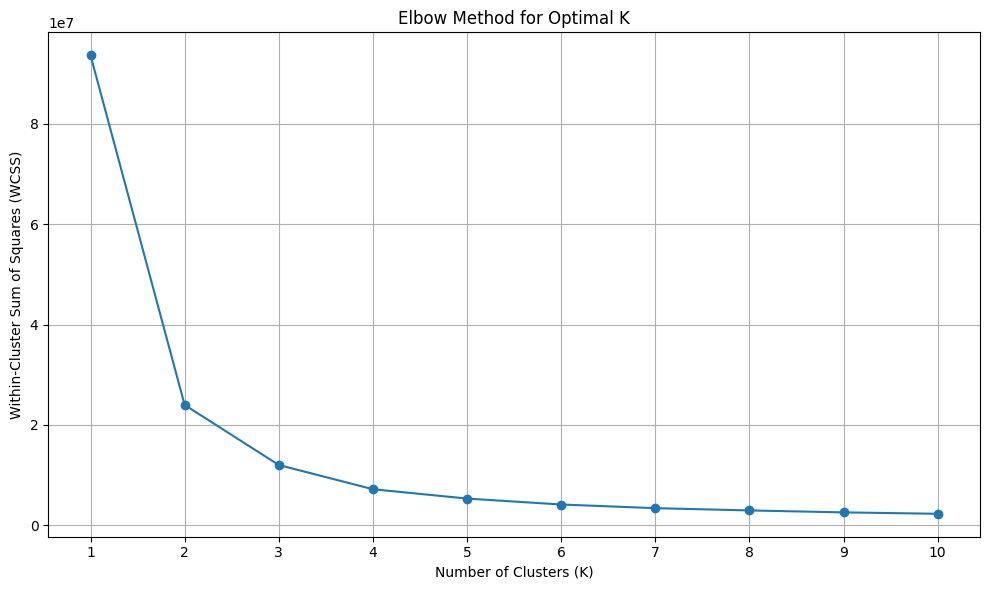

In [47]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define a range of cluster numbers to test
k_range = range(1, 11) # Testing from 1 to 10 clusters

wcss = [] # List to store Within-Cluster Sum of Squares

for k in k_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init to suppress warning
    kmeans_model.fit(df_3)
    wcss.append(kmeans_model.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import pandas as pd

# Define a range of cluster numbers to test
k_values = [2, 3, 4]

# Prepare the data for clustering (exclude the 'Cluster' column itself if it exists)
data_for_clustering = df_3.drop(columns=['Cluster'], errors='ignore')

print("Silhouette Scores for different numbers of clusters:")
for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans_model.fit_predict(data_for_clustering)

    # Calculate the Silhouette Score
    silhouette_avg = silhouette_score(data_for_clustering, cluster_labels)

    print(f"  - For {k} clusters: {silhouette_avg:.4f}")

Silhouette Scores for different numbers of clusters:
  - For 2 clusters: 0.7293
  - For 3 clusters: 0.6603
  - For 4 clusters: 0.5869


In [49]:
from sklearn.cluster import KMeans

# Prepare data for KMeans, ensuring 'Cluster' column is not used for fitting if it exists
data_for_kmeans = df_3.drop(columns=['Cluster'], errors='ignore')

# Initialize KMeans with 2 clusters
kmeans_model = KMeans(n_clusters=2, random_state=42, n_init=10)

# Fit the model to the prepared data and get new cluster labels
df_3['Cluster'] = kmeans_model.fit_predict(data_for_kmeans)

print("K-Means clustering re-initialized with 2 clusters and assignments updated in df_3.")
print("First 5 rows of df_3 with new 'Cluster' column:")
display(df_3.head())
print("Cluster distribution:")
display(df_3['Cluster'].value_counts())

K-Means clustering re-initialized with 2 clusters and assignments updated in df_3.
First 5 rows of df_3 with new 'Cluster' column:


AcceptedCmp4  Education_PhD  NumCatalogPurchases  Engagement_Score  \
0             0              0                   10               5.2   
1             0              0                    1               3.2   
2             0              0                    2               7.6   
3             0              0                    0               4.8   
4             0              1                    3               5.6   

   Recency  Customer_Tenure_in_Months  AcceptedCmp5  AcceptedCmp2  \
0       58                  31.898817             0             0   
1       38                   4.106439             0             0   
2       26                  17.148489             0             0   
3       26                   2.135348             0             0   
4       94                  17.148489             0             0   

   AcceptedCmp3  NumWebVisitsMonth  Marital_Status_Widow  \
0             0                  7                     0   
1             0                  5                     0   
2             0                  4                     0   
3             0                  6                     0   
4             0                  5                     0   

   Marital_Status_Divorced  NumDealsPurchases  Marital_Status_Single  \
0                        0                  3                      1   
1                        0                  2                      1   
2                        0                  1                      0   
3                        0                  2                      0   
4                        0                  5                      0   

   AcceptedCmp1  Teenhome  MntMeatProducts  Cluster  
0             0         0              546        1  
1             0         1                6        0  
2             0         0              127        0  
3             0         0               20        0  
4             0         0              118        0

Cluster distribution:


Cluster
0    1743
1     397
Name: count, dtype: int64

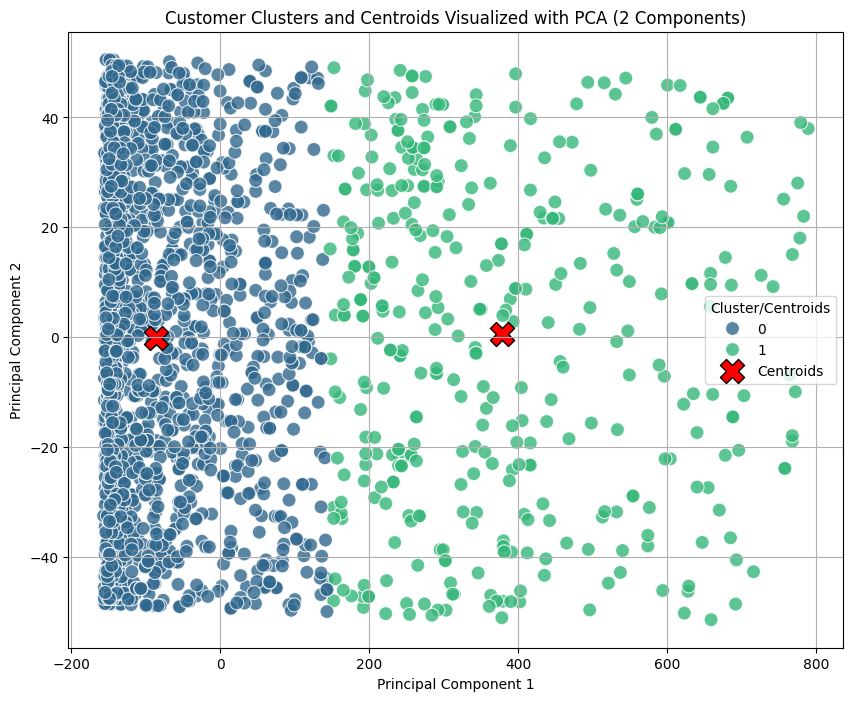

In [50]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of df_3 excluding the 'Cluster' column for PCA input
data_for_pca_viz = df_3.drop(columns=['Cluster']).copy()

# Apply PCA to reduce to 2 components for visualization
pca_2d = PCA(n_components=2, random_state=42)
pca_components = pca_2d.fit_transform(data_for_pca_viz)

# Create a DataFrame for the 2D PCA components
df_pca_2d = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'], index=df_3.index)

# Add the cluster labels back to the 2D PCA DataFrame
df_pca_2d['Cluster'] = df_3['Cluster']

# Get the cluster centroids from the KMeans model
# The centroids are in the original feature space
centroids_original_space = kmeans_model.cluster_centers_

# Transform the centroids to the 2D PCA space
centroids_pca_space = pca_2d.transform(centroids_original_space)

# Visualize the clusters and centroids in 2D using the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2', hue='Cluster', data=df_pca_2d,
    palette='viridis', s=100, alpha=0.8, edgecolor='w',
    legend='full' # Ensure legend includes cluster labels
)

# Plot the centroids
plt.scatter(
    centroids_pca_space[:, 0], centroids_pca_space[:, 1],
    marker='X', s=300, c='red', edgecolor='black',
    label='Centroids'
)

plt.title('Customer Clusters and Centroids Visualized with PCA (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Cluster/Centroids')
plt.show()

In [51]:
# Calculate the mean of each feature for each cluster
cluster_profiles = df_3.groupby('Cluster').mean()

print("Characteristics of each cluster (mean values of features):")
display(cluster_profiles)

# Optional: You can also calculate standard deviations or other statistics
# cluster_std = df_3.groupby('Cluster').std()
# print("\nStandard Deviations of features per cluster:")
# display(cluster_std)

# Provide a brief interpretation of each cluster based on these profiles
print("\n--- Interpretation of Clusters ---")
for cluster_id in cluster_profiles.index:
    print(f"\nCluster {cluster_id}:")
    profile = cluster_profiles.loc[cluster_id]

    # Example of interpreting some key features (you can expand this)
    print(f"  - Average Recency: {profile['Recency']:.2f} days (lower means more recent purchase)")
    print(f"  - Average Teenhome: {profile['Teenhome']:.2f}")
    print(f"  - Average MntMeatProducts: {profile['MntMeatProducts']:.2f}")
    print(f"  - Average NumWebVisitsMonth: {profile['NumWebVisitsMonth']:.2f}")
    print(f"  - Average NumCatalogPurchases: {profile['NumCatalogPurchases']:.2f}")
    print(f"  - AcceptedCmp1-5: Averages like AcceptedCmp1 ({profile['AcceptedCmp1']:.2f}), AcceptedCmp3 ({profile['AcceptedCmp3']:.2f}), AcceptedCmp5 ({profile['AcceptedCmp5']:.2f}) indicate campaign responsiveness.")
    print(f"  - Education_PhD: {profile['Education_PhD']:.2f} (higher means more PhD customers)")
    print(f"  - Marital_Status_Single: {profile['Marital_Status_Single']:.2f}, Marital_Status_Divorced: {profile['Marital_Status_Divorced']:.2f}, Marital_Status_Widow: {profile['Marital_Status_Widow']:.2f}")
    print(f"  - Engagement_Score: {profile['Engagement_Score']:.2f}")
    print(f"  - Customer_Tenure_in_Months: {profile['Customer_Tenure_in_Months']:.2f}")

Characteristics of each cluster (mean values of features):


AcceptedCmp4  Education_PhD  NumCatalogPurchases  Engagement_Score  \
Cluster                                                                       
0            0.064831       0.213999             1.751004          5.474928   
1            0.100756       0.234257             5.997481          6.184383   

           Recency  Customer_Tenure_in_Months  AcceptedCmp5  AcceptedCmp2  \
Cluster                                                                     
0        48.682731                  17.112641      0.023523      0.009180   
1        51.677582                  17.105873      0.249370      0.020151   

         AcceptedCmp3  NumWebVisitsMonth  Marital_Status_Widow  \
Cluster                                                          
0            0.069994           5.905909              0.033276   
1            0.078086           2.886650              0.035264   

         Marital_Status_Divorced  NumDealsPurchases  Marital_Status_Single  \
Cluster                                                                      
0                       0.107860           2.526104               0.205967   
1                       0.095718           1.370277               0.239295   

         AcceptedCmp1  Teenhome  MntMeatProducts  
Cluster                                           
0            0.025244  0.590361        70.351119  
1            0.209068  0.183879       534.778338


--- Interpretation of Clusters ---

Cluster 0:
  - Average Recency: 48.68 days (lower means more recent purchase)
  - Average Teenhome: 0.59
  - Average MntMeatProducts: 70.35
  - Average NumWebVisitsMonth: 5.91
  - Average NumCatalogPurchases: 1.75
  - AcceptedCmp1-5: Averages like AcceptedCmp1 (0.03), AcceptedCmp3 (0.07), AcceptedCmp5 (0.02) indicate campaign responsiveness.
  - Education_PhD: 0.21 (higher means more PhD customers)
  - Marital_Status_Single: 0.21, Marital_Status_Divorced: 0.11, Marital_Status_Widow: 0.03
  - Engagement_Score: 5.47
  - Customer_Tenure_in_Months: 17.11

Cluster 1:
  - Average Recency: 51.68 days (lower means more recent purchase)
  - Average Teenhome: 0.18
  - Average MntMeatProducts: 534.78
  - Average NumWebVisitsMonth: 2.89
  - Average NumCatalogPurchases: 6.00
  - AcceptedCmp1-5: Averages like AcceptedCmp1 (0.21), AcceptedCmp3 (0.08), AcceptedCmp5 (0.25) indicate campaign responsiveness.
  - Education_PhD: 0.23 (higher means more PhD customers)
  

In [52]:
# Extract cluster-wise data into a new df called customer_segmentation
customer_segmentation = df_3.copy()

# Add the 'Response' column from df_2 to customer_segmentation
# Ensure indexes are aligned
customer_segmentation['Response'] = df_2['Response']

print("First 5 rows of customer_segmentation:")
display(customer_segmentation.head())
print(f"Shape of customer_segmentation: {customer_segmentation.shape}")
print("Cluster distribution in customer_segmentation:")
display(customer_segmentation['Cluster'].value_counts())

First 5 rows of customer_segmentation:


AcceptedCmp4  Education_PhD  NumCatalogPurchases  Engagement_Score  \
0             0              0                   10               5.2   
1             0              0                    1               3.2   
2             0              0                    2               7.6   
3             0              0                    0               4.8   
4             0              1                    3               5.6   

   Recency  Customer_Tenure_in_Months  AcceptedCmp5  AcceptedCmp2  \
0       58                  31.898817             0             0   
1       38                   4.106439             0             0   
2       26                  17.148489             0             0   
3       26                   2.135348             0             0   
4       94                  17.148489             0             0   

   AcceptedCmp3  NumWebVisitsMonth  Marital_Status_Widow  \
0             0                  7                     0   
1             0                  5                     0   
2             0                  4                     0   
3             0                  6                     0   
4             0                  5                     0   

   Marital_Status_Divorced  NumDealsPurchases  Marital_Status_Single  \
0                        0                  3                      1   
1                        0                  2                      1   
2                        0                  1                      0   
3                        0                  2                      0   
4                        0                  5                      0   

   AcceptedCmp1  Teenhome  MntMeatProducts  Cluster  Response  
0             0         0              546        1         1  
1             0         1                6        0         0  
2             0         0              127        0         0  
3             0         0               20        0         0  
4             0         0              118        0         0

Shape of customer_segmentation: (2140, 19)
Cluster distribution in customer_segmentation:


Cluster
0    1743
1     397
Name: count, dtype: int64

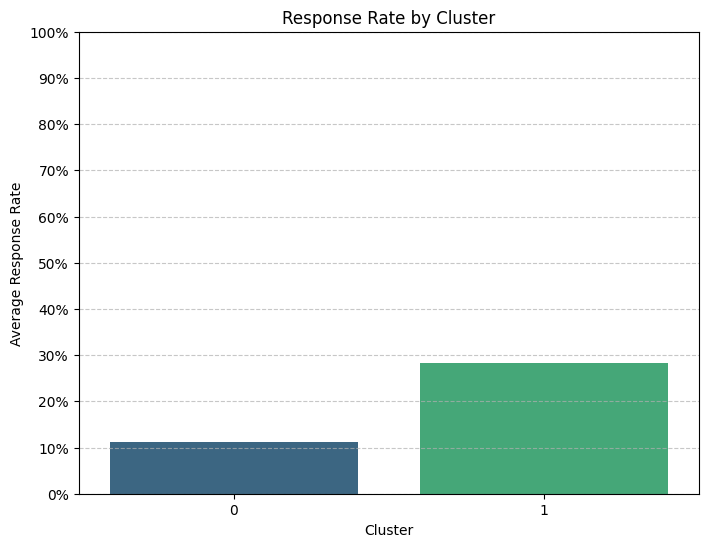

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the response rate per cluster
response_rate_per_cluster = customer_segmentation.groupby('Cluster')['Response'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='Response', data=response_rate_per_cluster, palette='viridis')
plt.title('Response Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Response Rate')
plt.ylim(0, 1) # Response rate is between 0 and 1
plt.ticklabel_format(style='plain', axis='y') # Ensure y-axis labels are not in scientific notation
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
           ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [54]:
customer_segmentation.to_csv('customer_segmentation.csv', index=False)
print("customer_segmentation.csv has been saved to your Colab environment.")

customer_segmentation.csv has been saved to your Colab environment.


In [55]:
independent_variables = [col for col in customer_segmentation.columns if col not in ['Response', 'Cluster']]
categorical_features = []
numerical_features = []

for col in independent_variables:
    if customer_segmentation[col].dtype == 'object' or customer_segmentation[col].nunique() < 10: # Assuming less than 10 unique values means categorical
        categorical_features.append(col)
    else:
        numerical_features.append(col)

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['AcceptedCmp4', 'Education_PhD', 'AcceptedCmp5', 'AcceptedCmp2', 'AcceptedCmp3', 'Marital_Status_Widow', 'Marital_Status_Divorced', 'Marital_Status_Single', 'AcceptedCmp1', 'Teenhome']
Numerical Features: ['NumCatalogPurchases', 'Engagement_Score', 'Recency', 'Customer_Tenure_in_Months', 'NumWebVisitsMonth', 'NumDealsPurchases', 'MntMeatProducts']



--- Analyzing Categorical Feature: AcceptedCmp4 ---

Overall Response Rate by AcceptedCmp4:


AcceptedCmp4   Response
0             0  12.732763
1             1  34.640523

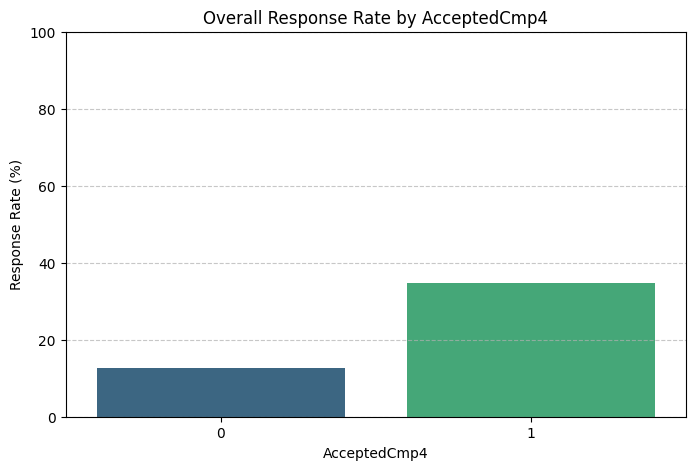

Cluster-wise Response Rate by AcceptedCmp4:


Cluster  AcceptedCmp4   Response
0        0             0  10.000000
1        0             1  27.433628
2        1             0  25.210084
3        1             1  55.000000

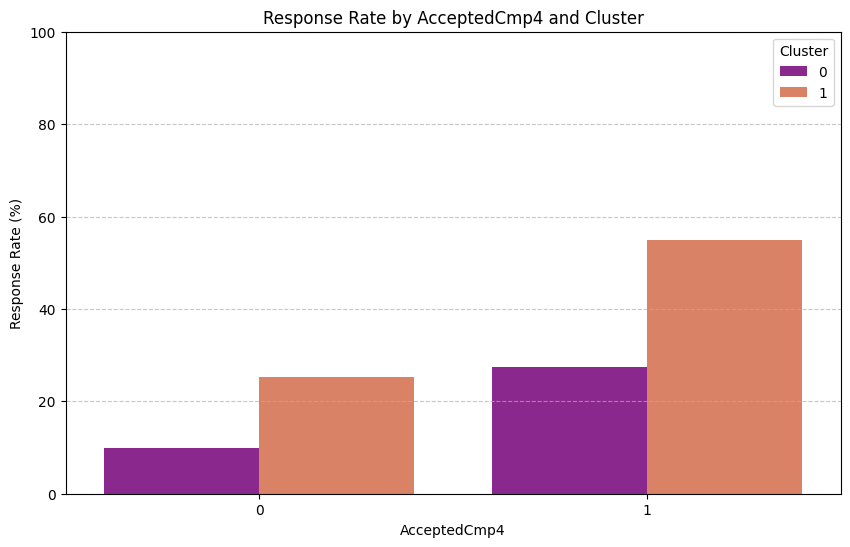


--- Analyzing Categorical Feature: Education_PhD ---

Overall Response Rate by Education_PhD:


Education_PhD   Response
0              0  12.544803
1              1  20.600858

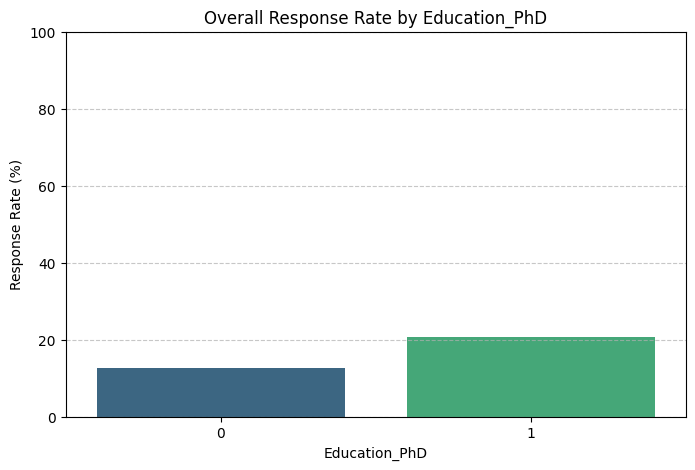

Cluster-wise Response Rate by Education_PhD:


Cluster  Education_PhD   Response
0        0              0   9.562044
1        0              1  16.890080
2        1              0  25.986842
3        1              1  35.483871

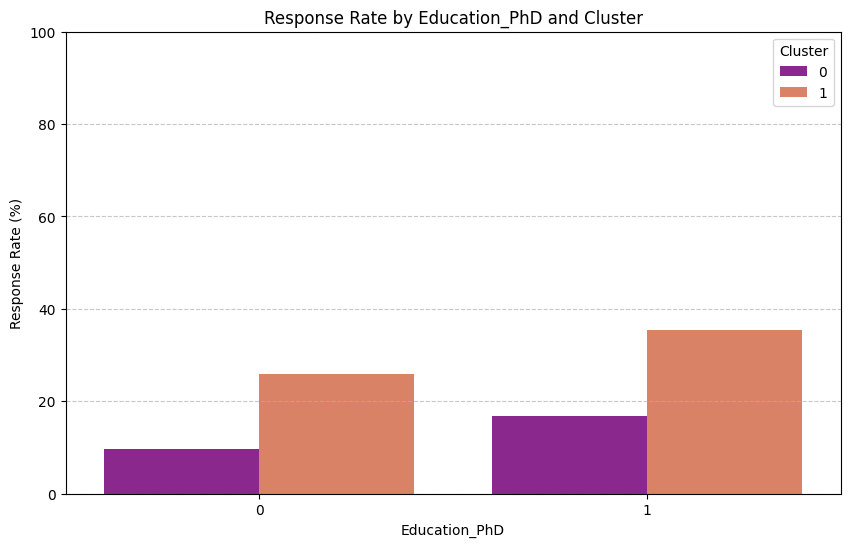


--- Analyzing Categorical Feature: AcceptedCmp5 ---

Overall Response Rate by AcceptedCmp5:


AcceptedCmp5   Response
0             0  11.600000
1             1  52.857143

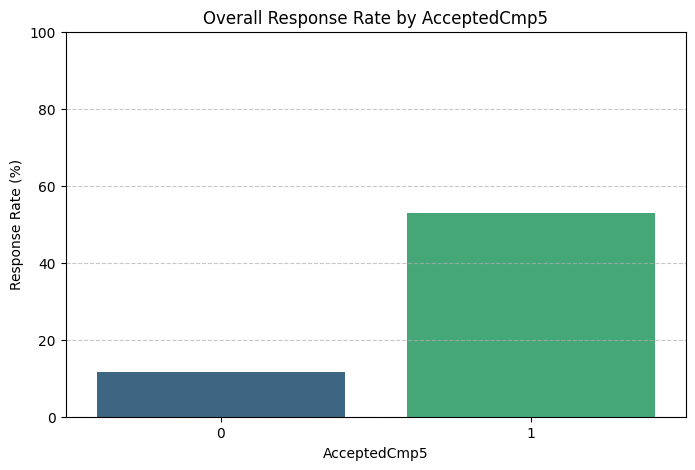

Cluster-wise Response Rate by AcceptedCmp5:


Cluster  AcceptedCmp5   Response
0        0             0  10.164512
1        0             1  51.219512
2        1             0  19.798658
3        1             1  53.535354

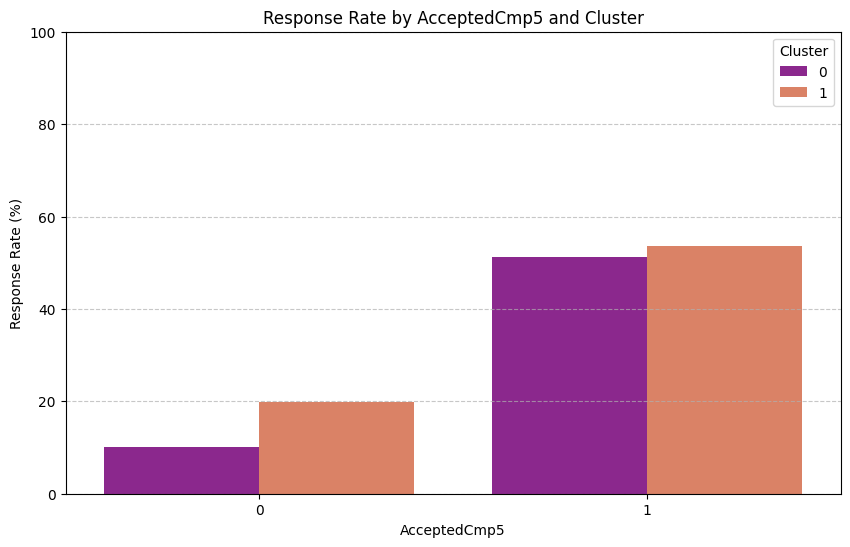


--- Analyzing Categorical Feature: AcceptedCmp2 ---

Overall Response Rate by AcceptedCmp2:


AcceptedCmp2   Response
0             0  13.752363
1             1  62.500000

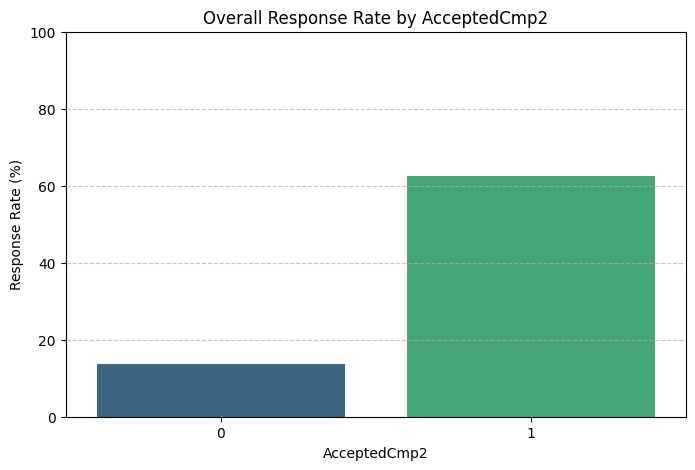

Cluster-wise Response Rate by AcceptedCmp2:


Cluster  AcceptedCmp2   Response
0        0             0  10.654314
1        0             1  62.500000
2        1             0  27.506427
3        1             1  62.500000

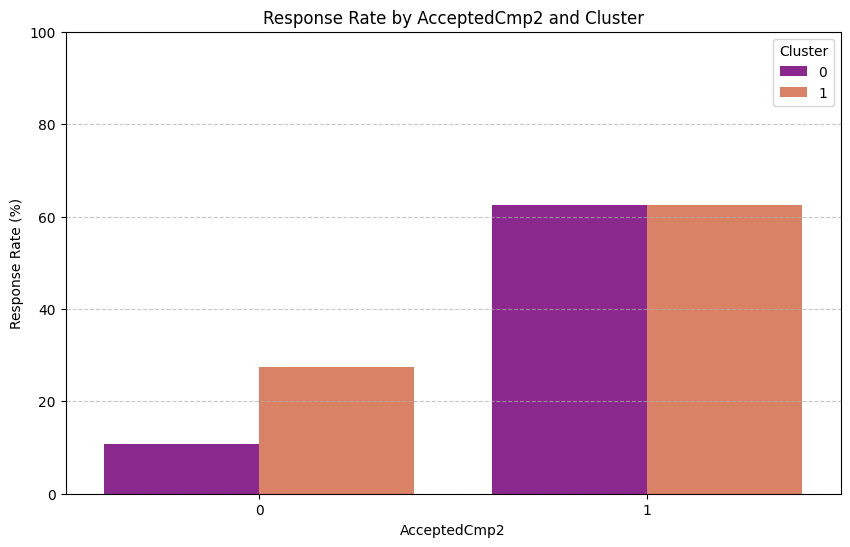


--- Analyzing Categorical Feature: AcceptedCmp3 ---

Overall Response Rate by AcceptedCmp3:


AcceptedCmp3   Response
0             0  11.776548
1             1  47.058824

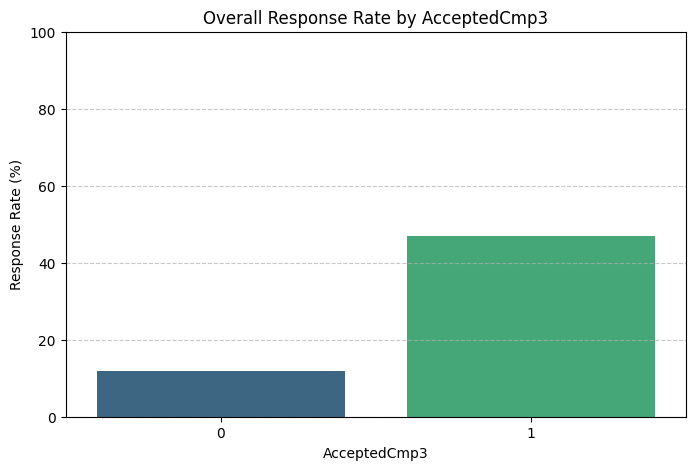

Cluster-wise Response Rate by AcceptedCmp3:


Cluster  AcceptedCmp3   Response
0        0             0   8.698334
1        0             1  43.442623
2        1             0  25.409836
3        1             1  61.290323

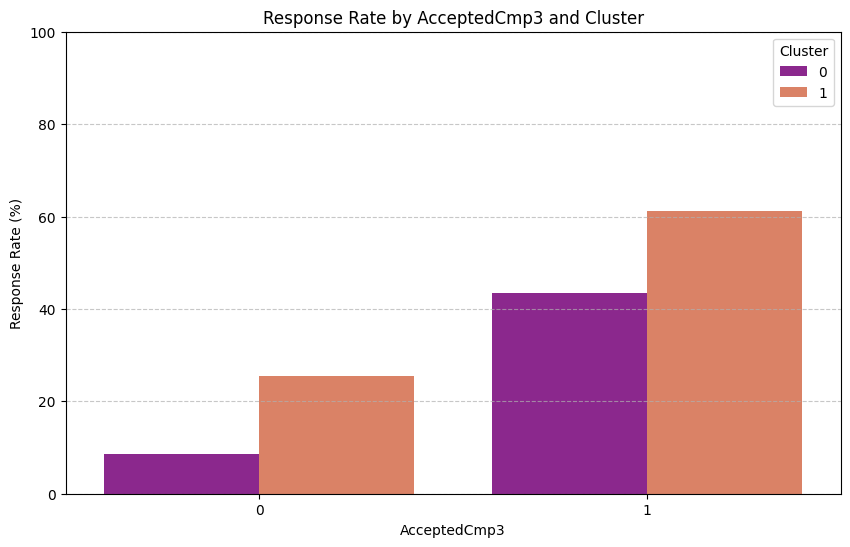


--- Analyzing Categorical Feature: Marital_Status_Widow ---

Overall Response Rate by Marital_Status_Widow:


Marital_Status_Widow   Response
0                     0  13.926499
1                     1  25.000000

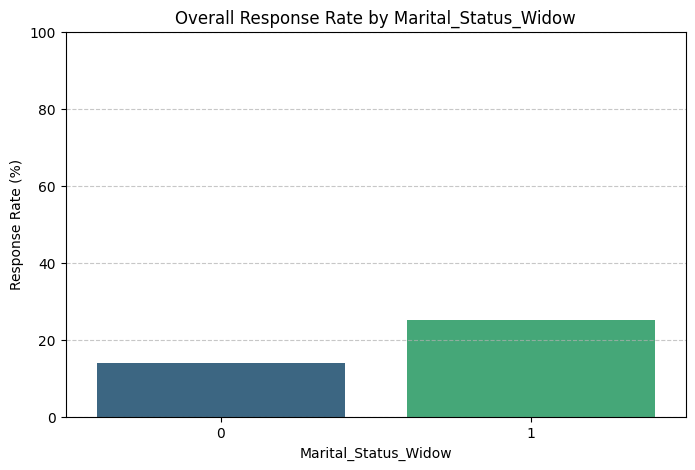

Cluster-wise Response Rate by Marital_Status_Widow:


Cluster  Marital_Status_Widow   Response
0        0                     0  10.860534
1        0                     1  18.965517
2        1                     0  27.415144
3        1                     1  50.000000

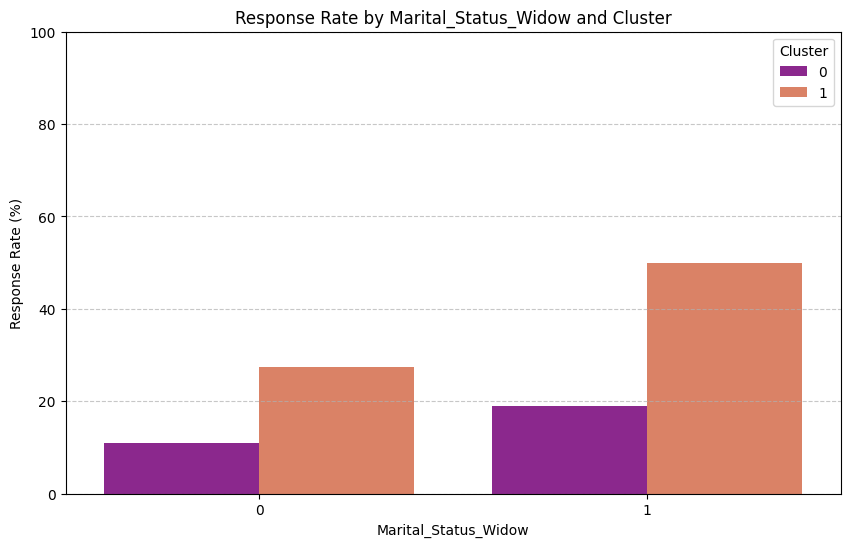


--- Analyzing Categorical Feature: Marital_Status_Divorced ---

Overall Response Rate by Marital_Status_Divorced:


Marital_Status_Divorced   Response
0                        0  13.584117
1                        1  20.353982

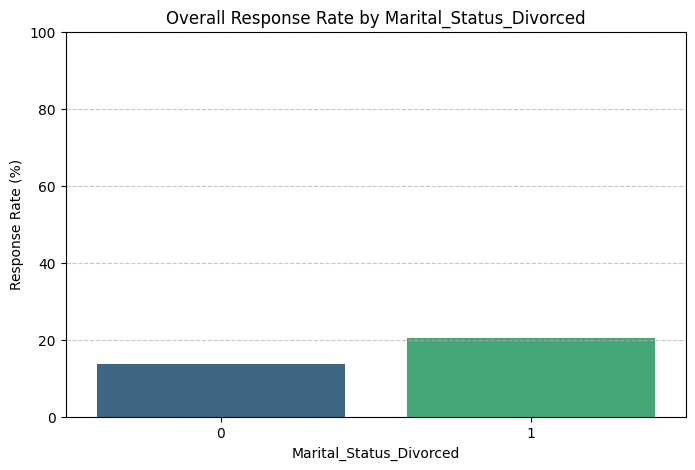

Cluster-wise Response Rate by Marital_Status_Divorced:


Cluster  Marital_Status_Divorced   Response
0        0                        0  10.803859
1        0                        1  13.829787
2        1                        0  25.626741
3        1                        1  52.631579

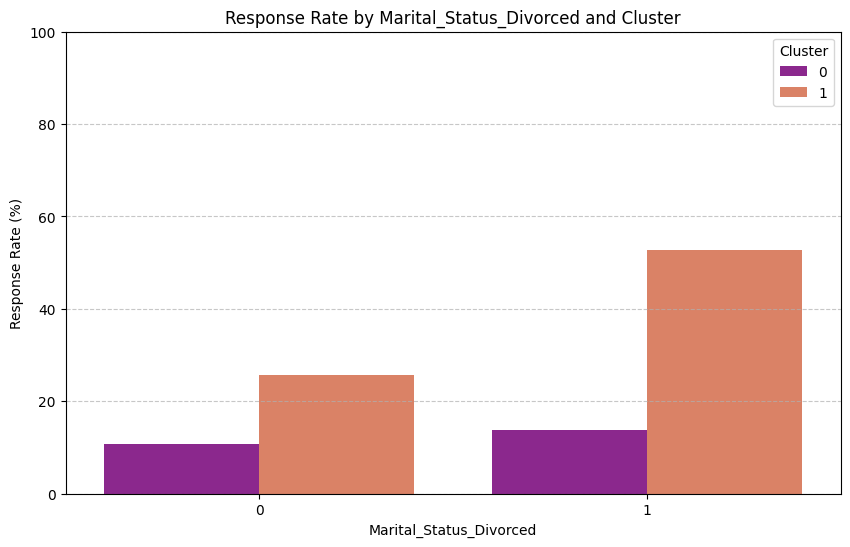


--- Analyzing Categorical Feature: Marital_Status_Single ---

Overall Response Rate by Marital_Status_Single:


Marital_Status_Single   Response
0                      0  12.455516
1                      1  21.145374

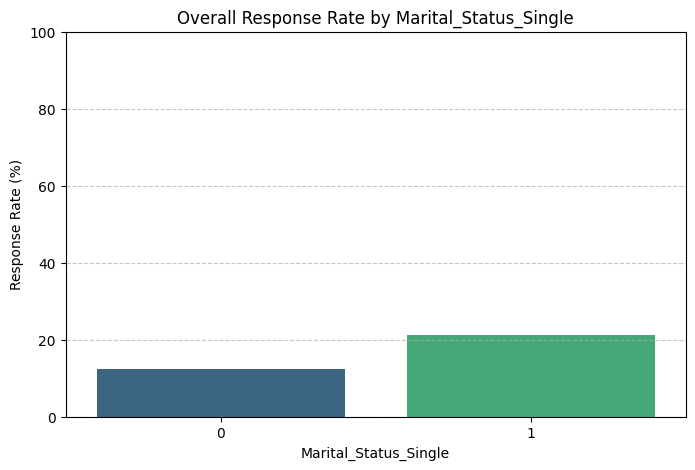

Cluster-wise Response Rate by Marital_Status_Single:


Cluster  Marital_Status_Single   Response
0        0                      0   9.754335
1        0                      1  16.434540
2        1                      0  24.834437
3        1                      1  38.947368

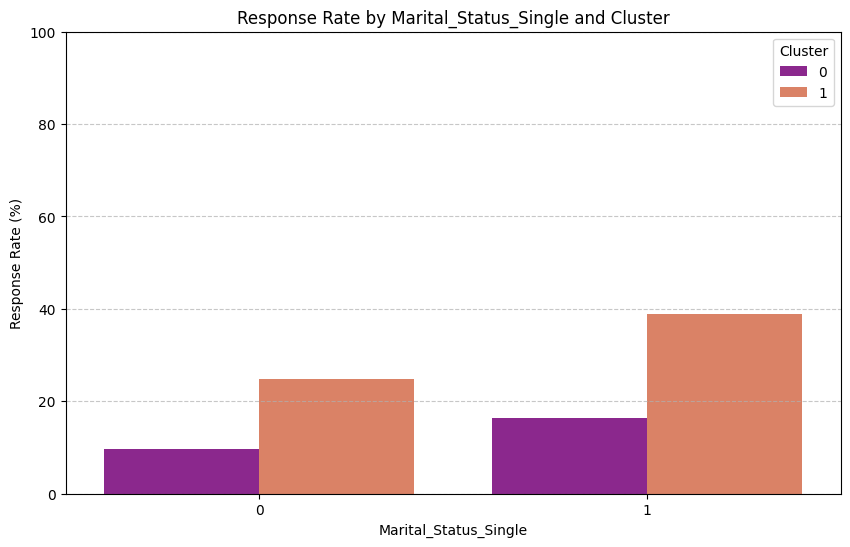


--- Analyzing Categorical Feature: AcceptedCmp1 ---

Overall Response Rate by AcceptedCmp1:


AcceptedCmp1   Response
0             0  11.773472
1             1  54.330709

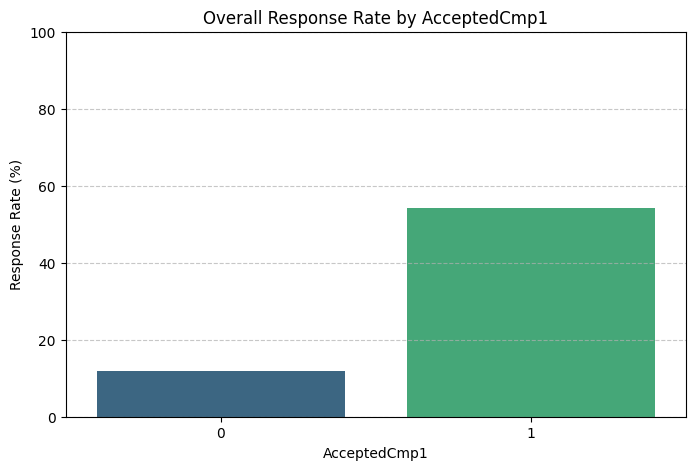

Cluster-wise Response Rate by AcceptedCmp1:


Cluster  AcceptedCmp1   Response
0        0             0  10.005886
1        0             1  54.545455
2        1             0  21.337580
3        1             1  54.216867

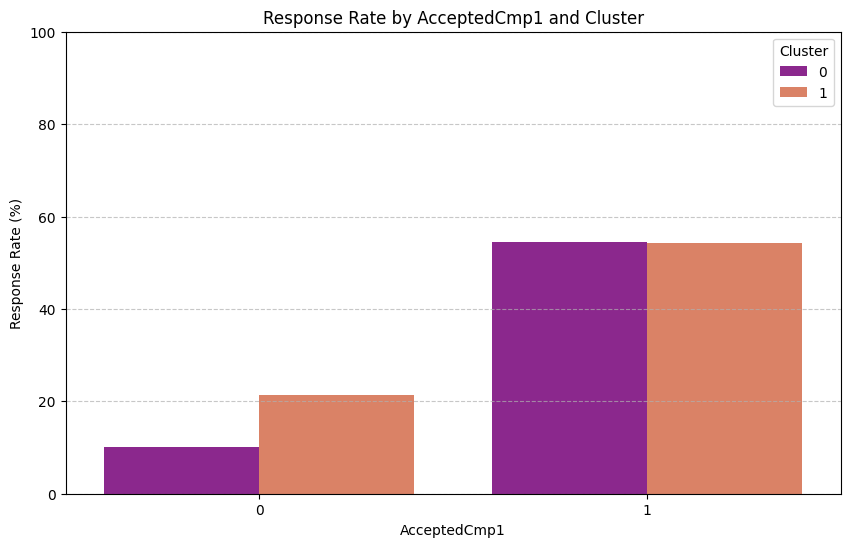


--- Analyzing Categorical Feature: Teenhome ---

Overall Response Rate by Teenhome:


Teenhome   Response
0         0  19.503220
1         1   8.964143
2         2   8.163265

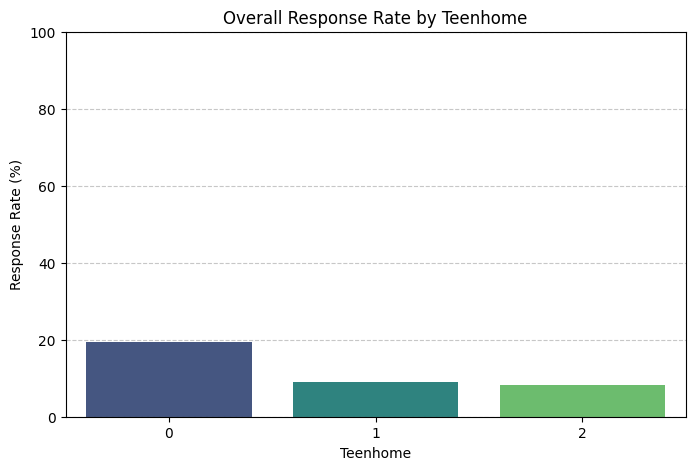

Cluster-wise Response Rate by Teenhome:


Cluster  Teenhome   Response
0        0         0  14.605263
1        0         1   8.537887
2        0         2   6.521739
3        1         0  30.886850
4        1         1  14.925373
5        1         2  33.333333

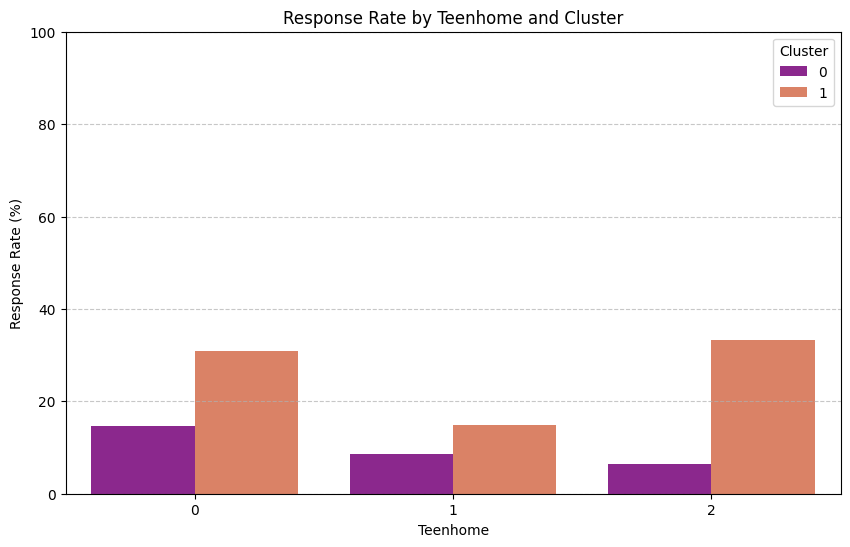

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming customer_segmentation and categorical_features are already defined

# Iterate through each feature in the categorical_features list
for feature in categorical_features:
    print(f"\n--- Analyzing Categorical Feature: {feature} ---\n")

    # a. Calculate the overall response rate
    overall_response_rate_df = customer_segmentation.groupby(feature)['Response'].mean() * 100
    overall_response_rate_df = overall_response_rate_df.reset_index()

    # b. Print a header for the overall response rate
    print(f"Overall Response Rate by {feature}:")
    # c. Display the overall_response_rate_df
    display(overall_response_rate_df)

    # d. Create a bar plot for the overall_response_rate_df
    plt.figure(figsize=(8, 5))
    sns.barplot(x=feature, y='Response', data=overall_response_rate_df, palette='viridis')
    plt.title(f'Overall Response Rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Response Rate (%)')
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # e. Calculate the cluster-wise response rate
    cluster_response_rate_df = customer_segmentation.groupby(['Cluster', feature])['Response'].mean() * 100
    cluster_response_rate_df = cluster_response_rate_df.reset_index()

    # f. Print a header for the cluster-wise response rate
    print(f"Cluster-wise Response Rate by {feature}:")
    # g. Display the cluster_response_rate_df
    display(cluster_response_rate_df)

    # h. Create a grouped bar plot for cluster_response_rate_df
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y='Response', hue='Cluster', data=cluster_response_rate_df, palette='plasma')
    plt.title(f'Response Rate by {feature} and Cluster')
    plt.xlabel(feature)
    plt.ylabel('Response Rate (%)')
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Cluster')
    plt.show()

    # i. Interpretation - will be added as a markdown block in the next step


### Interpretation for 'AcceptedCmp3'

**Overall Response Rate:**
Customers who `AcceptedCmp3` (value 1) show a significantly higher overall response rate (~47.06%) compared to those who did not (~11.78%). This indicates that Campaign 3 was effective in eliciting responses from a subset of the customer base.

**Cluster-wise Response Rate:**
* **Cluster 0:** The response rate for customers in Cluster 0 who `AcceptedCmp3` is ~43.44%, while for those who did not, it's ~8.70%. This cluster, in general, has a lower response rate, but the campaign still boosted responses significantly among those who accepted.
* **Cluster 1:** Customers in Cluster 1 who `AcceptedCmp3` have an even higher response rate of ~61.29%, compared to ~25.41% for those who did not. Cluster 1 consistently shows higher response rates for AcceptedCmp3 compared to Cluster 0, suggesting this segment is more receptive to campaigns in general and specifically to Campaign 3.

**Key Insight:** Acceptance of Campaign 3 is a strong indicator of higher response rates across both clusters, but Cluster 1 shows a greater overall predisposition to respond, including a higher baseline and a higher peak for those accepting Campaign 3.

### Interpretation for 'AcceptedCmp4'

**Overall Response Rate:**
Customers who `AcceptedCmp4` (value 1) have a higher overall response rate (~34.64%) compared to those who did not (~12.73%). This suggests Campaign 4 also contributed to customer responses.

**Cluster-wise Response Rate:**
*   **Cluster 0:** For customers in Cluster 0, accepting Campaign 4 leads to a response rate of ~27.43%, while not accepting results in ~10.00%. The increase is noticeable but still lower than the corresponding rates in Cluster 1.
*   **Cluster 1:** Customers in Cluster 1 show a stronger response when `AcceptedCmp4` (~55.00%) compared to those who did not (~25.21%). Similar to Campaign 3, Cluster 1 demonstrates higher responsiveness to Campaign 4.

**Key Insight:** Campaign 4 is effective, and its impact is more pronounced in Cluster 1. This suggests that customers in Cluster 1 are generally more engaged and receptive to campaigns, making them a more valuable target for such initiatives.

### Interpretation for 'Marital_Status_Divorced'

**Overall Response Rate:**
Customers with a `Marital_Status_Divorced` (value 1) show a slightly higher overall response rate (~20.35%) compared to those who are not divorced (~13.58%). This suggests that divorced customers might be marginally more receptive to marketing efforts, or this status correlates with other factors influencing response.

**Cluster-wise Response Rate:**
*   **Cluster 0:** Within Cluster 0, divorced customers have a response rate of ~13.83%, slightly higher than non-divorced customers at ~10.80%. The difference is not substantial, indicating marital status as 'Divorced' has a minor impact on response within this cluster.
*   **Cluster 1:** A more significant difference is observed in Cluster 1, where divorced customers have a response rate of ~52.63%, considerably higher than non-divorced customers in the same cluster at ~25.63%. This highlights a much stronger propensity to respond among divorced customers in Cluster 1.

**Key Insight:** While being divorced generally correlates with a higher response rate, this effect is much more pronounced and impactful within Cluster 1. This cluster, therefore, represents a highly responsive segment, particularly among its divorced members, suggesting tailored strategies could be very effective for this specific demographic within Cluster 1.

### Interpretation for 'Marital_Status_Widow'

**Overall Response Rate:**
Customers with a `Marital_Status_Widow` (value 1) show a higher overall response rate (~25.00%) compared to those who are not widowed (~13.93%). This indicates that widowed customers might be more receptive to marketing efforts.

**Cluster-wise Response Rate:**
*   **Cluster 0:** For customers in Cluster 0, being widowed results in a response rate of ~18.97%, which is higher than non-widowed customers at ~10.86%. This suggests a moderate impact within this cluster.
*   **Cluster 1:** Customers in Cluster 1 who are widowed have a significantly higher response rate of ~50.00%, compared to non-widowed customers in the same cluster at ~27.42%. This difference is quite substantial, indicating a strong influence of this marital status within Cluster 1.

**Key Insight:** Being widowed generally correlates with increased responsiveness to campaigns, and this trend is especially strong within Cluster 1. This segment (widowed customers in Cluster 1) represents a highly engaged group that could be effectively targeted with relevant marketing strategies.

### Interpretation for 'Teenhome'

**Overall Response Rate:**
Customers with 0 `Teenhome` (no teenagers at home) have the highest overall response rate (~19.50%). As the number of teenagers increases to 1 or 2, the response rate significantly drops (~8.96% for 1, ~8.16% for 2). This suggests that customers without teenagers are generally more responsive to campaigns.

**Cluster-wise Response Rate:**
*   **Cluster 0:** In Cluster 0, customers with 0 `Teenhome` have a response rate of ~14.61%. This rate decreases to ~8.54% for 1 `Teenhome` and further to ~6.52% for 2 `Teenhome`. This pattern mirrors the overall trend but at lower absolute rates.
*   **Cluster 1:** Customers in Cluster 1 with 0 `Teenhome` show a much higher response rate of ~30.89%. For those with 1 `Teenhome`, the rate drops to ~14.93%, and for those with 2 `Teenhome`, it's ~33.33%. The last category, while small in number, shows an interesting anomaly. This might indicate that the smaller number of data points for `Teenhome` = 2 in Cluster 1 makes the average less reliable or points to a specific sub-segment within Cluster 1 with two teenagers who are highly responsive.

**Key Insight:** The presence of teenagers generally correlates with a lower campaign response rate, particularly for customers with 1 teenager. However, customers with 0 teenagers are more responsive, and this effect is strongest in Cluster 1. The anomaly for 2 `Teenhome` in Cluster 1 might warrant further investigation to understand if there's a unique characteristic driving this high response rate or if it's due to small sample size.

### Interpretation for 'AcceptedCmp2'

**Overall Response Rate:**
Customers who `AcceptedCmp2` (value 1) exhibit a significantly higher overall response rate (~62.50%) compared to those who did not (~13.75%). This strongly suggests that Campaign 2 was highly effective for customers who accepted it.

**Cluster-wise Response Rate:**
*   **Cluster 0:** Within Cluster 0, customers who `AcceptedCmp2` have a response rate of ~62.50%, which is much higher than the ~10.65% for those who did not. This indicates a strong positive impact of accepting Campaign 2 within this cluster.
*   **Cluster 1:** Similarly, in Cluster 1, customers who `AcceptedCmp2` also have a response rate of ~62.50%, significantly higher than the ~27.51% for those who did not. While the base response rate for non-acceptors is higher in Cluster 1, the boost from accepting Campaign 2 is still very substantial.

**Key Insight:** Accepting Campaign 2 is an extremely strong predictor of a high response rate, with a consistent ~62.50% response rate across both clusters for those who accepted. This indicates a universally effective campaign for those who opted in, regardless of their cluster membership. The difference in response rate between clusters for non-acceptors highlights that Cluster 1 customers are generally more responsive even without accepting this specific campaign.

### Interpretation for 'AcceptedCmp1'

**Overall Response Rate:**
Customers who `AcceptedCmp1` (value 1) show a significantly higher overall response rate (~54.33%) compared to those who did not (~11.77%). This strongly suggests that Campaign 1 was highly effective for customers who accepted it.

**Cluster-wise Response Rate:**
*   **Cluster 0:** Within Cluster 0, customers who `AcceptedCmp1` have a response rate of ~54.55%, which is much higher than the ~10.01% for those who did not. This indicates a strong positive impact of accepting Campaign 1 within this cluster.
*   **Cluster 1:** Similarly, in Cluster 1, customers who `AcceptedCmp1` also have a high response rate of ~54.22%, significantly higher than the ~21.34% for those who did not. While the base response rate for non-acceptors is higher in Cluster 1, the boost from accepting Campaign 1 is still very substantial.

**Key Insight:** Accepting Campaign 1 is an extremely strong predictor of a high response rate, with a consistent ~54% response rate across both clusters for those who accepted. This indicates a universally effective campaign for those who opted in, regardless of their cluster membership. The difference in response rate between clusters for non-acceptors highlights that Cluster 1 customers are generally more responsive even without accepting this specific campaign, but the campaign itself drives very similar high response rates in both clusters for those who participate.

### Interpretation for 'Marital_Status_Single'

**Overall Response Rate:**
Customers with `Marital_Status_Single` (value 1) show a higher overall response rate (~21.15%) compared to those who are not single (~12.46%). This suggests that single customers might be more receptive to marketing efforts.

**Cluster-wise Response Rate:**
*   **Cluster 0:** In Cluster 0, single customers have a response rate of ~16.43%, which is higher than non-single customers at ~9.75%. This indicates a moderate impact within this cluster.
*   **Cluster 1:** Customers in Cluster 1 who are single have a higher response rate of ~38.95%, compared to non-single customers in the same cluster at ~24.83%. This difference is substantial, indicating a strong influence of this marital status within Cluster 1.

**Key Insight:** Being single generally correlates with increased responsiveness to campaigns, and this trend is especially strong within Cluster 1. This segment (single customers in Cluster 1) represents a highly engaged group that could be effectively targeted with relevant marketing strategies.

### Interpretation for 'Education_PhD'

**Overall Response Rate:**
Customers with `Education_PhD` (value 1) show a higher overall response rate (~20.60%) compared to those without a PhD (~12.54%). This suggests that customers with a PhD education might be more receptive to marketing efforts.

**Cluster-wise Response Rate:**
*   **Cluster 0:** In Cluster 0, customers with a PhD have a response rate of ~16.89%, higher than non-PhD customers at ~9.56%. This indicates a moderate impact within this cluster.
*   **Cluster 1:** Customers in Cluster 1 with a PhD have a higher response rate of ~35.48%, compared to non-PhD customers in the same cluster at ~25.99%. This difference is substantial, indicating a strong influence of education level within Cluster 1.

**Key Insight:** Holding a PhD generally correlates with increased responsiveness to campaigns, and this trend is especially strong within Cluster 1. This segment (PhD customers in Cluster 1) represents a highly engaged group that could be effectively targeted with relevant marketing strategies.

### Interpretation for 'AcceptedCmp5'

**Overall Response Rate:**
Customers who `AcceptedCmp5` (value 1) show a significantly higher overall response rate (~52.86%) compared to those who did not (~11.60%). This indicates that Campaign 5 was highly effective in eliciting responses from a subset of the customer base.

**Cluster-wise Response Rate:**
*   **Cluster 0:** The response rate for customers in Cluster 0 who `AcceptedCmp5` is ~51.22%, while for those who did not, it's ~10.16%. This cluster, in general, has a lower response rate, but the campaign still boosted responses significantly among those who accepted.
*   **Cluster 1:** Customers in Cluster 1 who `AcceptedCmp5` have a high response rate of ~53.54%, compared to ~19.80% for those who did not. Cluster 1 shows a higher baseline response rate for non-acceptors, but the impact of accepting Campaign 5 is similarly strong across both clusters.

**Key Insight:** Acceptance of Campaign 5 is a strong indicator of higher response rates across both clusters, with very similar high response rates for acceptors in both clusters. This suggests that Campaign 5 was universally effective for those who accepted it, regardless of their cluster membership. The difference between clusters is more apparent in their baseline responsiveness for those who did not accept the campaign.


--- Analyzing Numerical Feature: NumCatalogPurchases ---

Overall Response Rate by NumCatalogPurchases Bin:


NumCatalogPurchases_bin   Response
0                        0   9.803922
1                        1  15.056818
2                        2  26.623377

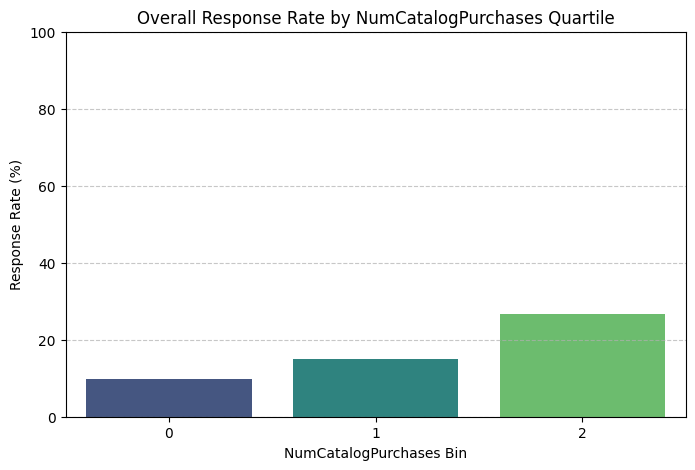

Cluster-wise Response Rate by NumCatalogPurchases Bin:


Cluster  NumCatalogPurchases_bin   Response
0        0                        0   9.549274
1        0                        1  12.451362
2        0                        2  20.903955
3        1                        0  29.411765
4        1                        1  22.105263
5        1                        2  30.175439

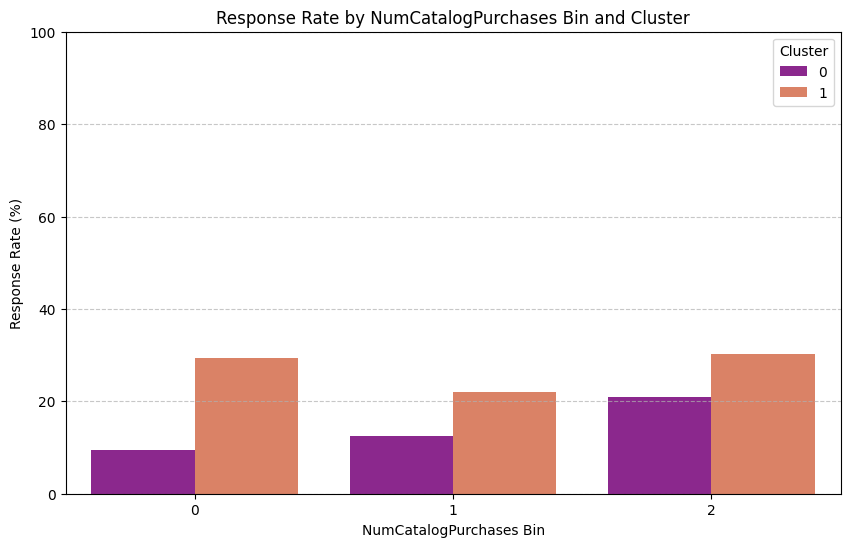


--- Analyzing Numerical Feature: Engagement_Score ---

Overall Response Rate by Engagement_Score Bin:


Engagement_Score_bin   Response
0                     0  12.538700
1                     1  11.778291
2                     2  17.361111
3                     3  15.257732

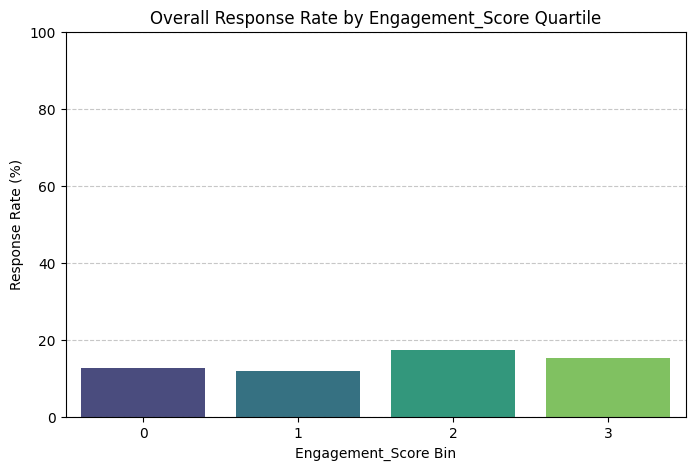

Cluster-wise Response Rate by Engagement_Score Bin:


Cluster  Engagement_Score_bin   Response
0        0                     0   9.026549
1        0                     1   9.424084
2        0                     2  13.968958
3        0                     3  12.753623
4        1                     0  37.037037
5        1                     1  29.411765
6        1                     2  29.600000
7        1                     3  21.428571

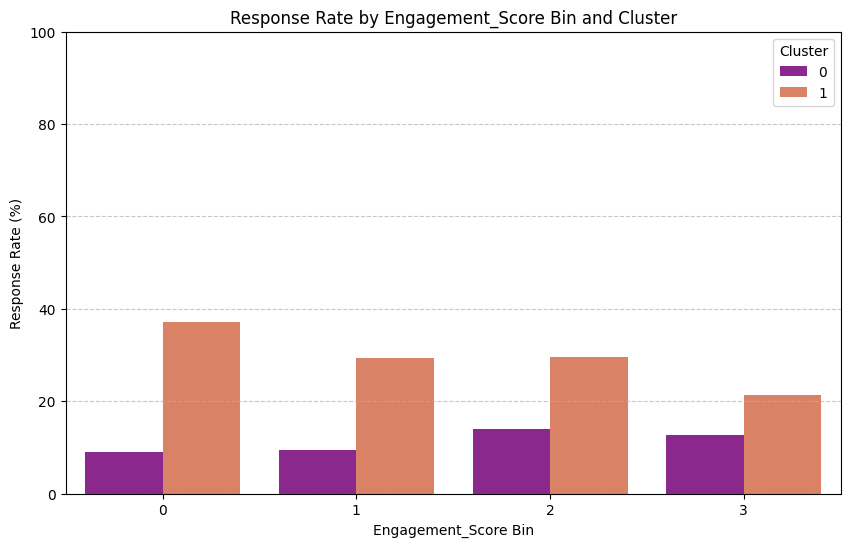


--- Analyzing Numerical Feature: Recency ---

Overall Response Rate by Recency Bin:


Recency_bin   Response
0            0  25.836431
1            1  13.696060
2            2  10.204082
3            3   7.358491

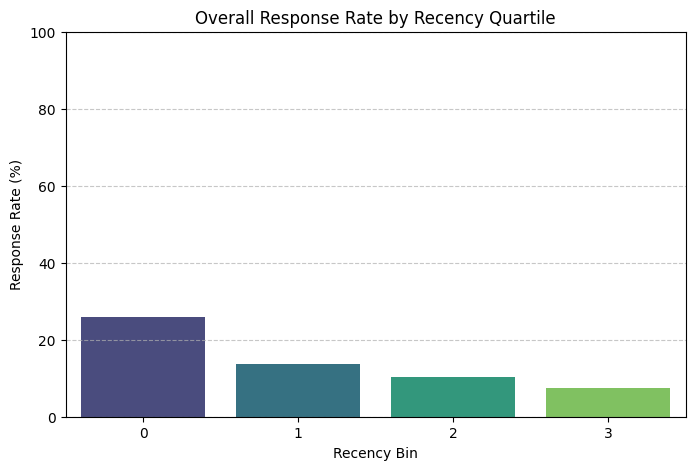

Cluster-wise Response Rate by Recency Bin:


Cluster  Recency_bin   Response
0        0            0  21.700224
1        0            1   9.728507
2        0            2   6.651376
3        0            3   5.980861
4        1            0  46.153846
5        1            1  32.967033
6        1            2  25.242718
7        1            3  12.500000

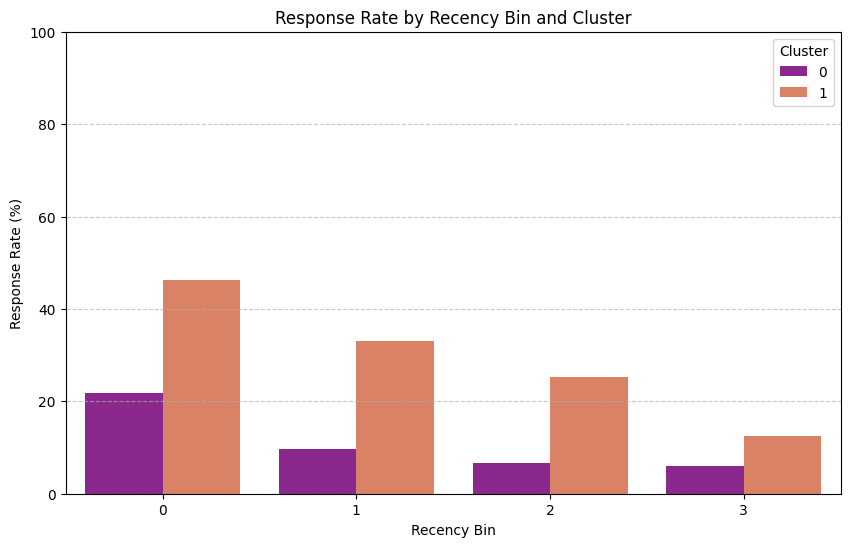


--- Analyzing Numerical Feature: Customer_Tenure_in_Months ---

Overall Response Rate by Customer_Tenure_in_Months Bin:


Customer_Tenure_in_Months_bin   Response
0                              0  12.923977
1                              1  19.767442

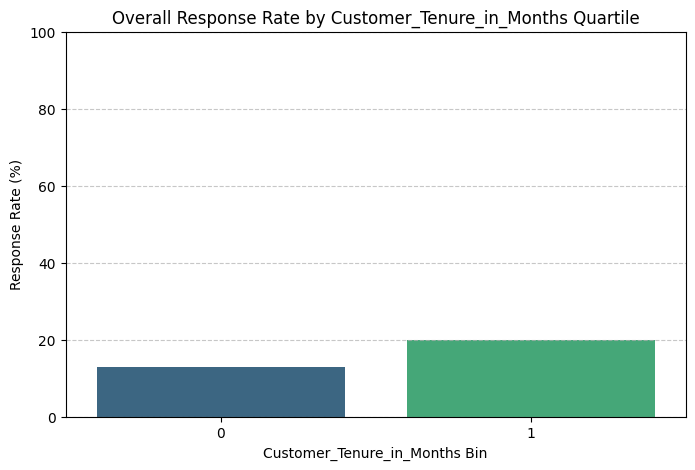

Cluster-wise Response Rate by Customer_Tenure_in_Months Bin:


Cluster  Customer_Tenure_in_Months_bin   Response
0        0                              0  10.085837
1        0                              1  15.362319
2        1                              0  25.641026
3        1                              1  37.647059

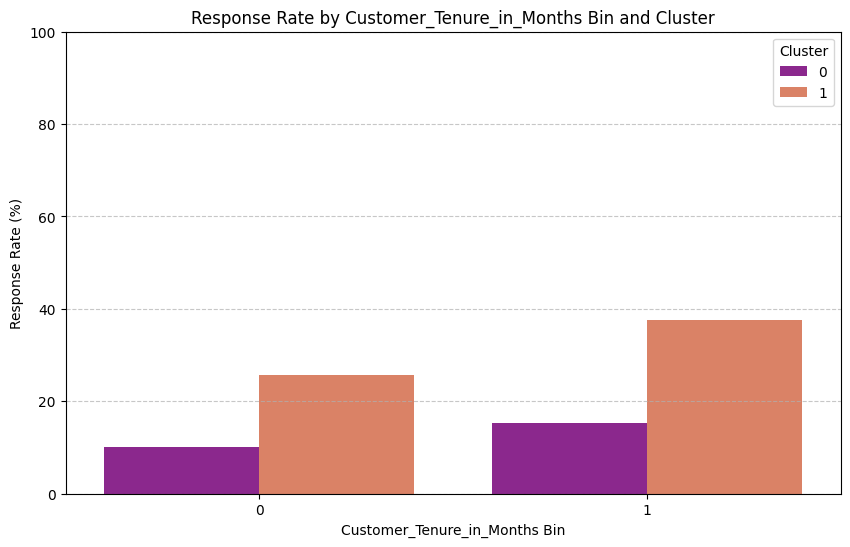


--- Analyzing Numerical Feature: NumWebVisitsMonth ---

Overall Response Rate by NumWebVisitsMonth Bin:


NumWebVisitsMonth_bin   Response
0                      0  15.109890
1                      1  10.981697
2                      2  11.538462
3                      3  20.190024

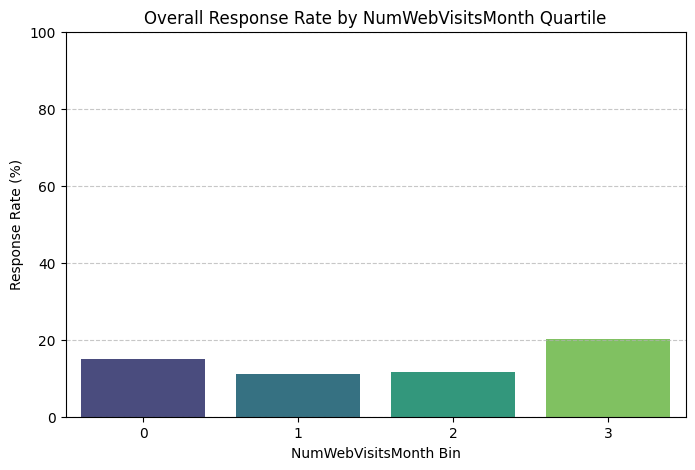

Cluster-wise Response Rate by NumWebVisitsMonth Bin:


Cluster  NumWebVisitsMonth_bin   Response
0        0                      0   5.418719
1        0                      1   9.532374
2        0                      2  10.723861
3        0                      3  19.362745
4        1                      0  27.329193
5        1                      1  28.888889
6        1                      2  29.411765
7        1                      3  46.153846

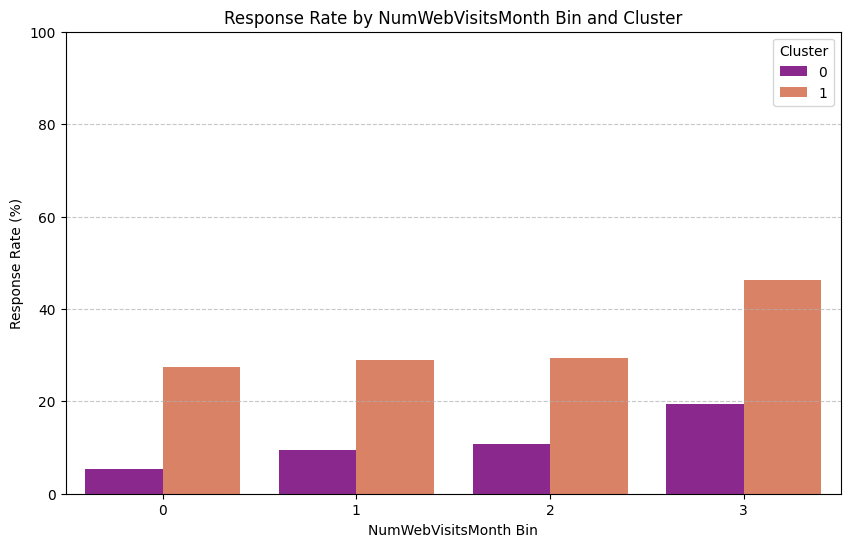


--- Analyzing Numerical Feature: NumDealsPurchases ---

Overall Response Rate by NumDealsPurchases Bin:


NumDealsPurchases_bin   Response
0                      0  16.156283
1                      1   9.445585
2                      2  12.627986
3                      3  16.949153

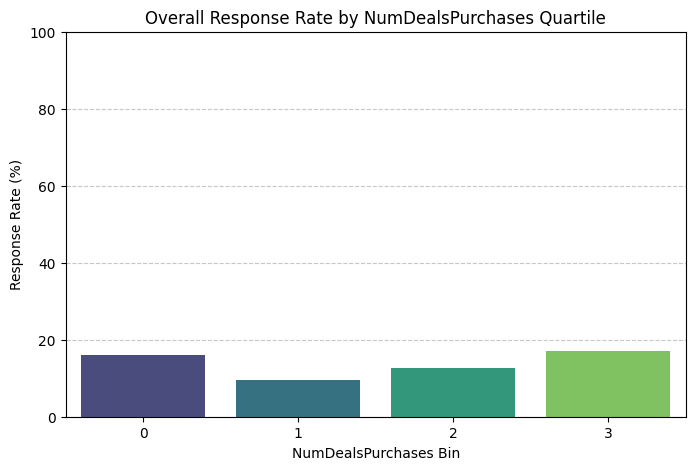

Cluster-wise Response Rate by NumDealsPurchases Bin:


Cluster  NumDealsPurchases_bin   Response
0        0                      0   8.752026
1        0                      1   9.267241
2        0                      2  11.940299
3        0                      3  16.497462
4        1                      0  30.000000
5        1                      1  13.043478
6        1                      2  20.000000
7        1                      3  26.315789

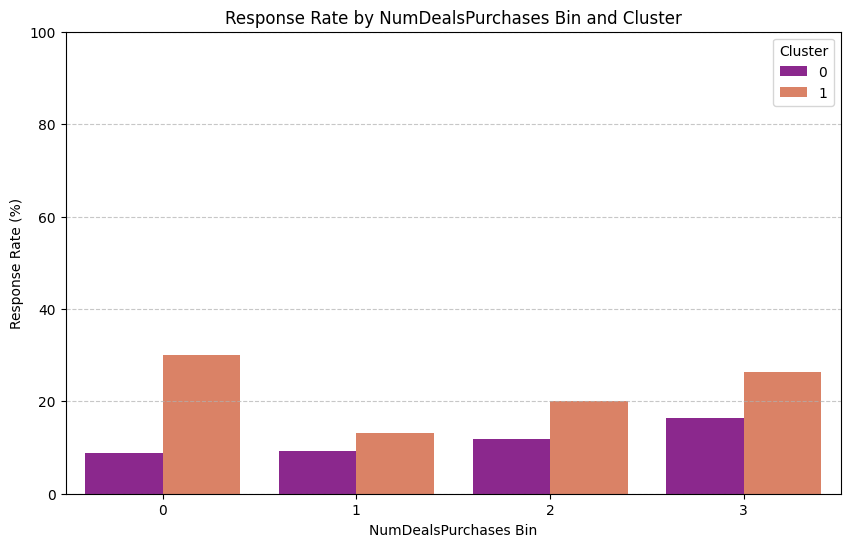


--- Analyzing Numerical Feature: MntMeatProducts ---

Overall Response Rate by MntMeatProducts Bin:


MntMeatProducts_bin   Response
0                    0   5.762082
1                    1  13.518519
2                    2  12.149533
3                    3  25.996205

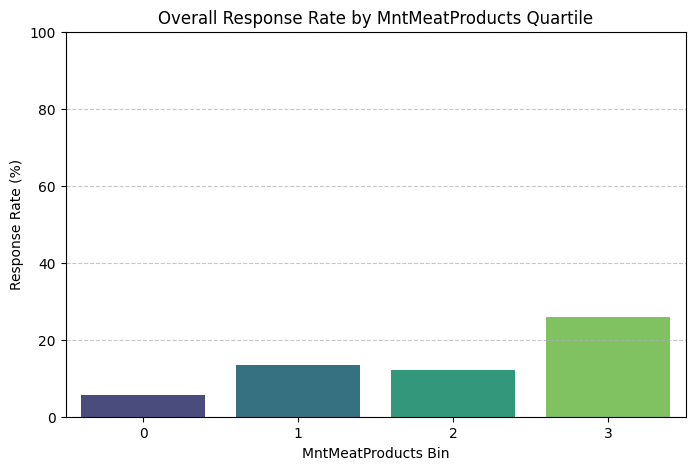

Cluster-wise Response Rate by MntMeatProducts Bin:


Cluster  MntMeatProducts_bin   Response
0        0                    0   5.762082
1        0                    1  13.518519
2        0                    2  12.149533
3        0                    3  19.230769
4        1                    3  28.211587

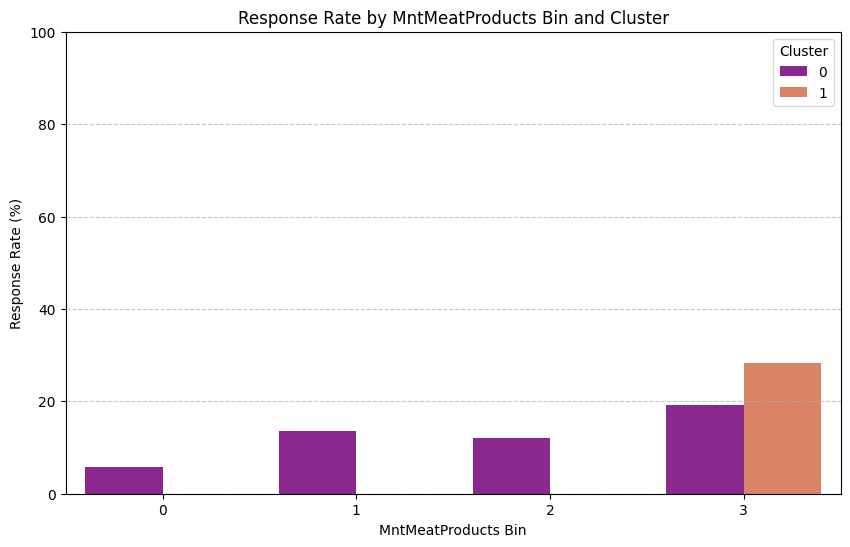

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming customer_segmentation and numerical_features are already defined

# Iterate through each feature in the numerical_features list
for feature in numerical_features:
    print(f"\n--- Analyzing Numerical Feature: {feature} ---\n")

    # 2. Create 4 bins (quartiles) for the numerical feature
    # Handle cases with few unique values by using 'duplicates="drop"'
    try:
        customer_segmentation[f'{feature}_bin'] = pd.qcut(customer_segmentation[feature], q=4, labels=False, duplicates='drop')
    except ValueError as e:
        print(f"Warning: Could not create 4 quartiles for {feature}. {e}. Attempting 2 bins instead.")
        # Fallback to fewer bins if 4 quartiles are not possible
        try:
            customer_segmentation[f'{feature}_bin'] = pd.qcut(customer_segmentation[feature], q=2, labels=False, duplicates='drop')
            print(f"Successfully created 2 bins for {feature}.")
        except ValueError as e_2:
            print(f"Error: Could not create 2 bins for {feature} either. Skipping feature. {e_2}")
            continue # Skip to the next feature if binning fails

    # 3. Calculate the overall response rate (percentage of Response = 1) for each bin
    overall_response_rate_df = customer_segmentation.groupby(f'{feature}_bin')['Response'].mean() * 100
    overall_response_rate_df = overall_response_rate_df.reset_index()

    print(f"Overall Response Rate by {feature} Bin:")
    display(overall_response_rate_df)

    # 4. Create a bar plot for the overall response rates by bin
    plt.figure(figsize=(8, 5))
    sns.barplot(x=f'{feature}_bin', y='Response', data=overall_response_rate_df, palette='viridis')
    plt.title(f'Overall Response Rate by {feature} Quartile')
    plt.xlabel(f'{feature} Bin')
    plt.ylabel('Response Rate (%)')
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # 5. Calculate the cluster-wise response rate for each bin
    cluster_response_rate_df = customer_segmentation.groupby(['Cluster', f'{feature}_bin'])['Response'].mean() * 100
    cluster_response_rate_df = cluster_response_rate_df.reset_index()

    print(f"Cluster-wise Response Rate by {feature} Bin:")
    display(cluster_response_rate_df)

    # 6. Create a grouped bar plot for cluster-wise response rates
    plt.figure(figsize=(10, 6))
    sns.barplot(x=f'{feature}_bin', y='Response', hue='Cluster', data=cluster_response_rate_df, palette='plasma')
    plt.title(f'Response Rate by {feature} Bin and Cluster')
    plt.xlabel(f'{feature} Bin')
    plt.ylabel('Response Rate (%)')
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Cluster')
    plt.show()


### Interpretation for 'Recency'

**Overall Response Rate:**
As 'Recency' (number of days since last purchase) increases, the overall response rate generally decreases. The bin with the lowest recency (Bin 0, most recent purchases) has the highest response rate (~25.84%), while the bin with the highest recency (Bin 3, least recent purchases) has the lowest response rate (~7.36%). This indicates that customers who have made a recent purchase are more likely to respond to campaigns.

**Cluster-wise Response Rate:**
*   **Cluster 0:** This cluster shows a similar trend to the overall response rate, with a decrease in response rate as recency increases. Bin 0 has a response rate of ~21.70%, decreasing to ~5.98% for Bin 3. Cluster 0 generally exhibits lower response rates across all recency bins compared to Cluster 1.
*   **Cluster 1:** This cluster consistently demonstrates higher response rates across all recency bins compared to Cluster 0. Bin 0 in Cluster 1 has a significantly high response rate of ~46.15%, which gradually decreases to ~12.50% for Bin 3. Even with high recency, Cluster 1 customers show a better response rate than the most recent customers in Cluster 0.

**Key Insight:** Recency is a strong indicator of campaign responsiveness. Customers with more recent purchases are generally more likely to respond. Cluster 1 customers are significantly more responsive across all recency levels than Cluster 0 customers, making them a more valuable target segment, especially those with low recency.

### Interpretation for 'NumWebVisitsMonth'

**Overall Response Rate:**
The relationship between `NumWebVisitsMonth` and overall response rate is not strictly linear. Bin 0 (lowest number of web visits) shows a response rate of ~15.11%. Bin 1 and Bin 2 have slightly lower rates (~10.98% and ~11.54% respectively). However, Bin 3 (highest number of web visits) shows the highest overall response rate at ~20.19%. This suggests that while very low activity might be associated with a decent response, a higher level of web engagement (Bin 3) is more strongly correlated with campaign response.

**Cluster-wise Response Rate:**
*   **Cluster 0:** In Cluster 0, the response rate generally increases with `NumWebVisitsMonth`. Bin 0 has a very low response rate of ~5.42%, which then increases to ~9.53% for Bin 1, ~10.72% for Bin 2, and peaks at ~19.36% for Bin 3. This indicates that within Cluster 0, higher web engagement is strongly associated with higher campaign responsiveness.
*   **Cluster 1:** This cluster shows consistently higher response rates across all bins compared to Cluster 0. Bin 0 in Cluster 1 starts at ~27.33%, Bin 1 is ~28.89%, Bin 2 is ~29.41%, and Bin 3 reaches a very high ~46.15%. This suggests that Cluster 1 customers are generally more responsive, and a higher number of web visits in this cluster amplifies that responsiveness significantly.

**Key Insight:** For both clusters, a higher number of web visits (especially in Bin 3) tends to correlate with a higher response rate. Cluster 1 consistently outperforms Cluster 0 in terms of response rates across all levels of web visits, highlighting that high web engagement in Cluster 1 represents the most responsive segment.

### Interpretation for 'MntMeatProducts'

**Overall Response Rate:**
There is a clear positive correlation between `MntMeatProducts` (amount spent on meat products) and the overall response rate. Bin 0 (lowest spending) has a response rate of only ~5.76%. This rate generally increases with each bin, with Bin 3 (highest spending) reaching ~25.99%. This indicates that customers who spend more on meat products are significantly more likely to respond to campaigns.

**Cluster-wise Response Rate:**
*   **Cluster 0:** This cluster shows a similar trend, with response rates increasing as `MntMeatProducts` increases. Bin 0 has ~5.76%, Bin 1 has ~13.52%, Bin 2 has ~12.15%, and Bin 3 has ~19.23%. It's notable that the response rate for Bin 2 is slightly lower than Bin 1 in Cluster 0, which might be an interesting anomaly or due to data distribution within that specific bin.
*   **Cluster 1:** For `MntMeatProducts`, only Bin 3 is available for Cluster 1, indicating that this cluster predominantly consists of high spenders on meat products. Bin 3 in Cluster 1 shows a very high response rate of ~28.21%. This suggests that high spenders in Cluster 1 are highly responsive.

**Key Insight:** Spending on meat products is a strong predictor of campaign responsiveness, with higher spending correlating with higher response rates. Cluster 1 is characterized by higher spending on meat products and shows a significantly higher response rate within that high-spending segment compared to Cluster 0, making them a prime target for marketing efforts.

### Interpretation for 'Engagement_Score'

**Overall Response Rate:**
The overall response rate for `Engagement_Score` shows some variability. Bin 0 (lowest engagement) has a response rate of ~12.54%, Bin 1 is slightly lower at ~11.78%. Bin 2 sees an increase to ~17.36%, while Bin 3 (highest engagement) shows ~15.26%. This pattern suggests that while moderate to high engagement (Bin 2 and 3) generally leads to better response rates, the highest engagement doesn't always guarantee the highest response, indicating a non-linear relationship or perhaps that the highest engagement might include very selective customers.

**Cluster-wise Response Rate:**
*   **Cluster 0:** In Cluster 0, the response rate shows a modest increase from Bin 0 (~9.03%) to Bin 2 (~13.97%), but then slightly drops for Bin 3 (~12.75%). This suggests that for Cluster 0, moderate engagement is more effective than the highest level of engagement for campaign response.
*   **Cluster 1:** This cluster demonstrates significantly higher response rates across all engagement score bins compared to Cluster 0. Bin 0 starts at a high ~37.04%, but then decreases for Bin 1 (~29.41%), Bin 2 (~29.60%), and Bin 3 (~21.43%). This inverse relationship within Cluster 1 is interesting: customers with lower engagement scores in this cluster seem to be more responsive to campaigns. This could imply that for highly responsive segments like Cluster 1, even lower engagement still translates to strong response, or that very high engagement already means they are active and perhaps less influenced by a specific campaign.

**Key Insight:** The relationship between `Engagement_Score` and response rate is complex and varies by cluster. For Cluster 0, moderate engagement appears most effective. For Cluster 1, customers with lower engagement scores (Bin 0 and 1) show higher response rates, which could be an artifact of their overall higher responsiveness, or indicate that these customers are easily swayed by campaigns whereas highly engaged customers in this cluster might be more discerning or already satisfied.

### Interpretation for 'NumDealsPurchases'

**Overall Response Rate:**
The overall response rate for `NumDealsPurchases` (number of purchases made with a discount) shows a varied pattern. Bin 0 (lowest number of deal purchases) has a response rate of ~16.16%. Bin 1 shows a dip to ~9.45%, while Bin 2 increases slightly to ~12.63%. Bin 3 (highest number of deal purchases) has the highest response rate at ~16.95%. This suggests that customers who engage minimally or highly with deals tend to be more responsive overall, while those in the middle (Bin 1) are less so.

**Cluster-wise Response Rate:**
*   **Cluster 0:** In Cluster 0, the response rate for `NumDealsPurchases` follows a similar overall trend: Bin 0 at ~8.75%, Bin 1 at ~9.27%, Bin 2 at ~11.94%, and Bin 3 peaking at ~16.50%. This shows a general increase in responsiveness with more deal purchases within this cluster, except for a slight dip in Bin 1.
*   **Cluster 1:** This cluster shows significantly higher response rates across all bins compared to Cluster 0. Bin 0 in Cluster 1 starts very high at ~30.00%. Bin 1 drops to ~13.04%, Bin 2 increases to ~20.00%, and Bin 3 reaches ~26.32%. Similar to Cluster 0, Bin 1 for Cluster 1 shows a notable decrease in response, suggesting that a moderate number of deal purchases might indicate less general responsiveness, even for this high-response cluster.

**Key Insight:** Both clusters show that very low and very high numbers of deal purchases correlate with higher response rates, with an interesting dip for moderate numbers of deal purchases (Bin 1). Cluster 1 is consistently more responsive than Cluster 0 across all `NumDealsPurchases` bins. Strategically, targeting customers in Bin 0 and Bin 3 for both clusters, but especially in Cluster 1, appears most effective. Further investigation into the characteristics of Bin 1 customers might reveal why they are less responsive.

### Interpretation for 'NumCatalogPurchases'

**Overall Response Rate:**
There is a positive correlation between `NumCatalogPurchases` (number of purchases made through a catalog) and the overall response rate. Bin 0 (lowest catalog purchases) has a response rate of ~9.80%. This rate generally increases with higher bins, reaching ~15.06% for Bin 1 and a significantly higher ~26.62% for Bin 2. This suggests that customers who make more purchases via catalog are more likely to respond to campaigns.

**Cluster-wise Response Rate:**
*   **Cluster 0:** In Cluster 0, the response rate increases with `NumCatalogPurchases`. Bin 0 has a response rate of ~9.55%, Bin 1 is ~12.45%, and Bin 2 is ~20.90%. This indicates that higher catalog purchasing activity is associated with increased campaign responsiveness within this cluster.
*   **Cluster 1:** This cluster shows significantly higher response rates across all bins compared to Cluster 0. Bin 0 starts at ~29.41%, Bin 1 drops slightly to ~22.11%, and Bin 2 increases to ~30.18%. The dip in Bin 1 for Cluster 1 is notable, but overall, customers in Cluster 1 who engage with catalog purchases show high responsiveness.

**Key Insight:** Higher `NumCatalogPurchases` is a strong indicator of increased campaign responsiveness, both overall and within each cluster. Cluster 1 consistently exhibits higher response rates than Cluster 0 for all levels of catalog purchases, reinforcing its status as a more receptive segment. The highest responsiveness is observed in customers with the most catalog purchases, especially within Cluster 1.

### Interpretation for 'Customer_Tenure_in_Months'

**Overall Response Rate:**
There is a positive correlation between `Customer_Tenure_in_Months` and the overall response rate. Bin 0 (customers with shorter tenure) has a response rate of ~12.92%, while Bin 1 (customers with longer tenure) shows a higher response rate of ~19.77%. This indicates that customers who have been with the company for a longer period are generally more responsive to campaigns.

**Cluster-wise Response Rate:**
*   **Cluster 0:** In Cluster 0, customers with shorter tenure (Bin 0) have a response rate of ~10.09%, which increases to ~15.36% for those with longer tenure (Bin 1). This shows that even within the less responsive Cluster 0, tenure has a positive impact on the response rate.
*   **Cluster 1:** This cluster demonstrates significantly higher response rates across both tenure bins compared to Cluster 0. Customers with shorter tenure (Bin 0) in Cluster 1 have a response rate of ~25.64%, which further increases to a very high ~37.65% for those with longer tenure (Bin 1). This highlights that longer tenure in Cluster 1 is a strong indicator of high responsiveness.

**Key Insight:** Customer tenure is a significant factor in campaign responsiveness. Longer tenure consistently correlates with higher response rates across both clusters. Cluster 1, especially its long-tenure customers, represents the most responsive segment, making them a prime target for sustained marketing efforts. These customers have likely built a stronger relationship with the company over time, leading to greater engagement.

## Summary:

### Data Analysis Key Findings

*   **Impact of Campaign Acceptance**: Acceptance of any previous campaign (AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5) is a strong predictor of response, with response rates for acceptors consistently ranging from approximately 47% to 62.5% across different campaigns and clusters. Specifically, `AcceptedCmp2` showed a ~62.5% response rate for acceptors in both clusters, and `AcceptedCmp1` showed ~54% in both.
*   **Marital Status Influence**: Customers who are divorced (\~20.35%), widowed (\~25.00%), or single (\~21.15%) generally exhibit higher overall response rates compared to their non-corresponding counterparts. This effect is significantly more pronounced within `Cluster 1`, where response rates for these groups can be substantially higher (e.g., divorced customers in Cluster 1 have ~52.63% response rate).
*   **Presence of Teenagers**: Customers with no teenagers at home (`Teenhome` = 0) have a higher overall response rate of \~19.50%. This rate decreases significantly for customers with one or two teenagers (\~8.96% for 1, \~8.16% for 2). This trend holds true for both clusters, with Cluster 1 maintaining higher absolute response rates.
*   **Education Level**: Customers with a PhD (`Education_PhD` = 1) show a higher overall response rate of \~20.60% compared to non-PhD holders (\~12.54%). Similar to marital status, this positive correlation is stronger within `Cluster 1`.
*   **Recency of Purchase**: Customers with more recent purchases (lowest `Recency` bin) are significantly more likely to respond, with an overall rate of \~25.84%. This responsiveness declines with increasing recency, reaching \~7.36% for the least recent bin. `Cluster 1` shows particularly high responsiveness among recent purchasers, with a \~46.15% response rate in the lowest `Recency` bin.
*   **Web Engagement**: While not strictly linear, customers with the highest number of monthly web visits (`NumWebVisitsMonth` - Bin 3) show a higher overall response rate of \~20.19%. In `Cluster 1`, high web engagement is strongly correlated with a high response rate, reaching \~46.15% for the highest web visit bin.
*   **Spending on Meat Products**: There is a clear positive correlation between `MntMeatProducts` and response rate, with the highest spending bin showing an overall response rate of \~25.99%. `Cluster 1` predominantly comprises high spenders on meat products, demonstrating a very high response rate of \~28.21% within this segment.
*   **Customer Tenure**: Longer customer tenure (`Customer_Tenure_in_Months` - Bin 1) correlates with a higher overall response rate (\~19.77% vs. \~12.92% for shorter tenure). This relationship is particularly strong in `Cluster 1`, where long-tenure customers have a very high response rate of \~37.65%.
*   **Cluster Differences**: `Cluster 1` consistently demonstrates higher response rates across almost all categorical and numerical variables compared to `Cluster 0`. This indicates that `Cluster 1` represents a more engaged and responsive customer segment overall.

### Insights or Next Steps

*   **Prioritize Cluster 1 with Specific Campaigns**: Given `Cluster 1`'s consistently higher responsiveness, especially among those with longer tenure, higher spending on meat products, and recent purchases, marketing efforts should strategically prioritize this segment. Campaigns similar to those previously accepted (Cmp1, Cmp2, Cmp5) are particularly effective within this cluster.
*   **Tailor Messaging for Demographic Segments**: Marital status (Divorced, Widow, Single) and education level (PhD) are strong positive indicators of response, particularly within `Cluster 1`. Campaigns could be specifically tailored to resonate with these demographic groups, highlighting relevant product benefits or offers.


## Customer Profiles and Tailored Marketing Strategies

Based on the in-depth analysis and the 2-cluster segmentation, we can define two distinct customer profiles, each requiring a unique marketing approach:

### **Customer Profile 1: "Value-Conscious Web Browsers" (Cluster 0)**
*   **Key Characteristics:**
    *   **Size:** Largest segment (approx. 81.4% of customer base).
    *   **Spending:** Lower overall spending, especially on `MntMeatProducts` and `NumCatalogPurchases`.
    *   **Engagement:** Higher `NumWebVisitsMonth`, suggesting online browsing behavior, potentially looking for deals.
    *   **Family Structure:** More likely to have teenagers (`Teenhome` higher).
    *   **Responsiveness:** Low `Response` rate (11.13%) and low `AcceptedCmp` rates.
    *   **Tenure/Recency:** Moderate `Customer_Tenure_in_Months` and `Recency`.
    *   **Deal Sensitivity:** Higher `NumDealsPurchases` indicates they are responsive to promotions.

*   **Tailored Marketing Strategies:**
    1.  **Re-engagement Campaigns:** Focus on re-engaging these customers through targeted digital ads and email campaigns that highlight value and discounts.
    2.  **Value-Oriented Offers:** Promote bundle deals, loyalty programs with clear savings, and discounts on frequently purchased items. Emphasize price benefits.
    3.  **Digital Channel Focus:** Leverage web-based advertising, social media, and email marketing heavily, as they are frequent web visitors.
    4.  **Product Discovery:** Introduce them to a wider range of products through personalized recommendations based on past (lower volume) purchases or browsing history.
    5.  **Family-Oriented Messaging:** Given the higher `Teenhome`, campaigns could subtly incorporate family-friendly aspects or products that appeal to households with teenagers.
    6.  **Clear Call-to-Actions:** Make offers very explicit and easy to redeem to convert browsing into purchasing.

### **Customer Profile 2: "High-Value Engaged Shoppers" (Cluster 1)**
*   **Key Characteristics:**
    *   **Size:** Smaller but high-value segment (approx. 18.6% of customer base).
    *   **Spending:** Significantly higher spending on `MntMeatProducts` and `NumCatalogPurchases`.
    *   **Engagement:** Higher `Engagement_Score` and lower `NumWebVisitsMonth` (suggesting they are direct purchasers, possibly via catalog/store, rather than just browsers).
    *   **Family Structure:** Fewer teenagers (`Teenhome` lower).
    *   **Responsiveness:** High `Response` rate (28.21%) and significantly higher `AcceptedCmp` rates, especially `AcceptedCmp1` and `AcceptedCmp5`.
    *   **Demographics:** Higher proportion of `Education_PhD` and `Marital_Status_Single/Divorced/Widowed` customers, suggesting mature, educated individuals.
    *   **Tenure/Recency:** Moderate `Customer_Tenure_in_Months` and `Recency`.

*   **Tailored Marketing Strategies:**
    1.  **Loyalty and Retention Programs:** Prioritize retaining these high-value customers with exclusive loyalty rewards, premium services, and personalized thank-you offers.
    2.  **Upselling & Cross-selling:** Offer premium versions of products they already buy (e.g., higher-quality meat products) or complementary high-value items based on their spending patterns.
    3.  **Personalized Recommendations:** Leverage their high spending and catalog purchase history to provide highly relevant and curated product recommendations.
    4.  **Exclusive Offers:** Target them with early access to new products, exclusive event invitations, or personalized deals that make them feel valued.
    5.  **Multi-Channel Approach:** While they engage less with web visits, their high catalog purchases suggest direct mail or personalized in-store experiences could be effective.
    6.  **Acknowledge Demographics:** Tailor messaging to resonate with educated, independent individuals, highlighting quality, innovation, and convenience over just price.
    7.  **Sustained Engagement:** Continue campaigns similar to `AcceptedCmp1` and `AcceptedCmp5` as these have shown high effectiveness with this group.

# **Prediction Model**

In [58]:
from sklearn.model_selection import train_test_split

# 1. Create a DataFrame X_response by dropping the 'Response' and 'Cluster' columns
X_response = customer_segmentation.drop(columns=['Response', 'Cluster'])

# 2. Create a Series y_response containing only the 'Response' column
y_response = customer_segmentation['Response']

# 3. Split the X_response and y_response into training and testing sets
# 4. Set test_size to 0.2, random_state to 42, and ensure stratification by y_response.
X_train_response, X_test_response, y_train_response, y_test_response = train_test_split(
    X_response, y_response, test_size=0.2, random_state=42, stratify=y_response
)

# 6. Print the shapes of the training and testing sets to verify the split.
print(f"Shape of X_train_response: {X_train_response.shape}")
print(f"Shape of X_test_response: {X_test_response.shape}")
print(f"Shape of y_train_response: {y_train_response.shape}")
print(f"Shape of y_test_response: {y_test_response.shape}")

# 7. Display the first 5 rows of X_train_response and the first 5 values of y_train_response.
print("\nFirst 5 rows of X_train_response:")
display(X_train_response.head())
print("\nFirst 5 values of y_train_response:")
display(y_train_response.head())

Shape of X_train_response: (1712, 24)
Shape of X_test_response: (428, 24)
Shape of y_train_response: (1712,)
Shape of y_test_response: (428,)

First 5 rows of X_train_response:


AcceptedCmp4  Education_PhD  NumCatalogPurchases  Engagement_Score  \
460              0              0                    2               7.6   
316              0              0                    0               4.6   
1089             0              1                    7               3.8   
381              0              0                    0               4.6   
428              0              0                    0               4.4   

      Recency  Customer_Tenure_in_Months  AcceptedCmp5  AcceptedCmp2  \
460         2                  11.136662             0             0   
316        59                  17.148489             0             0   
1089        0                  17.148489             0             0   
381        74                  17.148489             0             0   
428        52                   8.048620             0             0   

      AcceptedCmp3  NumWebVisitsMonth  ...  AcceptedCmp1  Teenhome  \
460              0                  7  ...             1         1   
316              0                  7  ...             0         1   
1089             0                  2  ...             0         0   
381              0                  7  ...             0         0   
428              0                  5  ...             0         0   

      MntMeatProducts  NumCatalogPurchases_bin  Engagement_Score_bin  \
460               257                        0                     3   
316                21                        0                     1   
1089              411                        2                     0   
381                 5                        0                     1   
428                11                        0                     0   

      Recency_bin  Customer_Tenure_in_Months_bin  NumWebVisitsMonth_bin  \
460             0                              0                      2   
316             2                              0                      2   
1089            0                              0                      0   
381             2                              0                      2   
428             2                              0                      1   

      NumDealsPurchases_bin  MntMeatProducts_bin  
460                       3                    3  
316                       1                    1  
1089                      0                    3  
381                       0                    0  
428                       1                    0  

[5 rows x 24 columns]


First 5 values of y_train_response:


460     1
316     0
1089    1
381     0
428     0
Name: Response, dtype: int64

In [59]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier model
# Set random_state for reproducibility
dtc_response = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree classifier to the training data
dtc_response.fit(X_train_response, y_train_response)

print("DecisionTreeClassifier for 'Response' prediction has been trained.")

DecisionTreeClassifier for 'Response' prediction has been trained.


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# 1. Use the trained Decision Tree classifier (dtc_response) to make predictions on X_test_response
y_pred_response = dtc_response.predict(X_test_response)

print("--- Decision Tree Model Evaluation for 'Response' ---")

# 2. Calculate accuracy
accuracy = accuracy_score(y_test_response, y_pred_response)
print(f"Accuracy: {accuracy:.4f}")

# 3. Calculate precision
precision = precision_score(y_test_response, y_pred_response)
print(f"Precision: {precision:.4f}")

# 4. Calculate recall
recall = recall_score(y_test_response, y_pred_response)
print(f"Recall: {recall:.4f}")

# 5. Calculate F1-score
f1 = f1_score(y_test_response, y_pred_response)
print(f"F1-Score: {f1:.4f}")

# 6. Generate a confusion matrix
conf_matrix = confusion_matrix(y_test_response, y_pred_response)

# 8. Display the confusion matrix as a pandas DataFrame
print("\nConfusion Matrix:")
display(pd.DataFrame(
    conf_matrix,
    index=['Actual Negative', 'Actual Positive'],
    columns=['Predicted Negative', 'Predicted Positive']
))

--- Decision Tree Model Evaluation for 'Response' ---
Accuracy: 0.8598
Precision: 0.5091
Recall: 0.4590
F1-Score: 0.4828

Confusion Matrix:


Predicted Negative  Predicted Positive
Actual Negative                 340                  27
Actual Positive                  33                  28

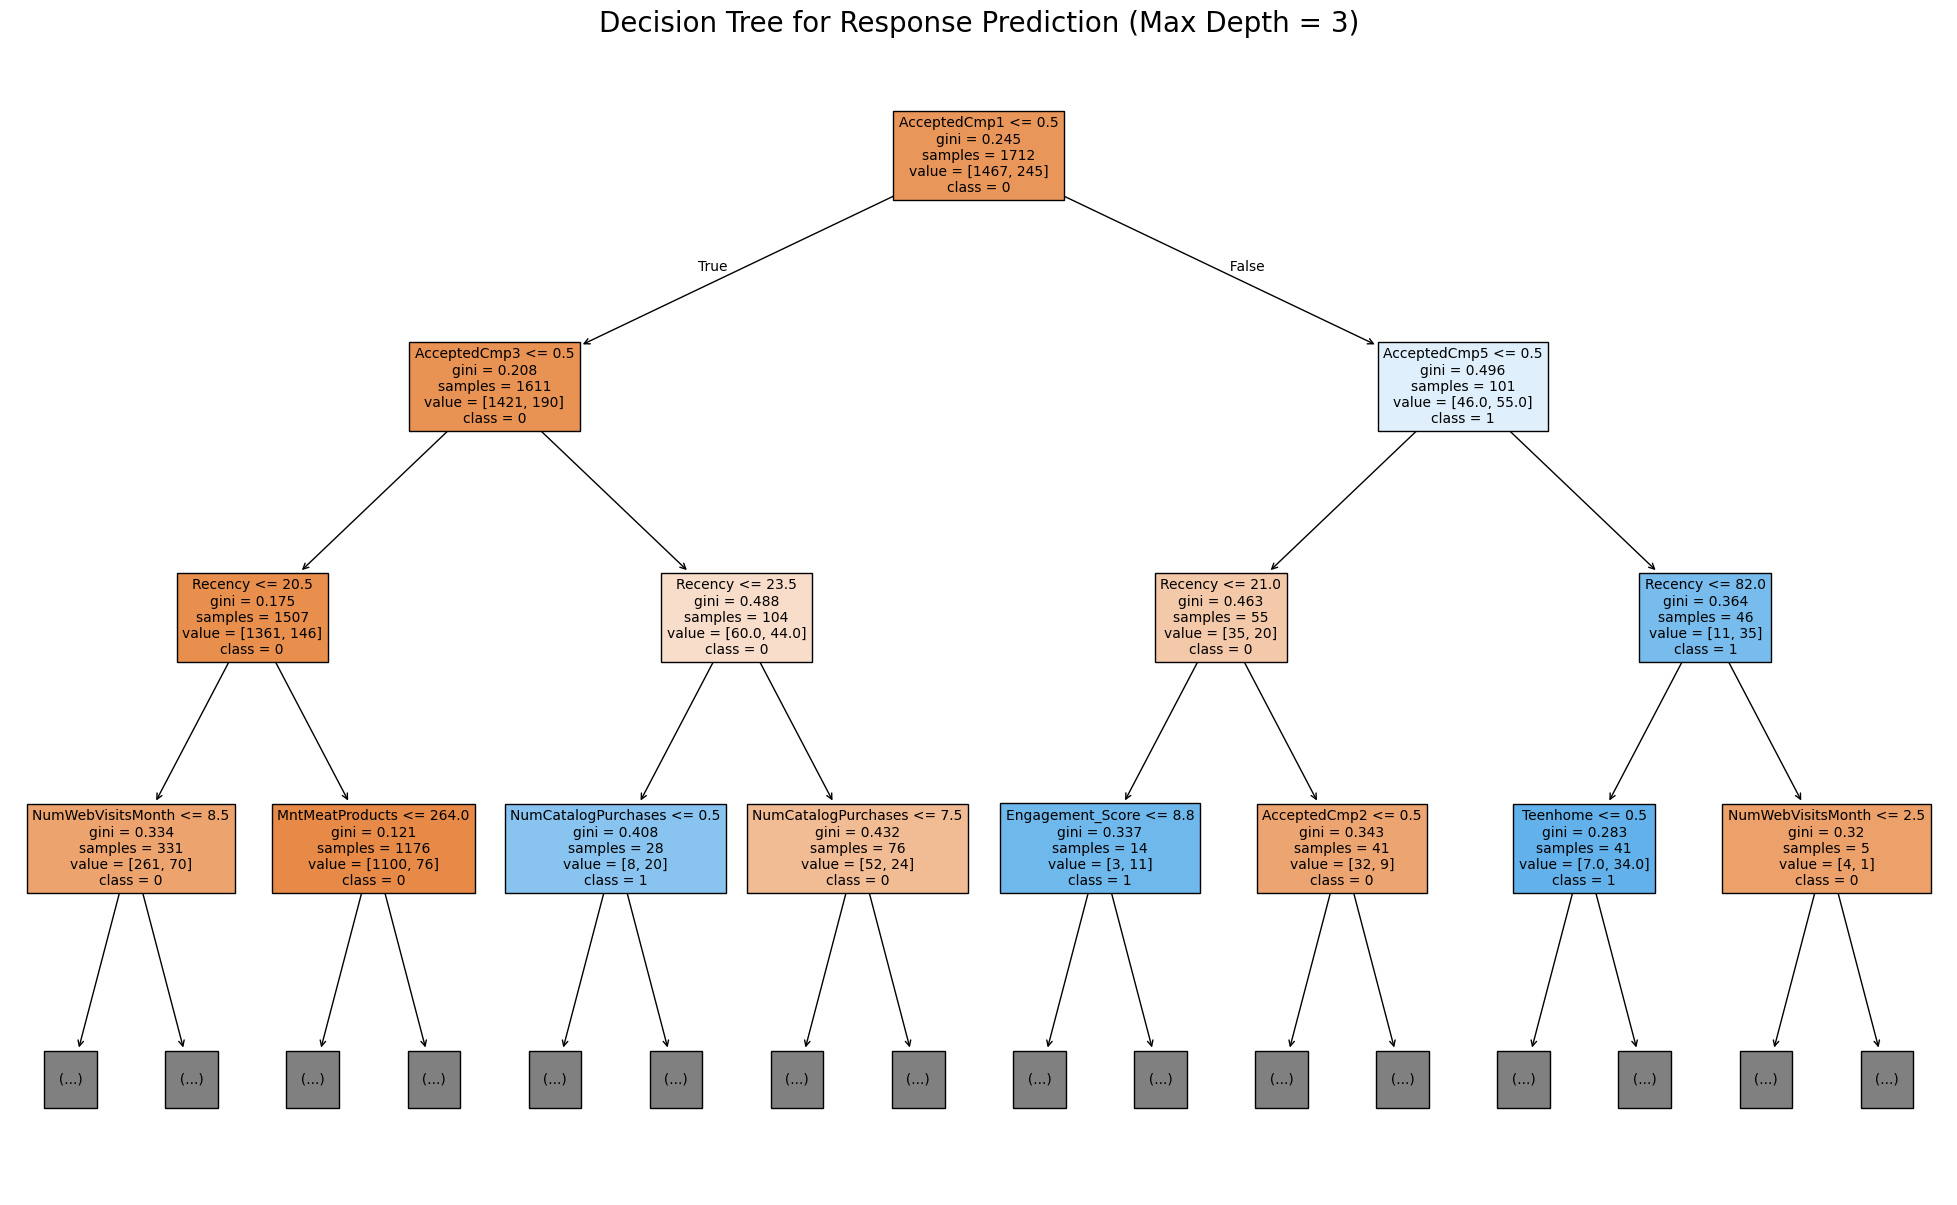

In [61]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create a figure and an axes object for the plot
plt.figure(figsize=(25, 15)) # Adjust figure size for better readability

# Visualize the Decision Tree
# Limiting max_depth for better visualization if the tree is very deep
plot_tree(dtc_response,
          feature_names=X_train_response.columns.tolist(),
          class_names=dtc_response.classes_.astype(str).tolist(),
          filled=True,
          max_depth=3, # Limit depth for clearer visualization
          fontsize=10)

plt.title('Decision Tree for Response Prediction (Max Depth = 3)', fontsize=20)
plt.show()

In [62]:
from sklearn.model_selection import train_test_split

# 1. Create a DataFrame X_cluster by dropping the 'Response' and 'Cluster' columns
X_cluster = customer_segmentation.drop(columns=['Response', 'Cluster'])

# 2. Create a Series y_cluster containing only the 'Cluster' column
y_cluster = customer_segmentation['Cluster']

# 3. Split the X_cluster and y_cluster into training and testing sets
# 4. Set test_size to 0.2, random_state to 42, and ensure stratification by y_cluster.
X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(
    X_cluster, y_cluster, test_size=0.2, random_state=42, stratify=y_cluster
)

# 5. Print the shapes of the training and testing sets to verify the split.
print(f"Shape of X_train_cluster: {X_train_cluster.shape}")
print(f"Shape of X_test_cluster: {X_test_cluster.shape}")
print(f"Shape of y_train_cluster: {y_train_cluster.shape}")
print(f"Shape of y_test_cluster: {y_test_cluster.shape}")

# 6. Display the first 5 rows of X_train_cluster and the first 5 values of y_train_cluster.
print("\nFirst 5 rows of X_train_cluster:")
display(X_train_cluster.head())
print("\nFirst 5 values of y_train_cluster:")
display(y_train_cluster.head())

Shape of X_train_cluster: (1712, 24)
Shape of X_test_cluster: (428, 24)
Shape of y_train_cluster: (1712,)
Shape of y_test_cluster: (428,)

First 5 rows of X_train_cluster:


AcceptedCmp4  Education_PhD  NumCatalogPurchases  Engagement_Score  \
1718             0              0                    1               5.2   
632              0              0                    3               8.8   
2116             0              0                    0               4.6   
113              1              0                    7               7.8   
1616             0              0                    0               4.0   

      Recency  Customer_Tenure_in_Months  AcceptedCmp5  AcceptedCmp2  \
1718       71                  18.922470             0             0   
632        13                  17.148489             0             0   
2116       16                  17.148489             0             0   
113        95                  22.109067             1             0   
1616       35                  17.148489             0             0   

      AcceptedCmp3  NumWebVisitsMonth  ...  AcceptedCmp1  Teenhome  \
1718             0                  7  ...             0         1   
632              0                  4  ...             0         1   
2116             0                  7  ...             0         0   
113              0                  3  ...             0         0   
1616             0                  7  ...             0         0   

      MntMeatProducts  NumCatalogPurchases_bin  Engagement_Score_bin  \
1718               71                        0                     2   
632               259                        1                     3   
2116                5                        0                     1   
113               125                        2                     3   
1616                5                        0                     0   

      Recency_bin  Customer_Tenure_in_Months_bin  NumWebVisitsMonth_bin  \
1718            2                              1                      2   
632             0                              0                      0   
2116            0                              0                      2   
113             3                              1                      0   
1616            1                              0                      2   

      NumDealsPurchases_bin  MntMeatProducts_bin  
1718                      3                    2  
632                       3                    3  
2116                      1                    0  
113                       0                    2  
1616                      0                    0  

[5 rows x 24 columns]


First 5 values of y_train_cluster:


1718    0
632     0
2116    0
113     0
1616    0
Name: Cluster, dtype: int32

In [63]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier model for cluster prediction
# Set random_state for reproducibility
dtc_cluster = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree classifier to the training data
dtc_cluster.fit(X_train_cluster, y_train_cluster)

print("DecisionTreeClassifier for 'Cluster' prediction has been trained.")

DecisionTreeClassifier for 'Cluster' prediction has been trained.


In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Use the trained Decision Tree classifier (dtc_cluster) to make predictions on X_test_cluster
y_pred_cluster = dtc_cluster.predict(X_test_cluster)

print("--- Decision Tree Model Evaluation for 'Cluster' ---")

# Calculate accuracy
accuracy_cluster = accuracy_score(y_test_cluster, y_pred_cluster)
print(f"Accuracy: {accuracy_cluster:.4f}")

# Calculate precision (macro average for multi-class)
precision_cluster = precision_score(y_test_cluster, y_pred_cluster, average='macro')
print(f"Precision (macro): {precision_cluster:.4f}")

# Calculate recall (macro average for multi-class)
recall_cluster = recall_score(y_test_cluster, y_pred_cluster, average='macro')
print(f"Recall (macro): {recall_cluster:.4f}")

# Calculate F1-score (macro average for multi-class)
f1_cluster = f1_score(y_test_cluster, y_pred_cluster, average='macro')
print(f"F1-Score (macro): {f1_cluster:.4f}")

# Generate a confusion matrix
conf_matrix_cluster = confusion_matrix(y_test_cluster, y_pred_cluster)

# Display the confusion matrix as a pandas DataFrame
print("\nConfusion Matrix for 'Cluster':")
display(pd.DataFrame(
    conf_matrix_cluster,
    index=[f'Actual Cluster {c}' for c in dtc_cluster.classes_],
    columns=[f'Predicted Cluster {c}' for c in dtc_cluster.classes_]
))

--- Decision Tree Model Evaluation for 'Cluster' ---
Accuracy: 1.0000
Precision (macro): 1.0000
Recall (macro): 1.0000
F1-Score (macro): 1.0000

Confusion Matrix for 'Cluster':


Predicted Cluster 0  Predicted Cluster 1
Actual Cluster 0                  349                    0
Actual Cluster 1                    0                   79

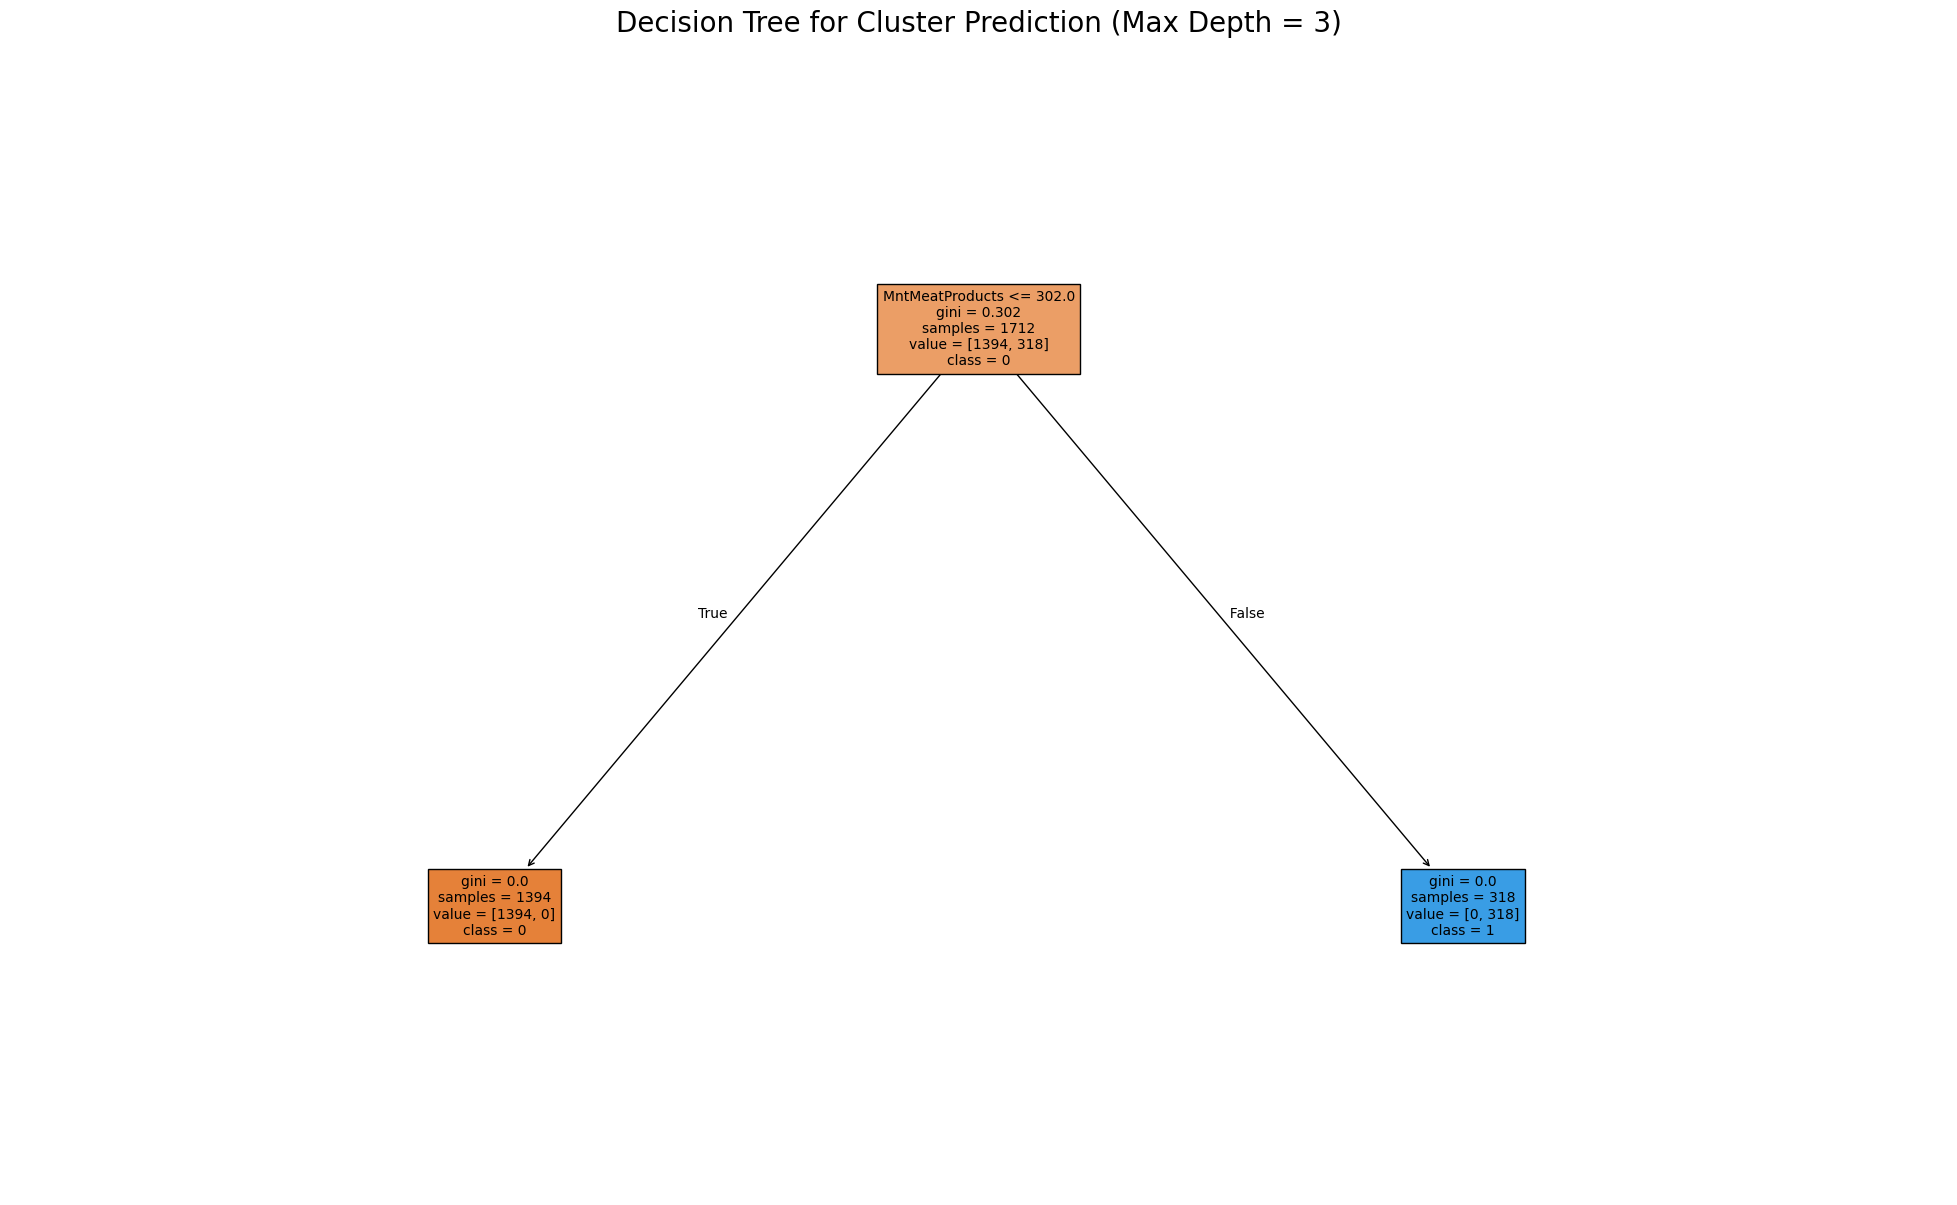

In [65]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create a figure and an axes object for the plot
plt.figure(figsize=(25, 15)) # Adjust figure size for better readability

# Visualize the Decision Tree
# Limiting max_depth for better visualization if the tree is very deep
plot_tree(dtc_cluster,
          feature_names=X_train_cluster.columns.tolist(),
          class_names=dtc_cluster.classes_.astype(str).tolist(),
          filled=True,
          max_depth=3, # Limit depth for clearer visualization
          fontsize=10)

plt.title('Decision Tree for Cluster Prediction (Max Depth = 3)', fontsize=20)
plt.show()

In [66]:
from sklearn.pipeline import Pipeline

# Create a Pipeline for the dtc_response model
pipeline_dtc_response = Pipeline([
    ('decision_tree_response', dtc_response)
])

# Fit the pipeline to the training data
pipeline_dtc_response.fit(X_train_response, y_train_response)

print("DecisionTreeClassifier pipeline for 'Response' prediction has been created and fitted.")

DecisionTreeClassifier pipeline for 'Response' prediction has been created and fitted.


In [67]:
from sklearn.pipeline import Pipeline

# Create a Pipeline for the dtc_cluster model
pipeline_dtc_cluster = Pipeline([
    ('decision_tree_cluster', dtc_cluster)
])

# Fit the pipeline to the training data
pipeline_dtc_cluster.fit(X_train_cluster, y_train_cluster)

print("DecisionTreeClassifier pipeline for 'Cluster' prediction has been created and fitted.")

DecisionTreeClassifier pipeline for 'Cluster' prediction has been created and fitted.


In [68]:
independent_variables = [col for col in customer_segmentation.columns if col not in ['Response', 'Cluster']]
numerical_features = []
categorical_features = []

for col in independent_variables:
    # Check if the column is of a numeric type (int64, float64, etc.)
    if pd.api.types.is_numeric_dtype(customer_segmentation[col]):
        numerical_features.append(col)
    else:
        categorical_features.append(col)

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['AcceptedCmp4', 'Education_PhD', 'NumCatalogPurchases', 'Engagement_Score', 'Recency', 'Customer_Tenure_in_Months', 'AcceptedCmp5', 'AcceptedCmp2', 'AcceptedCmp3', 'NumWebVisitsMonth', 'Marital_Status_Widow', 'Marital_Status_Divorced', 'NumDealsPurchases', 'Marital_Status_Single', 'AcceptedCmp1', 'Teenhome', 'MntMeatProducts', 'NumCatalogPurchases_bin', 'Engagement_Score_bin', 'Recency_bin', 'Customer_Tenure_in_Months_bin', 'NumWebVisitsMonth_bin', 'NumDealsPurchases_bin', 'MntMeatProducts_bin']
Categorical Features: []


In [69]:
independent_variables = [col for col in customer_segmentation.columns if col not in ['Response', 'Cluster']]
numerical_features = []
categorical_features = []

for col in independent_variables:
    # Check if the column name ends with '_bin', which indicates a binned categorical feature
    if col.endswith('_bin'):
        categorical_features.append(col)
    # Otherwise, check if it's a numeric type
    elif pd.api.types.is_numeric_dtype(customer_segmentation[col]):
        numerical_features.append(col)
    # Treat any other non-numeric types as categorical (though in this specific dataframe, there shouldn't be any left)
    else:
        categorical_features.append(col)

print("Refined Numerical Features:", numerical_features)
print("Refined Categorical Features:", categorical_features)

Refined Numerical Features: ['AcceptedCmp4', 'Education_PhD', 'NumCatalogPurchases', 'Engagement_Score', 'Recency', 'Customer_Tenure_in_Months', 'AcceptedCmp5', 'AcceptedCmp2', 'AcceptedCmp3', 'NumWebVisitsMonth', 'Marital_Status_Widow', 'Marital_Status_Divorced', 'NumDealsPurchases', 'Marital_Status_Single', 'AcceptedCmp1', 'Teenhome', 'MntMeatProducts']
Refined Categorical Features: ['NumCatalogPurchases_bin', 'Engagement_Score_bin', 'Recency_bin', 'Customer_Tenure_in_Months_bin', 'NumWebVisitsMonth_bin', 'NumDealsPurchases_bin', 'MntMeatProducts_bin']


In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Create a ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing pipeline created successfully:")
print(preprocessor)

Preprocessing pipeline created successfully:
ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['AcceptedCmp4', 'Education_PhD',
                                  'NumCatalogPurchases', 'Engagement_Score',
                                  'Recency', 'Customer_Tenure_in_Months',
                                  'AcceptedCmp5', 'AcceptedCmp2',
                                  'AcceptedCmp3', 'NumWebVisitsMonth',
                                  'Marital_Status_Widow',
                                  'Marital_Status_Divor...
                                  'AcceptedCmp1', 'Teenhome',
                                  'MntMeatProducts']),
                                ('cat',
                                 Pipeline(steps=[('imputer'

In [71]:
X_to_preprocess = customer_segmentation.drop(columns=['Response', 'Cluster'])

X_transformed = preprocessor.fit_transform(X_to_preprocess)

print(f"Shape of original data before preprocessing: {X_to_preprocess.shape}")
print(f"Shape of transformed data after preprocessing: {X_transformed.shape}")

print("First 5 rows of transformed data:")
# Convert to DataFrame for easier viewing, especially for one-hot encoded features
df_transformed = pd.DataFrame(X_transformed)
display(df_transformed.head())

Shape of original data before preprocessing: (2140, 24)
Shape of transformed data after preprocessing: (2140, 42)
First 5 rows of transformed data:


0         1         2         3         4         5         6   \
0 -0.27749 -0.527613  2.778667 -0.236929  0.302356  2.628907 -0.264575   
1 -0.27749 -0.527613 -0.573066 -1.402509 -0.387821 -2.312017 -0.264575   
2 -0.27749 -0.527613 -0.200652  1.161768 -0.801927  0.006596 -0.264575   
3 -0.27749 -0.527613 -0.945481 -0.470045 -0.801927 -2.662438 -0.264575   
4 -0.27749  1.895330  0.171763 -0.003813  1.544674  0.006596 -0.264575   

       7        8         9   ...   32   33   34   35   36   37   38   39  \
0 -0.1065 -0.27749  0.732759  ...  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
1 -0.1065 -0.27749 -0.153176  ...  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
2 -0.1065 -0.27749 -0.596143  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
3 -0.1065 -0.27749  0.289792  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
4 -0.1065 -0.27749 -0.153176  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   

    40   41  
0  0.0  1.0  
1  0.0  0.0  
2  1.0  0.0  
3  0.0  0.0  
4  1.0  0.0  

[5 rows x 42 columns]

In [72]:
from sklearn.pipeline import Pipeline

# Create a scikit-learn Pipeline that first applies the preprocessor and then the dtc_response model.
full_pipeline_response = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('dtc_response', dtc_response)
])

# Fit the merged pipeline using the original X_response and y_response training data.
full_pipeline_response.fit(X_response, y_response)

print("Full pipeline for 'Response' prediction created and fitted successfully.")

Full pipeline for 'Response' prediction created and fitted successfully.


In [73]:
from sklearn.pipeline import Pipeline

# Create a scikit-learn Pipeline that first applies the preprocessor and then the dtc_cluster model.
full_pipeline_cluster = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('dtc_cluster', dtc_cluster)
])

# Fit the merged pipeline using the original X_cluster and y_cluster training data.
full_pipeline_cluster.fit(X_cluster, y_cluster)

print("Full pipeline for 'Cluster' prediction created and fitted successfully.")

Full pipeline for 'Cluster' prediction created and fitted successfully.


## Make Predictions with User Input


In [74]:
import pandas as pd

# Example user input (you can modify these values)
# The features should match the columns in X_response or X_cluster
user_input = {
    'AcceptedCmp4': [0],
    'Education_PhD': [0],
    'NumCatalogPurchases': [2],
    'Engagement_Score': [7.0],
    'Recency': [15],
    'Customer_Tenure_in_Months': [20.0],
    'AcceptedCmp5': [0],
    'AcceptedCmp2': [0],
    'AcceptedCmp3': [0],
    'NumWebVisitsMonth': [5],
    'Marital_Status_Widow': [0],
    'Marital_Status_Divorced': [0],
    'NumDealsPurchases': [1],
    'Marital_Status_Single': [1],
    'AcceptedCmp1': [0],
    'Teenhome': [0],
    'MntMeatProducts': [100],
    'NumCatalogPurchases_bin': [0],
    'Engagement_Score_bin': [2],
    'Recency_bin': [0],
    'Customer_Tenure_in_Months_bin': [1],
    'NumWebVisitsMonth_bin': [1],
    'NumDealsPurchases_bin': [0],
    'MntMeatProducts_bin': [1]
}

# Convert user input to a DataFrame
user_input_df = pd.DataFrame(user_input)

print("User Input DataFrame:")
display(user_input_df)

User Input DataFrame:


AcceptedCmp4  Education_PhD  NumCatalogPurchases  Engagement_Score  \
0             0              0                    2               7.0   

   Recency  Customer_Tenure_in_Months  AcceptedCmp5  AcceptedCmp2  \
0       15                       20.0             0             0   

   AcceptedCmp3  NumWebVisitsMonth  ...  AcceptedCmp1  Teenhome  \
0             0                  5  ...             0         0   

   MntMeatProducts  NumCatalogPurchases_bin  Engagement_Score_bin  \
0              100                        0                     2   

   Recency_bin  Customer_Tenure_in_Months_bin  NumWebVisitsMonth_bin  \
0            0                              1                      1   

   NumDealsPurchases_bin  MntMeatProducts_bin  
0                      0                    1  

[1 rows x 24 columns]

In [75]:
# Predict 'Response' using the full pipeline
response_prediction = full_pipeline_response.predict(user_input_df)
response_proba = full_pipeline_response.predict_proba(user_input_df)[:, 1]

# Predict 'Cluster' using the full pipeline
cluster_prediction = full_pipeline_cluster.predict(user_input_df)

print(f"Predicted Customer Response: {'Yes' if response_prediction[0] == 1 else 'No'}")
print(f"Probability of Response: {response_proba[0]:.4f}")
print(f"Predicted Customer Cluster: {cluster_prediction[0]}")

Predicted Customer Response: No
Probability of Response: 0.0000
Predicted Customer Cluster: 0
